In [1]:
import numpy as np 
import matplotlib.pyplot as plt

**Question 1**

In [2]:
def get_heatmap(array_in,string_in):
  fig,axis = plt.subplots()
  heatmap = axis.pcolor(array_in,edgecolors='black')
  plt.colorbar(heatmap)
  plt.gca().invert_yaxis()
  plt.title(string_in)
  return 

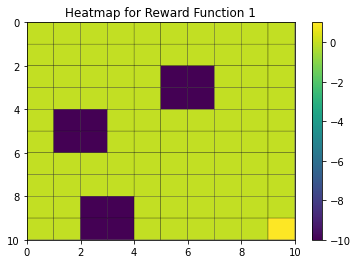

In [3]:
reward1  = np.zeros((10,10))
reward1[-1,-1]=1
reward1[-2:,2:4] = -10
reward1[4:6,1:3]=-10
reward1[2:4,5:7] = -10



get_heatmap(reward1,"Heatmap for Reward Function 1")

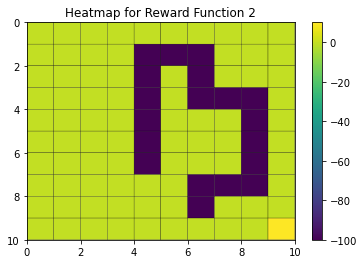

In [4]:
reward2 = np.zeros((10,10))

reward2[-1,-1] = 10.0
reward2[1,4:7] = -100
reward2[2,[4,6]] = -100
reward2[3,[4,6,7,8]]=-100
reward2[4:7,[4,-2]] =-100
reward2[7,[6,7,8]] = -100
reward2[8,6] = -100
get_heatmap(reward2,"Heatmap for Reward Function 2")

**Question 2**

In [5]:
state_space = np.arange(0,100).reshape(10,10).T

In [6]:

def create_transition_probabilities(wind):
  transition_probability_up = np.zeros((100,100)) ## We have 100 states and we can go to any of the 100 states from here 
  transition_probability_down = np.zeros((100,100))
  transition_probability_left = np.zeros((100,100))
  transition_probability_right = np.zeros((100,100))
  for i in range(0,100):
    if(i%10==0):
      transition_probability_up[i,i] +=1-0.75*wind
      transition_probability_down[i,i]+=wind/4
      transition_probability_left[i,i]+=wind/4
      transition_probability_right[i,i]+=wind/4
    else:
      transition_probability_up[i,i-1] = 1-0.75*wind
      transition_probability_down[i,i-1] = wind/4
      transition_probability_left[i,i-1] = wind/4
      transition_probability_right[i,i-1] = wind/4
    if(i<10):
      transition_probability_up[i,i] += wind/4
      transition_probability_down[i,i]+=wind/4
      transition_probability_left[i,i]+=1-0.75*wind
      transition_probability_right[i,i]+=wind/4
    else:
      transition_probability_up[i,i-10] = wind/4
      transition_probability_down[i,i-10] =wind/4
      transition_probability_left[i,i-10] =1-0.75*wind
      transition_probability_right[i,i-10] =wind/4
    if(i>89):
      transition_probability_up[i,i] +=wind/4
      transition_probability_down[i,i]+=wind/4
      transition_probability_left[i,i]+=wind/4
      transition_probability_right[i,i] +=1-0.75*wind
    else:
      transition_probability_up[i,i+10] = wind/4
      transition_probability_down[i,i+10] = wind/4
      transition_probability_left[i,i+10] = wind/4
      transition_probability_right[i,i+10]  =1-0.75*wind
    if((i+1)%10==0):
      transition_probability_up[i,i] += wind/4
      transition_probability_down[i,i]+=1-0.75*wind
      transition_probability_left[i,i]+=wind/4
      transition_probability_right[i,i]+=wind/4
    else:
      transition_probability_up[i,i+1] = wind/4
      transition_probability_down[i,i+1] = 1-0.75*wind
      transition_probability_left[i,i+1] = wind/4
      transition_probability_right[i,i+1] = wind/4
  return transition_probability_up,transition_probability_down,transition_probability_left,transition_probability_right

In [7]:
wind = 0.1 
gamma = 0.8 
eps = 1e-2
up,down,left,right = create_transition_probabilities(wind)

In [8]:
def value_iteration_checkpoints(gamma,eps,reward,state_space,trans_prob_up,trans_prob_down,trans_prob_left,trans_prob_right,freq=5):
  S = np.zeros(100)
  checkpoints = {}
  delta = np.inf
  epochs = 0
  reward = reward.T.reshape(-1)
  while(delta>eps):
    delta = 0
    if(epochs%freq==0):
        checkpoints[epochs] = np.copy(S).reshape(-1,10).T
    s = np.copy(S)
    for i in range(0,100):
      up_calc = np.sum(trans_prob_up[i]*(reward+gamma*s))
      down_calc = np.sum(trans_prob_down[i]*(reward+gamma*s))
      left_calc = np.sum(trans_prob_left[i]*(reward+gamma*s))
      right_calc= np.sum(trans_prob_right[i]*(reward+gamma*s))
      S[i] = max(up_calc,down_calc,left_calc,right_calc)
      delta = max(delta,abs(s[i]-S[i]))
      #print(delta)
    epochs+=1
  return epochs,checkpoints



In [9]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,eps,reward1,state_space,up,down,left,right,1)

print(n_iter)

22


[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.25  -0.25   0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.25  -0.5   -0.5   -0.25   0.     0.   ]
 [ 0.    -0.25  -0.25   0.    -0.25  -0.5   -0.5   -0.25   0.     0.   ]
 [-0.25  -0.5   -0.5   -0.25   0.    -0.25  -0.25   0.     0.     0.   ]
 [-0.25  -0.5   -0.5   -0.25   0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.25  -0.25   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.25  -0.25   0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.25  -0.5   -0.5   -0.25   0.     0.     0.     0.     0.925]
 [ 0.    -0.25  -0.75  -0.75  -0.25   0.     0.     0.     0.925  0.95 ]]


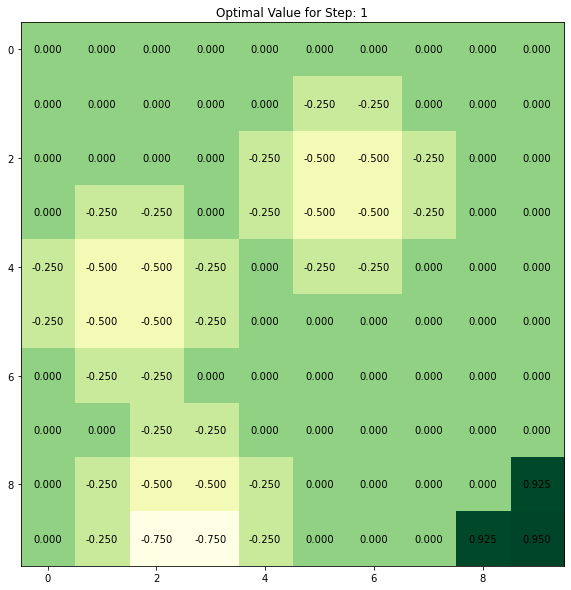

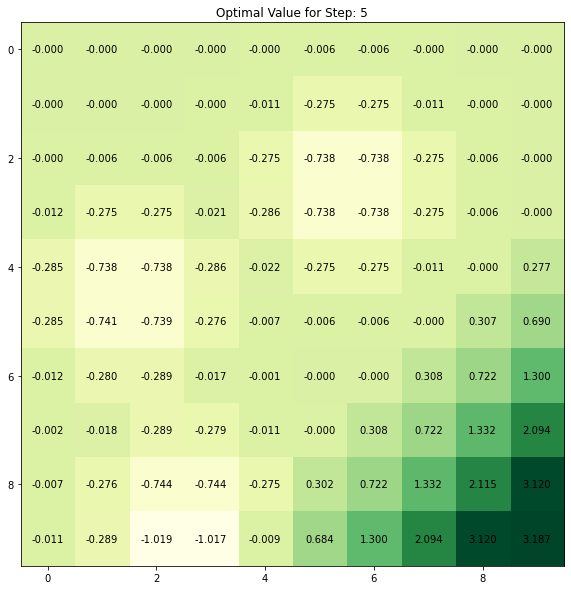

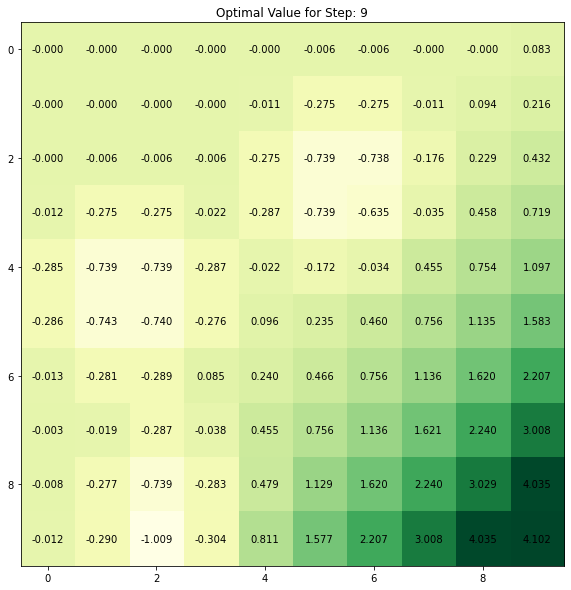

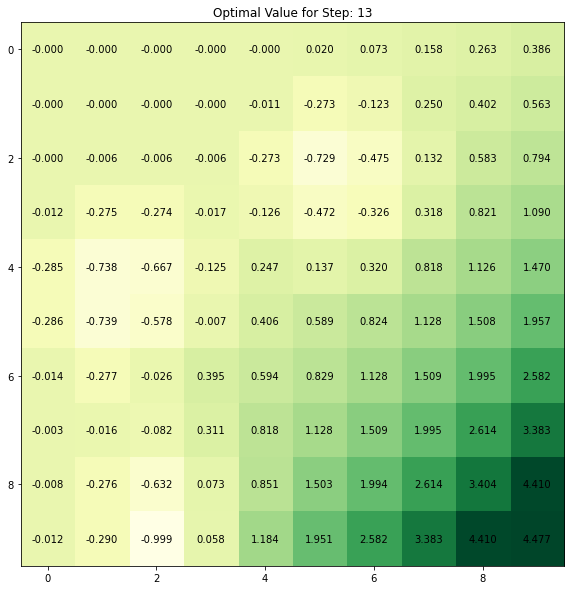

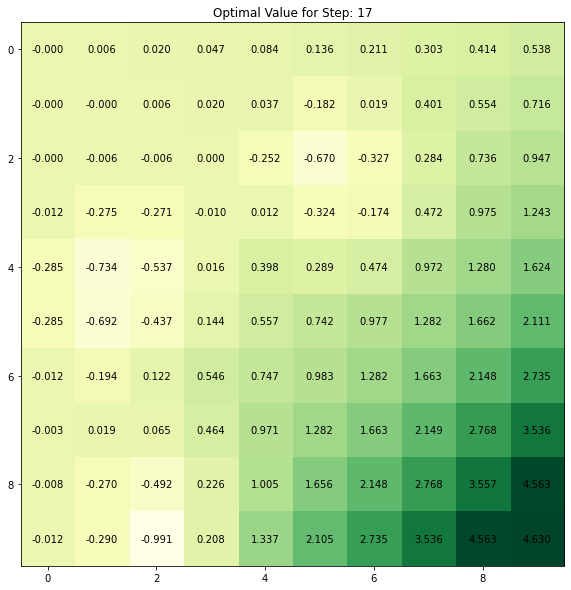

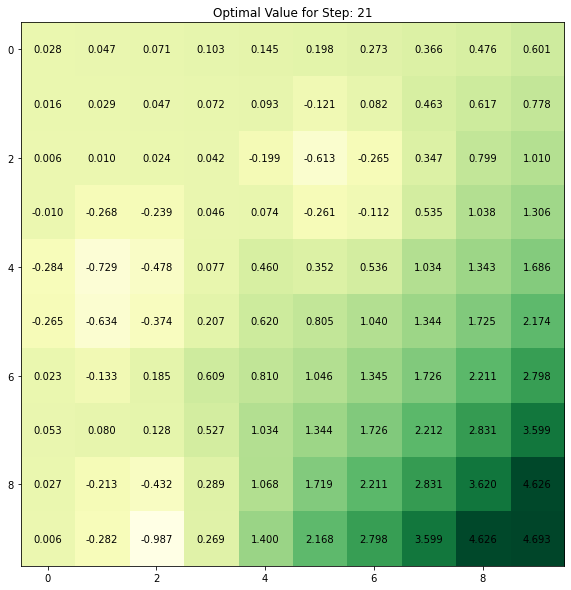

In [10]:
for i in range(1,22,4):
  index=i
  value_function = checkpoints[index]
  fig,axs = plt.subplots(figsize=(10,10))
  plt.imshow(value_function,cmap='YlGn')
  for j in range(0,10):
    for k in range(0,10):
      string = '{:.3f}'.format(value_function[k,j])
      axs.text(j,k,str(string),va='center',ha='center')
      plt.title("Optimal Value for Step: "+str(index))
    
print(checkpoints[1])

**Question 3**

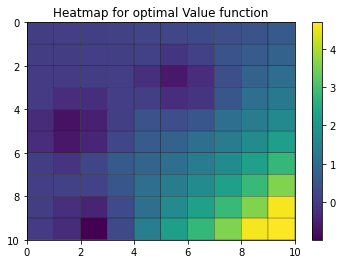

In [11]:
get_heatmap(checkpoints[21],"Heatmap for optimal Value function")

**Question 4**

Theoretical Q/A

**Question 5**

In [12]:
def policy_iteration_checkpoints(gamma,eps,reward,state_space,trans_prob_up,trans_prob_down,trans_prob_left,trans_prob_right,freq=5):
  S = np.zeros(100)
  delta = np.inf
  epochs = 0
  reward = reward.T.reshape(-1)
  policy = np.zeros(100)
  directions = np.zeros(100)
  directions_1 = np.chararray(100,unicode=True)
  while(delta>eps):
    delta = 0
    s = np.copy(S)
    for i in range(0,100):
      up_calc = np.sum(trans_prob_up[i]*(reward+gamma*s))
      down_calc = np.sum(trans_prob_down[i]*(reward+gamma*s))
      left_calc = np.sum(trans_prob_left[i]*(reward+gamma*s))
      right_calc= np.sum(trans_prob_right[i]*(reward+gamma*s))
      S[i] = max(up_calc,down_calc,left_calc,right_calc)
      delta = max(delta,abs(s[i]-S[i]))
  for i in range(0,100):
      up_calc = np.sum(trans_prob_up[i]*(reward+gamma*s))
      down_calc = np.sum(trans_prob_down[i]*(reward+gamma*s))
      left_calc = np.sum(trans_prob_left[i]*(reward+gamma*s))
      right_calc= np.sum(trans_prob_right[i]*(reward+gamma*s))
      temp = max(up_calc,down_calc,left_calc,right_calc)
      policy[i] = temp
      directions[i] = np.argmax([up_calc,down_calc,left_calc,right_calc])
  for i in range(0,100):
    x = directions[i]
    if(x==0):
      directions_1[i] = '\u2191'
    elif(x==1):
      directions_1[i] = '\u2193'
    elif(x==2):
      directions_1[i] = '\u2190'
    else:
      directions_1[i] = '\u2192'
  return policy.reshape(10,10).T,directions_1.reshape(10,10).T,directions.reshape(10,10).T


In [13]:
optim_policy, directions, _ = policy_iteration_checkpoints(gamma,eps,reward1,state_space,up,down,left,right,1)

In [14]:
print(directions)

[['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↑' '↑' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '→' '↓' '↓' '↓' '↓' '→' '↓' '↓']
 ['↑' '↑' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '→' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']]


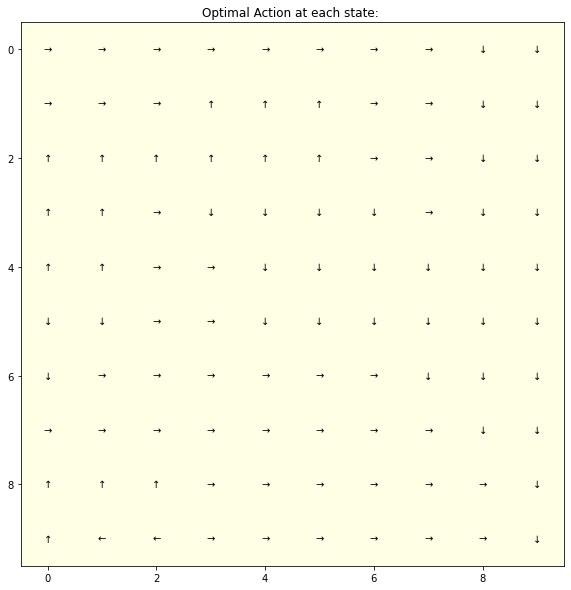

In [15]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")

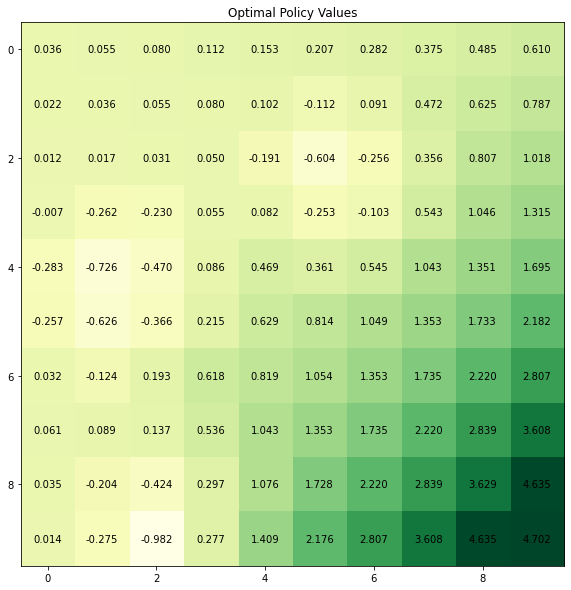

In [16]:
value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy Values")
  

**Question 6**

In [17]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,eps,reward2,state_space,up,down,left,right,1)

print(n_iter)
print(checkpoints.keys())

32
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])


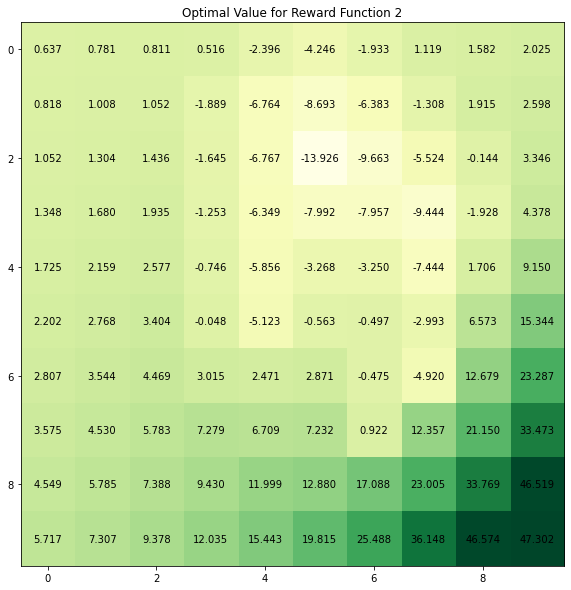

In [18]:
value_function = checkpoints[31]
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Value for Reward Function 2")
  

**Question 7**

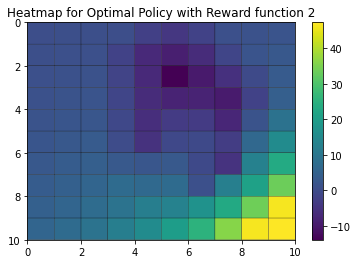

In [19]:
get_heatmap(checkpoints[31],"Heatmap for Optimal Policy with Reward function 2")

**Question 8**

In [20]:
optim_policy, directions,_ = policy_iteration_checkpoints(gamma,eps,reward2,state_space,up,down,left,right,1)

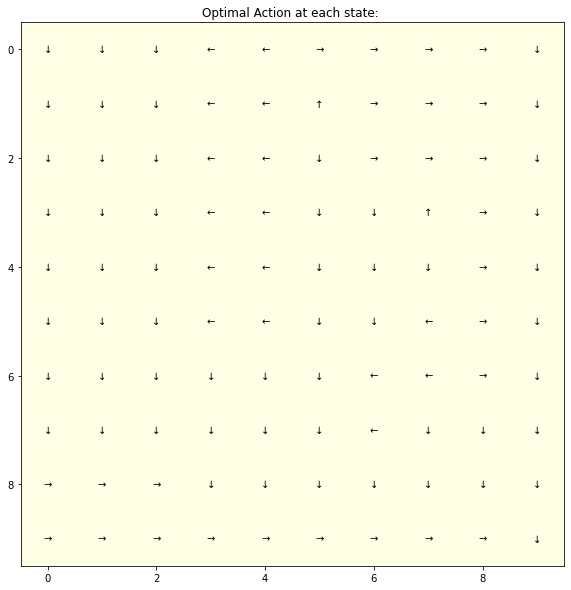

In [21]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")

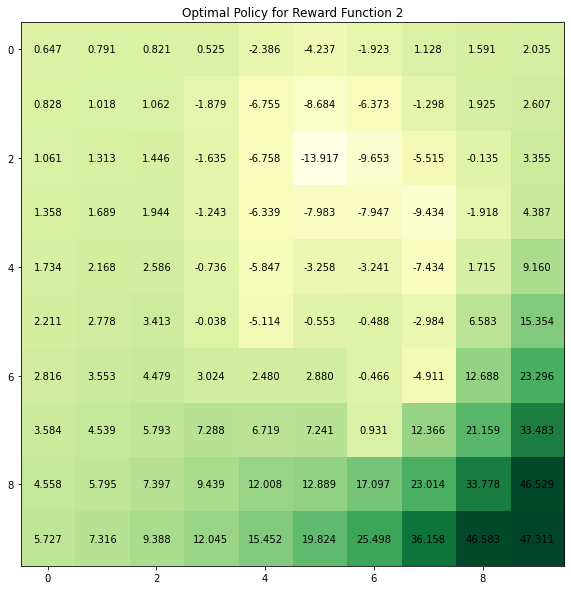

In [22]:
value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 2")
  

#### Question 9

In [23]:
wind = 0.6
gamma = 0.8 
eps = 1e-2
up,down,left,right = create_transition_probabilities(wind)

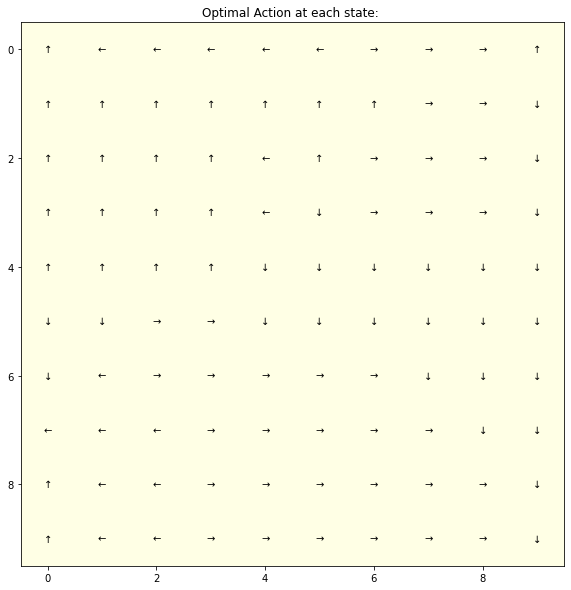

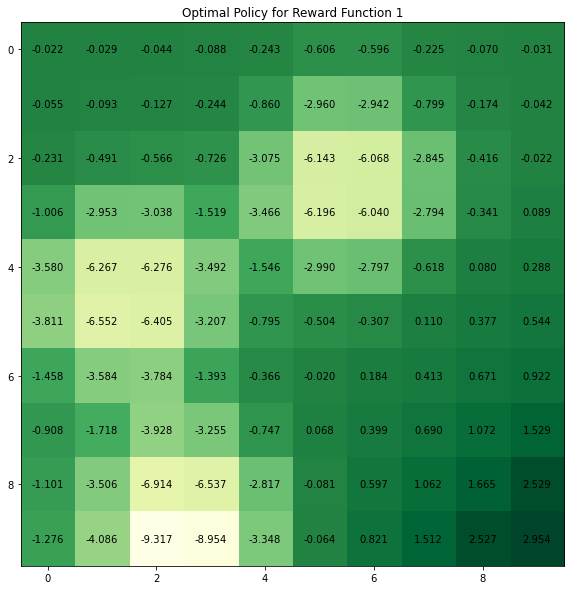

In [24]:

optim_policy, directions,_ = policy_iteration_checkpoints(gamma,eps,reward1,state_space,up,down,left,right,1)
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 1")
plt.show()

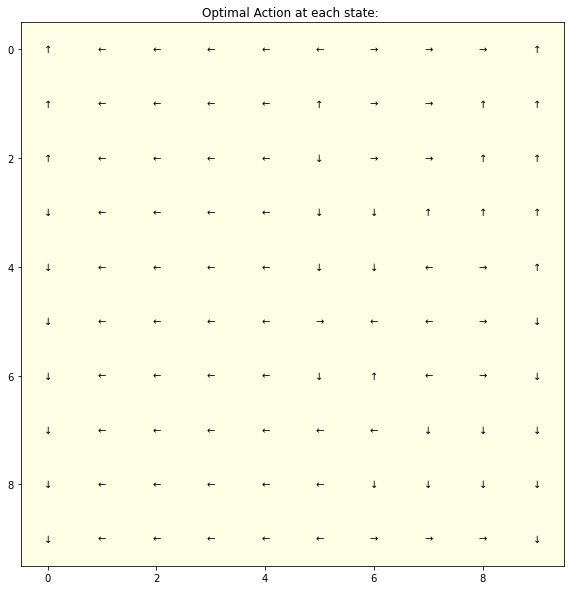

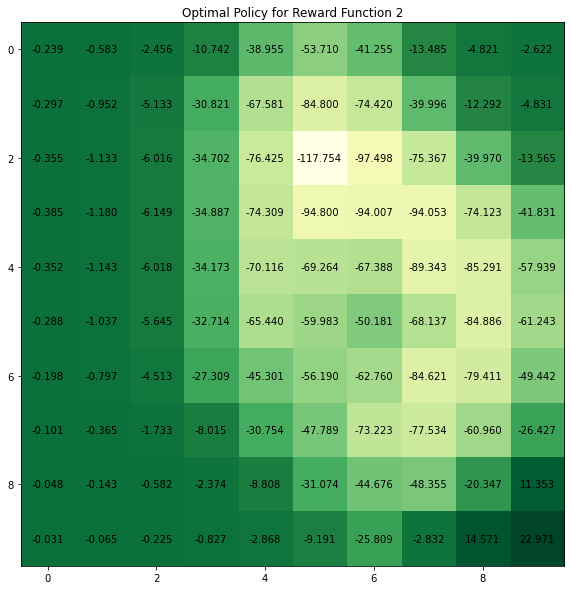

In [25]:

optim_policy, directions,_ = policy_iteration_checkpoints(gamma,eps,reward2,state_space,up,down,left,right,1)
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 2")
plt.show()

## Question 10
Theory question


## Question 11

In [26]:
import numpy as np

In [27]:
## IRL algorithm
## LP formulation

from cvxopt import matrix, solvers

def irl(n_states, n_actions, transition_probability, policy, discount, Rmax,l1):
    """
    Find a reward function with inverse RL as described in Ng & Russell, 2000.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probability: NumPy array mapping (state_i, action, state_k) to
        the probability of transitioning from state_i to state_k under action.
        Shape (N, A, N).
    policy: Vector mapping state ints to action ints. Shape (N,).
    discount: Discount factor. float.
    Rmax: Maximum reward. float.
    l1: l1 regularisation. float.
    -> Reward vector
    """

    A = set(range(n_actions))  # Set of actions to help manage reordering
                               # actions.
    # The transition policy convention is different here to the rest of the code
    # for legacy reasons; here, we reorder axes to fix this. We expect the
    # new probabilities to be of the shape (A, N, N).
#     transition_probability = np.transpose(transition_probability, (1, 0, 2))

#     def T(a, s):
#         """
#         Shorthand for a dot product used a lot in the LP formulation.
#         """
#         return np.dot(a,s)

    # This entire function just computes the block matrices used for the LP
    # formulation of IRL.

    # Minimise c . x. 
    
    ##WRITE CODE HERE 
    """ Calculating x 
    x = [t - new_matrix
    u - new_matrix
    R - to be found reward matrix]
    """
    temp_I = np.identity(100)
    temp_mat = np.zeros(((n_actions-1)*n_states,n_states))
    temp_A = np.zeros(((n_actions-1)*n_states,n_states))
    
    action_state_counter = 0
    for state in range(n_states):
        optimal_step = int(policy[state])
        for check_action in range(len(transition_probability)):
            if optimal_step == check_action:
                continue #Check what this is for?
            prob_optimal = transition_probability[optimal_step]
            prob_check = transition_probability[check_action]
            temp_mat[action_state_counter,:] = np.matmul((prob_optimal[state] - prob_check[state]).reshape(1,100), 
                                                         np.linalg.inv(temp_I-discount*prob_optimal))
            temp_A[action_state_counter,state] = 1 
            action_state_counter = action_state_counter + 1
    temp_mat = -temp_mat
    neg_I = -temp_I
    e = np.vstack((temp_mat, temp_mat, neg_I, temp_I, temp_I, neg_I))
    f = np.vstack((temp_A,np.zeros((700,n_states))))
    g = np.vstack((np.zeros((600,100)), neg_I, neg_I, np.zeros((200,100))))
    x_vector = np.hstack((e,f,g)) #This can be made into one vector
                  
    """ Calculating c """
    c1 = np.ones((n_states,1))
    c2 = np.zeros((n_states,1))
    c3 = -l1*(c1)
    c_vector = np.vstack((c1,c2,c3))
    
    """ Constraints """
    b1 = np.zeros((2*(n_actions)*n_states,1))
#     b2 = np.zeros((2*n_states,1))
    b3 = np.ones((n_states,1))*Rmax #100,1
    b4 = b3
    b_vector = np.vstack((b1,b3,b4)) # 600+200+100+100
    
    to_ret_solver = solvers.lp(matrix(c_vector), matrix(x_vector), matrix(b_vector))
    return to_ret_solver

In [28]:
def accuracy(exp_pol,ag_pol):
    """
    Comparing expert-policy and agent-policy for exact matching.
    Accuracy is 
    """
    num_states = len(ag_pol)
    count = 0.0
    
    for i in range(num_states):
        if exp_pol[i] == ag_pol[i]:
            count += 1
    return np.divide(count,num_states)

def iter_acc(grid_obj, optim_policy):
    n_states = grid_obj['n_states']
    n_actions = grid_obj['n_actions']
    tr_prob = grid_obj['transition_probability']
    disc = grid_obj['discount']
    
    Rmax = 100
    accuracy_array = []
    
    solver_rewards_array = []
    lam_range = np.linspace(0,5,500)
    
    for lam in lam_range:
        temp_sol = irl(n_states, n_actions, tr_prob, np.transpose(optim_policy).flatten(), disc, Rmax, lam)
        temp_R = np.array(temp_sol['x'][:100])
        curr_pol, _, curr_pol_a = policy_iteration_checkpoints(gamma,eps,temp_R,state_space,up,down,left,right,1)
        temp_acc = accuracy(np.transpose(optim_policy).flatten(), np.transpose(curr_pol_a).flatten())
        accuracy_array.append(temp_acc)
        solver_rewards_array.append(temp_R)
    
    best_rewards = solver_rewards_array[np.argmax(accuracy_array)]
    return np.amax(accuracy_array), best_rewards, accuracy_array, solver_rewards_array

In [29]:
transition_probability = [up, down, left, right]
transition_probability[0].shape

(100, 100)

In [30]:
grid_object = {}
grid_object['n_states'] = 100
grid_object['n_actions'] = 4
grid_object['transition_probability'] = transition_probability
grid_object['discount'] = gamma

In [31]:
# From Question 5
optim_policy, directions, optim_policy_a = policy_iteration_checkpoints(gamma,eps,reward1,state_space,up,down,left,right,1)

In [32]:
# state_space
best_score, best_rewards, accuracy_arr, _ = iter_acc(grid_object, optim_policy_a)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5000e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.3711e+01 -2.1329e+04  2e+04  2e-02  8e+00  2e+00
 2: -2.7345e+02 -1.5830e+04  2e+04  1e-02  6e+00  4e+00
 3: -1.3303e+03 -1.2422e+04  2e+04  1e-02  4e+00  6e+00
 4: -3.5850e+03 -1.4295e+04  2e+04  1e-02  4e+00  1e+01
 5: -5.7543e+03 -1.2413e+04  2e+04  6e-03  2e+00  8e+00
 6: -7.6962e+03 -1.1584e+04  1e+04  3e-03  1e+00  9e+00
 7: -8.6165e+03 -1.0683e+04  6e+03  2e-03  8e-01  5e+00
 8: -8.5269e+03 -1.0584e+04  6e+03  2e-03  8e-01  5e+00
 9: -9.6393e+03 -1.0044e+04  1e+03  4e-04  1e-01  1e+00
10: -9.9868e+03 -1.0001e+04  4e+01  1e-05  5e-03  4e-02
11: -9.9999e+03 -1.0000e+04  4e-01  1e-07  5e-05  4e-04
12: -1.0000e+04 -1.0000e+04  4e-03  1e-09  5e-07  4e-06
13: -1.0000e+04 -1.0000e+04  4e-05  1e-11  5e-09  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5100e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.4836e+01 -2.1447e+04 

 8: -1.0414e+04 -1.1762e+04  7e+03  1e-03  5e-01  5e+00
 9: -1.2977e+04 -1.4608e+04  2e+04  1e-03  6e-01  1e+01
10: -1.5294e+04 -1.6831e+04  3e+04  1e-03  6e-01  2e+01
11: -4.3207e+04 -4.4600e+04  1e+05  1e-03  5e-01  7e+01
12: -5.7322e+05 -5.7363e+05  1e+06  1e-03  5e-01  9e+02
13: -5.4532e+07 -5.4445e+07  1e+08  1e-03  5e-01  9e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5902e+04  3e+04  2e-02  9e+00  1e+00
 1: -4.4170e+01 -2.2381e+04  2e+04  2e-02  8e+00  2e+00
 2: -3.4578e+02 -1.6767e+04  2e+04  1e-02  6e+00  4e+00
 3: -1.6329e+03 -1.3779e+04  2e+04  1e-02  4e+00  7e+00
 4: -4.4223e+03 -1.5595e+04  2e+04  1e-02  4e+00  1e+01
 5: -7.4824e+03 -1.2617e+04  1e+04  4e-03  2e+00  7e+00
 6: -9.2107e+03 -1.1594e+04  6e+03  2e-03  9e-01  4e+00
 7: -9.2565e+03 -1.1672e+04  7e+03  2e-03  9e-01  5e+00
 8: -1.0265e+04 -1.1833e+04  7e+03  1e-03  6e-01  4e+00
 9: -1.2383e+04 -1.4574e+04  3e+04  2e-03  8e-01  1e+01
10: -1.40

 7: -1.3566e+04 -1.8141e+04  4e+04  4e-03  2e+00  2e+01
 8: -2.3001e+04 -2.7256e+04  7e+04  4e-03  2e+00  4e+01
 9: -8.6893e+04 -9.0287e+04  2e+05  3e-03  1e+00  1e+02
10: -3.3147e+06 -3.3128e+06  8e+06  3e-03  1e+00  5e+03
11: -3.3115e+08 -3.3063e+08  8e+08  3e-03  1e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6904e+04  3e+04  2e-02  1e+01  1e+00
 1: -5.6690e+01 -2.3540e+04  3e+04  2e-02  8e+00  2e+00
 2: -4.2975e+02 -1.7919e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.9862e+03 -1.5300e+04  2e+04  1e-02  5e+00  8e+00
 4: -5.4643e+03 -1.6864e+04  2e+04  9e-03  4e+00  1e+01
 5: -9.6140e+03 -1.2932e+04  9e+03  3e-03  1e+00  6e+00
 6: -1.0122e+04 -1.5421e+04  3e+04  4e-03  2e+00  2e+01
 7: -1.3061e+04 -1.7859e+04  4e+04  4e-03  2e+00  2e+01
 8: -2.0157e+04 -2.4733e+04  6e+04  4e-03  2e+00  4e+01
 9: -6.5961e+04 -6.9817e+04  2e+05  3e-03  1e+00  1e+02
10: -1.6582e+06 -1.6594e+06  4e+06  3e-03  1e+00  3e+03
11: -1.64

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8006e+04  3e+04  2e-02  1e+01  1e+00
 1: -7.1569e+01 -2.4805e+04  3e+04  2e-02  9e+00  2e+00
 2: -5.2662e+02 -1.9268e+04  2e+04  1e-02  7e+00  5e+00
 3: -2.4007e+03 -1.6945e+04  2e+04  1e-02  5e+00  8e+00
 4: -6.2103e+03 -1.8195e+04  3e+04  1e-02  4e+00  1e+01
 5: -9.8916e+03 -1.5174e+04  1e+04  4e-03  2e+00  7e+00
 6: -1.2339e+04 -2.1524e+04  5e+04  7e-03  3e+00  2e+01
 7: -1.7673e+04 -2.6151e+04  7e+04  7e-03  3e+00  4e+01
 8: -4.6603e+04 -5.3213e+04  1e+05  5e-03  2e+00  8e+01
 9: -5.1687e+05 -5.2171e+05  1e+06  4e-03  2e+00  7e+02
10: -4.7129e+07 -4.7069e+07  1e+08  4e-03  2e+00  7e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8106e+04  3e+04  2e-02  1e+01  1e+00
 1: -7.2980e+01 -2.4920e+04  3e+04  2e-02  9e+00  2e+00
 2: -5.3533e+02 -1.9398e+04  2e+04  2e-02  7e+00  5e+00
 3: -2.4381e+03 -1.7089e+04  2e+04  1e-02  5e+00  8e+00
 4: -6.2689

 6: -1.5079e+04 -2.6469e+04  7e+04  9e-03  4e+00  3e+01
 7: -2.2855e+04 -3.3954e+04  1e+05  9e-03  4e+00  5e+01
 8: -6.9373e+04 -7.8139e+04  2e+05  7e-03  3e+00  1e+02
 9: -1.1468e+06 -1.1532e+06  3e+06  6e-03  3e+00  2e+03
10: -1.1208e+08 -1.1194e+08  3e+08  6e-03  3e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.9208e+04  3e+04  2e-02  1e+01  1e+00
 1: -8.9141e+01 -2.6177e+04  3e+04  2e-02  9e+00  2e+00
 2: -6.3513e+02 -2.0827e+04  2e+04  2e-02  7e+00  5e+00
 3: -2.7602e+03 -1.8802e+04  2e+04  1e-02  5e+00  9e+00
 4: -7.0815e+03 -1.9788e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.0484e+04 -1.7784e+04  2e+04  6e-03  2e+00  9e+00
 6: -1.5372e+04 -2.6951e+04  7e+04  9e-03  4e+00  3e+01
 7: -2.3419e+04 -3.4745e+04  1e+05  9e-03  4e+00  5e+01
 8: -7.2099e+04 -8.1046e+04  2e+05  7e-03  3e+00  1e+02
 9: -1.2488e+06 -1.2552e+06  3e+06  6e-03  3e+00  2e+03
10: -1.2249e+08 -1.2234e+08  3e+08  6e-03  3e+00  2e+05
Certifica

 2: -7.4253e+02 -2.2260e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.0136e+03 -2.0600e+04  3e+04  1e-02  6e+00  9e+00
 4: -8.0284e+03 -2.1165e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.1236e+04 -2.0716e+04  3e+04  7e-03  3e+00  1e+01
 6: -1.9871e+04 -3.2856e+04  8e+04  1e-02  4e+00  3e+01
 7: -3.1690e+04 -4.4964e+04  1e+05  1e-02  4e+00  6e+01
 8: -1.3071e+05 -1.4121e+05  4e+05  8e-03  3e+00  2e+02
 9: -4.6290e+06 -4.6334e+06  1e+07  7e-03  3e+00  6e+03
10: -4.6294e+08 -4.6239e+08  1e+09  7e-03  3e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0411e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.0814e+02 -2.7540e+04  3e+04  2e-02  9e+00  2e+00
 2: -7.5268e+02 -2.2391e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.0344e+03 -2.0786e+04  3e+04  1e-02  6e+00  9e+00
 4: -8.1388e+03 -2.1272e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.1330e+04 -2.1042e+04  3e+04  7e-03  3e+00  1e+01
 6: -2.0448e+04 -3.3469e+04  8e+04  1e-02  4e+00  3e+01
 7: -3.29

 5: -1.4264e+04 -2.8024e+04  5e+04  1e-02  4e+00  2e+01
 6: -2.9021e+04 -4.1980e+04  9e+04  9e-03  4e+00  4e+01
 7: -7.4529e+04 -8.8601e+04  2e+05  1e-02  4e+00  1e+02
 8: -7.6932e+05 -7.8082e+05  2e+06  9e-03  4e+00  9e+02
 9: -7.2606e+07 -7.2532e+07  2e+08  9e-03  4e+00  9e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1613e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.2858e+02 -2.8898e+04  3e+04  2e-02  9e+00  2e+00
 2: -8.7969e+02 -2.3961e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.2559e+03 -2.3311e+04  3e+04  1e-02  6e+00  1e+01
 4: -9.7321e+03 -2.2074e+04  3e+04  9e-03  4e+00  1e+01
 5: -1.4766e+04 -2.8998e+04  5e+04  1e-02  4e+00  3e+01
 6: -2.9686e+04 -4.2913e+04  9e+04  9e-03  4e+00  4e+01
 7: -7.6325e+04 -9.0517e+04  2e+05  1e-02  4e+00  1e+02
 8: -8.0689e+05 -8.1857e+05  2e+06  9e-03  4e+00  1e+03
 9: -7.6503e+07 -7.6426e+07  2e+08  9e-03  4e+00  9e+04
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -1.0166e+03 -2.5540e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.5137e+03 -2.5789e+04  3e+04  2e-02  6e+00  1e+01
 4: -1.0609e+04 -2.3034e+04  3e+04  8e-03  4e+00  1e+01
 5: -1.9173e+04 -3.9734e+04  1e+05  1e-02  6e+00  4e+01
 6: -3.2520e+04 -5.3221e+04  1e+05  1e-02  6e+00  7e+01
 7: -1.1005e+05 -1.2617e+05  3e+05  1e-02  5e+00  2e+02
 8: -2.3912e+06 -2.4029e+06  6e+06  1e-02  4e+00  3e+03
 9: -2.3814e+08 -2.3788e+08  6e+08  1e-02  4e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.2916e+04  3e+04  2e-02  9e+00  1e+00
 1: -1.5240e+02 -3.0363e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.0285e+03 -2.5672e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.5372e+03 -2.5992e+04  3e+04  2e-02  6e+00  1e+01
 4: -1.0680e+04 -2.3132e+04  3e+04  8e-03  4e+00  1e+01
 5: -1.9207e+04 -3.9988e+04  1e+05  1e-02  6e+00  4e+01
 6: -3.2732e+04 -5.3682e+04  1e+05  1e-02  6e+00  7e+01
 7: -1.1117e+05 -1.2748e+05  3e+05  1e-02  5e+00  2e+02
 8: -2.43

 9: -3.1400e+08 -3.1365e+08  7e+08  1e-02  5e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.4118e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.7597e+02 -3.1712e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.1767e+03 -2.7262e+04  3e+04  2e-02  7e+00  7e+00
 3: -3.8440e+03 -2.8396e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.1345e+04 -2.4607e+04  3e+04  9e-03  4e+00  1e+01
 5: -2.0402e+04 -4.3500e+04  1e+05  2e-02  6e+00  4e+01
 6: -3.6129e+04 -5.9873e+04  2e+05  2e-02  6e+00  8e+01
 7: -1.2789e+05 -1.4652e+05  4e+05  1e-02  5e+00  2e+02
 8: -3.2268e+06 -3.2400e+06  8e+06  1e-02  5e+00  4e+03
 9: -3.2222e+08 -3.2186e+08  8e+08  1e-02  5e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.4218e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.7801e+02 -3.1824e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.1895e+03 -2.7395e+04  3e+04  2e-02  7e+00  7e+00
 3: -3.8716e+03 -2.8594e+0

 5: -2.2790e+04 -4.8166e+04  1e+05  2e-02  6e+00  4e+01
 6: -4.0973e+04 -6.7460e+04  2e+05  2e-02  7e+00  8e+01
 7: -1.5141e+05 -1.7230e+05  4e+05  1e-02  5e+00  2e+02
 8: -4.3046e+06 -4.3191e+06  1e+07  1e-02  5e+00  5e+03
 9: -4.3025e+08 -4.2979e+08  1e+09  1e-02  5e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5421e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.0326e+02 -3.3169e+04  4e+04  2e-02  8e+00  2e+00
 2: -1.3511e+03 -2.9068e+04  3e+04  2e-02  7e+00  7e+00
 3: -4.2312e+03 -3.0973e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.1893e+04 -2.6753e+04  3e+04  9e-03  4e+00  1e+01
 5: -2.3016e+04 -4.8580e+04  1e+05  2e-02  7e+00  4e+01
 6: -4.1425e+04 -6.8134e+04  2e+05  2e-02  7e+00  8e+01
 7: -1.5366e+05 -1.7473e+05  4e+05  1e-02  5e+00  2e+02
 8: -4.4129e+06 -4.4275e+06  1e+07  1e-02  5e+00  5e+03
 9: -4.4109e+08 -4.4062e+08  1e+09  1e-02  5e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -1.5249e+03 -3.0776e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.6455e+03 -3.3366e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.2620e+04 -2.8995e+04  4e+04  1e-02  4e+00  1e+01
 5: -2.6042e+04 -5.3829e+04  1e+05  2e-02  7e+00  5e+01
 6: -4.7474e+04 -7.6792e+04  2e+05  2e-02  7e+00  9e+01
 7: -1.8487e+05 -2.0808e+05  5e+05  1e-02  6e+00  2e+02
 8: -5.9332e+06 -5.9488e+06  1e+07  1e-02  5e+00  6e+03
 9: -5.9335e+08 -5.9273e+08  1e+09  1e-02  5e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.6723e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.3243e+02 -3.4625e+04  4e+04  2e-02  8e+00  2e+00
 2: -1.5399e+03 -3.0919e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.6827e+03 -3.3567e+04  5e+04  2e-02  7e+00  1e+01
 4: -1.2690e+04 -2.9192e+04  4e+04  1e-02  4e+00  1e+01
 5: -2.6320e+04 -5.4289e+04  1e+05  2e-02  7e+00  5e+01
 6: -4.8036e+04 -7.7564e+04  2e+05  2e-02  7e+00  9e+01
 7: -1.8789e+05 -2.1127e+05  5e+05  1e-02  6e+00  2e+02
 8: -6.06

 8: -7.8564e+06 -7.8726e+06  2e+07  1e-02  6e+00  8e+03
 9: -7.8587e+08 -7.8506e+08  2e+09  1e-02  6e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7926e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.6106e+02 -3.5968e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.7270e+03 -3.2640e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.1612e+03 -3.5999e+04  5e+04  2e-02  7e+00  1e+01
 4: -1.3607e+04 -3.1696e+04  4e+04  1e-02  4e+00  2e+01
 5: -3.0035e+04 -6.0131e+04  1e+05  2e-02  7e+00  5e+01
 6: -5.5605e+04 -8.7593e+04  2e+05  2e-02  7e+00  1e+02
 7: -2.3099e+05 -2.5636e+05  6e+05  2e-02  6e+00  3e+02
 8: -8.0395e+06 -8.0557e+06  2e+07  1e-02  6e+00  9e+03
 9: -8.0418e+08 -8.0335e+08  2e+09  1e-02  6e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.8026e+04  4e+04  2e-02  8e+00  1e+00
 1: -2.6352e+02 -3.6080e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.7432e+03 -3.2784e+0

 8: -1.0986e+07 -1.1002e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9228e+04  4e+04  2e-02  8e+00  1e+00
 1: -2.9398e+02 -3.7422e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.9444e+03 -3.4519e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.7545e+03 -3.8698e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.4725e+04 -3.4728e+04  4e+04  1e-02  4e+00  2e+01
 5: -3.4896e+04 -6.7233e+04  2e+05  2e-02  7e+00  5e+01
 6: -6.5816e+04 -1.0040e+05  3e+05  2e-02  7e+00  1e+02
 7: -2.9751e+05 -3.2487e+05  8e+05  2e-02  6e+00  4e+02
 8: -1.1316e+07 -1.1332e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9329e+04  4e+04  2e-02  8e+00  1e+00
 1: -2.9659e+02 -3.7534e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.9618e+03 -3.4665e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.8037e+03 -3.8910e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.4823e+04 -3.4972e+0

 5: -4.0634e+04 -7.4976e+04  2e+05  2e-02  7e+00  6e+01
 6: -7.9136e+04 -1.1609e+05  3e+05  2e-02  7e+00  1e+02
 7: -4.0275e+05 -4.3185e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.7812e+07 -1.7823e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0631e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.3171e+02 -3.8988e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.1965e+03 -3.6564e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.4928e+03 -4.1709e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.6266e+04 -3.8316e+04  5e+04  1e-02  4e+00  2e+01
 5: -4.1119e+04 -7.5603e+04  2e+05  2e-02  7e+00  6e+01
 6: -8.0346e+04 -1.1748e+05  3e+05  2e-02  7e+00  1e+02
 7: -4.1349e+05 -4.4271e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.8564e+07 -1.8574e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0731e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.3449e+02 -3.9100e+0

 4: -1.8077e+04 -4.2015e+04  6e+04  1e-02  4e+00  2e+01
 5: -4.8102e+04 -8.4264e+04  2e+05  2e-02  7e+00  6e+01
 6: -9.9462e+04 -1.3870e+05  4e+05  2e-02  7e+00  2e+02
 7: -6.1514e+05 -6.4572e+05  1e+06  2e-02  6e+00  7e+02
 8: -3.5342e+07 -3.5338e+07  8e+07  2e-02  6e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2034e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.7188e+02 -4.0555e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.4685e+03 -3.8633e+04  5e+04  2e-02  7e+00  9e+00
 3: -7.3515e+03 -4.4860e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.8233e+04 -4.2317e+04  6e+04  1e-02  4e+00  2e+01
 5: -4.8697e+04 -8.4975e+04  2e+05  2e-02  7e+00  6e+01
 6: -1.0108e+05 -1.4045e+05  4e+05  2e-02  7e+00  2e+02
 7: -6.3369e+05 -6.6439e+05  2e+06  2e-02  6e+00  7e+02
 8: -3.7074e+07 -3.7069e+07  8e+07  2e-02  6e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2134e+0

 1: -4.1143e+02 -4.2012e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.7399e+03 -4.0578e+04  5e+04  2e-02  7e+00  9e+00
 3: -8.2762e+03 -4.7943e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.0611e+04 -4.6695e+04  6e+04  1e-02  5e+00  2e+01
 5: -5.7580e+04 -9.5172e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.2802e+05 -1.6904e+05  4e+05  2e-02  7e+00  2e+02
 7: -9.8352e+05 -1.0159e+06  2e+06  2e-02  6e+00  1e+03
 8: -7.3582e+07 -7.3545e+07  2e+08  2e-02  6e+00  7e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3437e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.1457e+02 -4.2124e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.7616e+03 -4.0729e+04  5e+04  2e-02  7e+00  9e+00
 3: -8.3530e+03 -4.8187e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.0831e+04 -4.7077e+04  7e+04  1e-02  5e+00  2e+01
 5: -5.8374e+04 -9.6049e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.3075e+05 -1.7188e+05  4e+05  2e-02  7e+00  2e+02
 7: -1.0265e+06 -1.0590e+06  2e+06  2e-02  6e+00  1e+03
 8: -7.83

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4739e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.5654e+02 -4.3583e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.0540e+03 -4.2703e+04  5e+04  2e-02  7e+00  1e+01
 3: -9.4350e+03 -5.1471e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.4137e+04 -5.2466e+04  7e+04  1e-02  5e+00  3e+01
 5: -7.0186e+04 -1.0868e+05  2e+05  2e-02  6e+00  8e+01
 6: -1.7899e+05 -2.2130e+05  6e+05  2e-02  7e+00  2e+02
 7: -1.9563e+06 -1.9903e+06  4e+06  2e-02  6e+00  2e+03
 8: -1.8279e+08 -1.8265e+08  4e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4840e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.5986e+02 -4.3696e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.0773e+03 -4.2856e+04  5e+04  2e-02  7e+00  1e+01
 3: -9.5251e+03 -5.1733e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.4433e+04 -5.2917e+04  8e+04  1e-02  5e+00  3e+01
 5: -7.1193e+04 -1.0974e+05  2e+05  2e-02  6e+00  8e+01
 6: -1.8392

 7: -5.0480e+06 -5.0819e+06  1e+07  2e-02  6e+00  5e+03
 8: -5.0179e+08 -5.0136e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6142e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.0434e+02 -4.5157e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.3921e+03 -4.4861e+04  5e+04  2e-02  7e+00  1e+01
 3: -1.0796e+04 -5.5262e+04  8e+04  2e-02  7e+00  2e+01
 4: -2.9001e+04 -5.9448e+04  9e+04  1e-02  5e+00  3e+01
 5: -8.6907e+04 -1.2587e+05  3e+05  2e-02  6e+00  9e+01
 6: -2.8323e+05 -3.2650e+05  8e+05  2e-02  7e+00  3e+02
 7: -5.6560e+06 -5.6893e+06  1e+07  2e-02  6e+00  5e+03
 8: -5.6332e+08 -5.6283e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6242e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.0786e+02 -4.5270e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.4172e+03 -4.5016e+04  5e+04  2e-02  7e+00  1e+01
 3: -1.0903e+04 -5.5544e+0

 5: -1.0820e+05 -1.4741e+05  3e+05  2e-02  6e+00  1e+02
 6: -3.5514e+05 -3.9739e+05  9e+05  2e-02  6e+00  4e+02
 7: -9.4271e+06 -9.4597e+06  2e+07  2e-02  6e+00  8e+03
 8: -9.4192e+08 -9.4117e+08  2e+09  2e-02  6e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7545e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.5493e+02 -4.6735e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.7559e+03 -4.7056e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.2202e+04 -5.9084e+04  9e+04  2e-02  7e+00  3e+01
 4: -3.5240e+04 -6.7706e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.0994e+05 -1.4920e+05  3e+05  2e-02  6e+00  1e+02
 6: -3.6291e+05 -4.0515e+05  9e+05  2e-02  6e+00  4e+02
 7: -9.9497e+06 -9.9820e+06  2e+07  2e-02  6e+00  8e+03
 8: -9.9435e+08 -9.9356e+08  2e+09  2e-02  6e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7645e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.5865e+02 -4.6848e+0

 6: -5.7774e+05 -6.2021e+05  1e+06  2e-02  6e+00  5e+02
 7: -2.5984e+07 -2.6006e+07  6e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9048e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.1234e+02 -4.8429e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.1763e+03 -4.9454e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.3627e+04 -6.3009e+04  9e+04  2e-02  7e+00  3e+01
 4: -4.2960e+04 -7.7705e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.4212e+05 -1.8214e+05  4e+05  2e-02  6e+00  1e+02
 6: -6.0389e+05 -6.4644e+05  1e+06  2e-02  6e+00  5e+02
 7: -2.7850e+07 -2.7871e+07  6e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9148e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.1628e+02 -4.8543e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.2055e+03 -4.9615e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.3716e+04 -6.3260e+04  9e+04  2e-02  7e+00  3e+01
 4: -4.3505e+04 -7.8405e+0

 7: -8.2143e+07 -8.2125e+07  2e+08  2e-02  6e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0551e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.7319e+02 -5.0129e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.6306e+03 -5.1903e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.5070e+04 -6.6889e+04  1e+05  2e-02  7e+00  3e+01
 4: -5.2471e+04 -8.9547e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.8581e+05 -2.2687e+05  4e+05  2e-02  6e+00  2e+02
 6: -1.2700e+06 -1.3148e+06  3e+06  2e-02  6e+00  1e+03
 7: -8.6504e+07 -8.6483e+07  2e+08  2e-02  6e+00  7e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0651e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.7737e+02 -5.0243e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.6622e+03 -5.2068e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.5175e+04 -6.7157e+04  1e+05  2e-02  7e+00  3e+01
 4: -5.3222e+04 -9.0455e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.8849e+05 -2.2960e+0

 1: -7.3763e+02 -5.1835e+04  6e+04  2e-02  6e+00  3e+00
 2: -5.1217e+03 -5.4408e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.6753e+04 -7.1032e+04  1e+05  2e-02  7e+00  3e+01
 4: -6.5828e+04 -1.0525e+05  2e+05  2e-02  5e+00  6e+01
 5: -2.2540e+05 -2.6849e+05  5e+05  2e-02  6e+00  2e+02
 6: -2.1528e+06 -2.1986e+06  5e+06  2e-02  6e+00  2e+03
 7: -1.8216e+08 -1.8208e+08  4e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2154e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.4206e+02 -5.1949e+04  6e+04  2e-02  6e+00  3e+00
 2: -5.1558e+03 -5.4577e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.6875e+04 -7.1318e+04  1e+05  2e-02  7e+00  3e+01
 4: -6.6905e+04 -1.0648e+05  2e+05  2e-02  5e+00  7e+01
 5: -2.2811e+05 -2.7143e+05  5e+05  2e-02  6e+00  2e+02
 6: -2.2339e+06 -2.2798e+06  5e+06  2e-02  6e+00  2e+03
 7: -1.9124e+08 -1.9115e+08  4e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 4: -8.3799e+04 -1.2592e+05  2e+05  2e-02  5e+00  8e+01
 5: -2.7279e+05 -3.2065e+05  6e+05  2e-02  6e+00  3e+02
 6: -3.1352e+06 -3.1826e+06  7e+06  2e-02  6e+00  2e+03
 7: -2.9058e+08 -2.9041e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3657e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.1047e+02 -5.3661e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.6892e+03 -5.7149e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.8861e+04 -7.5793e+04  1e+05  2e-02  7e+00  3e+01
 4: -8.4839e+04 -1.2724e+05  2e+05  2e-02  5e+00  8e+01
 5: -2.7497e+05 -3.2327e+05  6e+05  2e-02  6e+00  3e+02
 6: -3.1476e+06 -3.1952e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.9180e+08 -2.9162e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3758e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.1516e+02 -5.3776e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.7262e+03 -5.7323e+0

 5: -2.5750e+05 -3.1237e+05  7e+05  2e-02  6e+00  3e+02
 6: -3.2608e+06 -3.3111e+06  7e+06  2e-02  6e+00  3e+03
 7: -3.0997e+08 -3.0975e+08  7e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5160e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.8267e+02 -5.5383e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.2647e+03 -5.9787e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.1184e+04 -8.0636e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0356e+05 -1.5007e+05  3e+05  2e-02  5e+00  1e+02
 5: -2.5970e+05 -3.1520e+05  7e+05  2e-02  6e+00  3e+02
 6: -3.2940e+06 -3.3447e+06  7e+06  2e-02  6e+00  3e+03
 7: -3.1340e+08 -3.1317e+08  7e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5261e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.8763e+02 -5.5498e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.3046e+03 -5.9966e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.1353e+04 -8.0973e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6663e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.5892e+02 -5.7111e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.8865e+03 -6.2499e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.3911e+04 -8.5911e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0888e+05 -1.6179e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.6193e+05 -3.2354e+05  8e+05  2e-02  7e+00  3e+02
 6: -2.9259e+06 -2.9804e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6901e+08 -2.6883e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6764e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.6415e+02 -5.7227e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.9297e+03 -6.2683e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.4109e+04 -8.6280e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0929e+05 -1.6259e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.6255e+05 -3.2454e+05  8e+05  2e-02  7e+00  3e+02
 6: -2.9173e+06 -2.9720e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6778

 1: -1.0394e+03 -5.8848e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.5587e+03 -6.5291e+04  8e+04  2e-02  6e+00  2e+01
 3: -2.7122e+04 -9.1695e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.1566e+05 -1.7418e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.7578e+05 -3.4275e+05  8e+05  3e-02  7e+00  3e+02
 6: -2.9201e+06 -2.9779e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6426e+08 -2.6408e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8267e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0449e+03 -5.8964e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.6054e+03 -6.5480e+04  8e+04  2e-02  6e+00  2e+01
 3: -2.7355e+04 -9.2101e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.1616e+05 -1.7504e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.7705e+05 -3.4436e+05  8e+05  3e-02  7e+00  3e+02
 6: -2.9287e+06 -2.9866e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6495e+08 -2.6477e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 4: -1.2411e+05 -1.8753e+05  4e+05  2e-02  6e+00  1e+02
 5: -2.9967e+05 -3.7129e+05  9e+05  3e-02  7e+00  4e+02
 6: -3.1639e+06 -3.2246e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.8770e+08 -2.8751e+08  6e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9770e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1301e+03 -6.0710e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.3360e+03 -6.8365e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.1187e+04 -9.8525e+04  2e+05  3e-02  7e+00  5e+01
 4: -1.2474e+05 -1.8846e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.0165e+05 -3.7355e+05  9e+05  3e-02  7e+00  4e+02
 6: -3.1894e+06 -3.2503e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.9030e+08 -2.9011e+08  7e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9870e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1359e+03 -6.0826e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.3868e+03 -6.8560e+0

 6: -3.6979e+06 -3.7614e+06  8e+06  2e-02  7e+00  3e+03
 7: -3.4348e+08 -3.4325e+08  8e+08  2e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1273e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2198e+03 -6.2464e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.1264e+03 -7.1345e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.5721e+04 -1.0566e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.3532e+05 -2.0320e+05  4e+05  2e-02  7e+00  1e+02
 5: -3.3793e+05 -4.1375e+05  1e+06  3e-02  7e+00  4e+02
 6: -3.7478e+06 -3.8115e+06  9e+06  2e-02  7e+00  3e+03
 7: -3.4878e+08 -3.4854e+08  8e+08  2e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1373e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2260e+03 -6.2582e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.1814e+03 -7.1547e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.6051e+04 -1.0616e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.3611e+05 -2.0424e+0

 7: -4.5182e+08 -4.5150e+08  1e+09  3e-02  7e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2776e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.3144e+03 -6.4229e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.9821e+03 -7.4429e+04  9e+04  2e-02  6e+00  2e+01
 3: -4.1095e+04 -1.1362e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.4827e+05 -2.1969e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.8974e+05 -4.6885e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.8118e+06 -4.8778e+06  1e+07  3e-02  7e+00  4e+03
 7: -4.6182e+08 -4.6149e+08  1e+09  3e-02  7e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2876e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.3209e+03 -6.4347e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0042e+04 -7.4638e+04  9e+04  2e-02  6e+00  2e+01
 3: -4.1487e+04 -1.1418e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.4923e+05 -2.2086e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.9389e+05 -4.7320e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4279e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.4140e+03 -6.6004e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0909e+04 -7.7626e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.7476e+04 -1.2255e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.6398e+05 -2.3843e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.6384e+05 -5.4567e+05  1e+06  3e-02  7e+00  5e+02
 6: -6.9262e+06 -6.9935e+06  2e+07  3e-02  7e+00  6e+03
 7: -6.8062e+08 -6.8011e+08  2e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4379e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.4208e+03 -6.6122e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0974e+04 -7.7843e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.7941e+04 -1.2319e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.6514e+05 -2.3977e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.6981e+05 -5.5180e+05  1e+06  3e-02  7e+00  5e+02
 6: -7.1339e+06 -7.2012e+06  2e+07  3e-02  7e+00  6e+03
 7: -7.0190

 3: -5.4689e+04 -1.3219e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.8251e+05 -2.5955e+05  5e+05  3e-02  7e+00  1e+02
 5: -5.6751e+05 -6.5156e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.1548e+07 -1.1614e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.5882e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5261e+03 -6.7909e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.1984e+04 -8.1172e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.5201e+04 -1.3286e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.8386e+05 -2.6106e+05  5e+05  3e-02  7e+00  1e+02
 5: -5.7582e+05 -6.6000e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.1956e+07 -1.2023e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.5982e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5333e+03 -6.8029e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.2055e+04 -8.1399e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.5720e+04 -1.3353e+0

 2: -1.3158e+04 -8.4874e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.4209e+04 -1.4431e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.0795e+05 -2.8750e+05  6e+05  3e-02  7e+00  2e+02
 5: -7.4572e+05 -8.3172e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.0954e+07 -2.1017e+07  5e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7585e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6520e+03 -6.9948e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3234e+04 -8.5111e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.4825e+04 -1.4508e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.0963e+05 -2.8931e+05  6e+05  3e-02  7e+00  2e+02
 5: -7.5923e+05 -8.4532e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.1392e+07 -2.1454e+07  5e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7685e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6597e+03 -7.0068e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3312e+04 -8.5349e+0

 2: -1.4524e+04 -8.8996e+04  1e+05  2e-02  6e+00  2e+01
 3: -7.7146e+04 -1.6272e+05  3e+05  3e-02  7e+00  8e+01
 4: -2.3539e+05 -3.1796e+05  7e+05  3e-02  7e+00  2e+02
 5: -8.3050e+05 -9.1706e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.5342e+07 -2.5404e+07  6e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9289e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7855e+03 -7.2003e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.4609e+04 -8.9245e+04  1e+05  2e-02  6e+00  2e+01
 3: -7.8060e+04 -1.6407e+05  3e+05  3e-02  7e+00  8e+01
 4: -2.3705e+05 -3.1985e+05  7e+05  3e-02  7e+00  2e+02
 5: -8.3575e+05 -9.2238e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.5616e+07 -2.5678e+07  6e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9389e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7936e+03 -7.2124e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.4694e+04 -8.9494e+0

 3: -9.5035e+04 -1.8873e+05  4e+05  3e-02  7e+00  1e+02
 4: -2.6806e+05 -3.5527e+05  7e+05  3e-02  7e+00  2e+02
 5: -9.7801e+05 -1.0662e+06  2e+06  3e-02  7e+00  8e+02
 6: -3.2745e+07 -3.2807e+07  7e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0992e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.9269e+03 -7.4074e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.6122e+04 -9.3595e+04  1e+05  2e-02  6e+00  2e+01
 3: -9.6264e+04 -1.9049e+05  4e+05  3e-02  7e+00  1e+02
 4: -2.7046e+05 -3.5798e+05  8e+05  3e-02  7e+00  2e+02
 5: -9.9343e+05 -1.0818e+06  2e+06  3e-02  7e+00  8e+02
 6: -3.3527e+07 -3.3589e+07  7e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1092e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.9354e+03 -7.4197e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.6216e+04 -9.3858e+04  1e+05  2e-02  6e+00  2e+01
 3: -9.7517e+04 -1.9227e+0

 3: -1.1946e+05 -2.2311e+05  5e+05  3e-02  8e+00  1e+02
 4: -3.0314e+05 -4.0139e+05  9e+05  3e-02  7e+00  3e+02
 5: -1.4433e+06 -1.5372e+06  4e+06  3e-02  7e+00  1e+03
 6: -5.8410e+07 -5.8455e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2695e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.0766e+03 -7.6164e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.7792e+04 -9.8188e+04  1e+05  2e-02  6e+00  3e+01
 3: -1.2117e+05 -2.2547e+05  5e+05  3e-02  8e+00  1e+02
 4: -3.0749e+05 -4.0657e+05  9e+05  3e-02  7e+00  3e+02
 5: -1.4902e+06 -1.5845e+06  4e+06  3e-02  7e+00  1e+03
 6: -6.2100e+07 -6.2142e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2796e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.0857e+03 -7.6288e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.7896e+04 -9.8466e+04  1e+05  2e-02  6e+00  3e+01
 3: -1.2291e+05 -2.2788e+0

 2: -1.9525e+04 -1.0276e+05  1e+05  3e-02  6e+00  3e+01
 3: -1.5397e+05 -2.7028e+05  6e+05  4e-02  8e+00  2e+02
 4: -2.7091e+05 -3.9227e+05  1e+06  4e-02  9e+00  4e+02
 5: -1.2070e+06 -1.3047e+06  3e+06  3e-02  7e+00  1e+03
 6: -4.6280e+07 -4.6331e+07  1e+08  3e-02  7e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4399e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.2352e+03 -7.8273e+04  9e+04  2e-02  6e+00  5e+00
 2: -1.9639e+04 -1.0305e+05  1e+05  3e-02  6e+00  3e+01
 3: -1.5448e+05 -2.7117e+05  6e+05  4e-02  9e+00  2e+02
 4: -2.7000e+05 -3.9198e+05  1e+06  4e-02  9e+00  4e+02
 5: -1.2056e+06 -1.3034e+06  3e+06  3e-02  7e+00  1e+03
 6: -4.6189e+07 -4.6240e+07  1e+08  3e-02  7e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4499e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.2448e+03 -7.8398e+04  9e+04  2e-02  6e+00  5e+00
 2: -1.9754e+04 -1.0335e+0

In [33]:
# best_score, best_rewards, accuracy_arr, _ = iter_acc(grid_object, optim_policy_a)

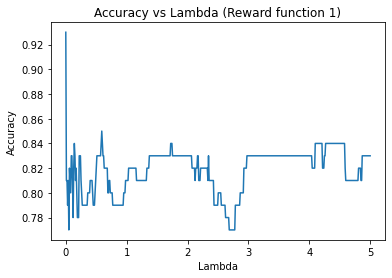

In [34]:
plt.plot(np.linspace(0,5,500),accuracy_arr)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda (Reward function 1)')
plt.show()

In [35]:
# plt.plot(np.linspace(0,5,500),accuracy_arr)
# plt.xlabel('Lambda')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Lambda (Reward function 1)')
# plt.show()

# Question 12

In [36]:
lambda_vals = np.linspace(0,5,500)

In [37]:
print ('Value of lambda for best accuracy ', lambda_vals[np.argmax(accuracy_arr)])
print ('Best value of accuracy ', best_score)

Value of lambda for best accuracy  0.0
Best value of accuracy  0.93


# Question 13

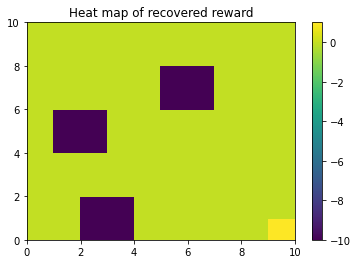

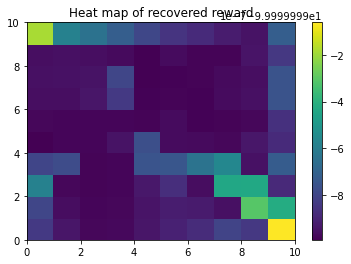

In [38]:
best_rewards_1 = best_rewards.reshape(10,10).T


plt.pcolor(np.flipud(reward1))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()

plt.pcolor(np.flipud(best_rewards_1))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()


# Question 14

In [39]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,eps,best_rewards_1,state_space,up,down,left,right,1)

In [40]:
checkpoints.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

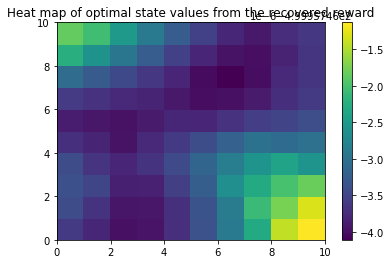

In [41]:
plt.pcolor(np.flipud(checkpoints[42]))
plt.colorbar()
plt.title('Heat map of optimal state values from the recovered reward')
plt.show()

# Question 15 
(Theory) 

# Question 16

In [42]:
optim_policy, directions, _= policy_iteration_checkpoints(gamma,eps,best_rewards_1,state_space,up,down,left,right,1)

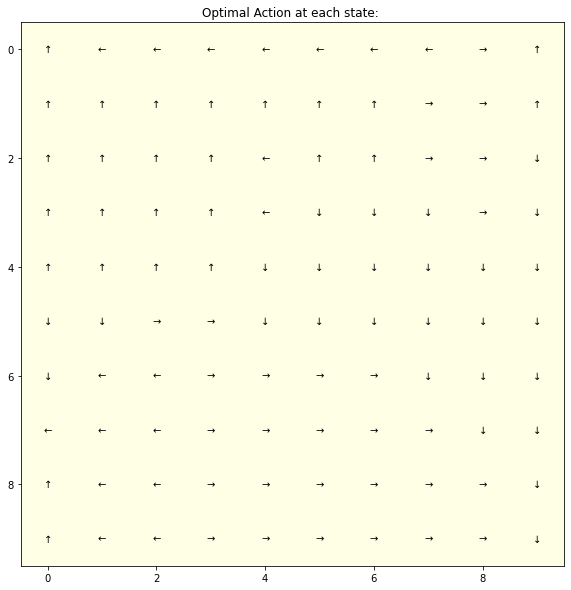

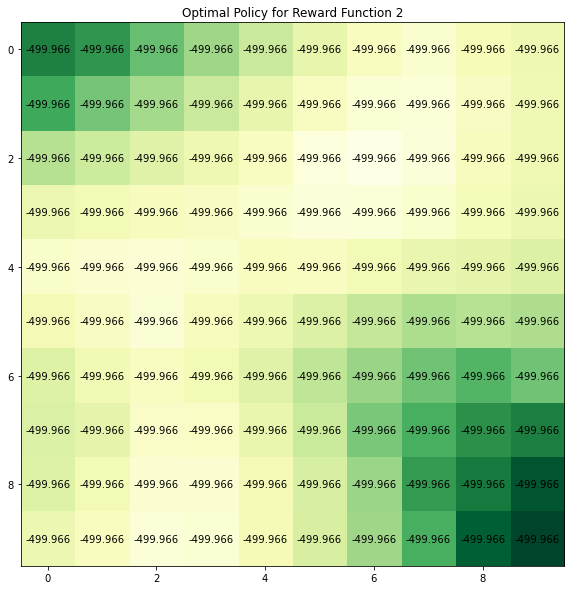

In [43]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 2")
plt.show()

In [44]:
print (directions)

[['↑' '←' '←' '←' '←' '←' '←' '←' '→' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↑']
 ['↑' '↑' '↑' '↑' '←' '↑' '↑' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '←' '↓' '↓' '↓' '→' '↓']
 ['↑' '↑' '↑' '↑' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '←' '←' '→' '→' '→' '→' '↓' '↓' '↓']
 ['←' '←' '←' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']]


# Question 17
(Theory)

# Question 18

In [45]:
optim_policy, directions, optim_policy_a = policy_iteration_checkpoints(gamma,eps,reward2,state_space,up,down,left,right,1)

In [46]:
best_score, best_rewards, accuracy_arr, all_rewards = iter_acc(grid_object, optim_policy_a)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5000e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.4711e+01 -2.1532e+04  2e+04  2e-02  8e+00  2e+00
 2: -2.9950e+02 -1.6672e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.2233e+03 -1.2321e+04  2e+04  1e-02  4e+00  6e+00
 4: -3.7565e+03 -1.4264e+04  2e+04  9e-03  4e+00  1e+01
 5: -5.9194e+03 -1.2648e+04  2e+04  6e-03  3e+00  9e+00
 6: -8.6462e+03 -1.0223e+04  4e+03  1e-03  6e-01  3e+00
 7: -9.7646e+03 -9.9999e+03  6e+02  2e-04  9e-02  5e-01
 8: -9.9842e+03 -9.9995e+03  4e+01  1e-05  6e-03  4e-02
 9: -9.9998e+03 -1.0000e+04  4e-01  1e-07  6e-05  4e-04
10: -1.0000e+04 -1.0000e+04  4e-03  1e-09  6e-07  4e-06
11: -1.0000e+04 -1.0000e+04  4e-05  1e-11  6e-09  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5100e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.5902e+01 -2.1651e+04  2e+04  2e-02  8e+00  2e+00
 2: -3.0784e+02 -1.6783e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.2518e+03 -1.2445e+04 

13: -9.7158e+05 -9.7135e+05  2e+06  1e-03  5e-01  2e+03
14: -9.6032e+07 -9.5874e+07  2e+08  1e-03  5e-01  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5902e+04  3e+04  2e-02  1e+01  1e+00
 1: -4.5781e+01 -2.2592e+04  2e+04  2e-02  8e+00  2e+00
 2: -3.7869e+02 -1.7674e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.4976e+03 -1.3455e+04  2e+04  1e-02  4e+00  7e+00
 4: -4.4623e+03 -1.5616e+04  2e+04  1e-02  4e+00  1e+01
 5: -7.0158e+03 -1.3216e+04  1e+04  5e-03  2e+00  8e+00
 6: -9.2124e+03 -1.1611e+04  6e+03  2e-03  9e-01  3e+00
 7: -9.1594e+03 -1.1678e+04  7e+03  2e-03  9e-01  4e+00
 8: -1.0108e+04 -1.1634e+04  6e+03  1e-03  6e-01  4e+00
 9: -1.1559e+04 -1.3910e+04  2e+04  2e-03  9e-01  1e+01
10: -1.2777e+04 -1.5020e+04  3e+04  2e-03  8e-01  2e+01
11: -2.1305e+04 -2.3348e+04  6e+04  2e-03  8e-01  3e+01
12: -6.7264e+04 -6.8835e+04  2e+05  1e-03  6e-01  1e+02
13: -1.6326e+06 -1.6316e+06  4e+06  1e-03  6e-01  3e+03
14: -1.62

 7: -1.3349e+04 -1.7339e+04  3e+04  3e-03  1e+00  2e+01
 8: -2.0463e+04 -2.4561e+04  6e+04  3e-03  2e+00  4e+01
 9: -6.2317e+04 -6.5876e+04  2e+05  3e-03  1e+00  1e+02
10: -1.4185e+06 -1.4197e+06  3e+06  3e-03  1e+00  2e+03
11: -1.4121e+08 -1.4099e+08  3e+08  3e-03  1e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6904e+04  3e+04  2e-02  1e+01  1e+00
 1: -5.9028e+01 -2.3758e+04  3e+04  2e-02  9e+00  2e+00
 2: -4.7821e+02 -1.8784e+04  2e+04  2e-02  7e+00  5e+00
 3: -1.8538e+03 -1.4780e+04  2e+04  1e-02  5e+00  7e+00
 4: -5.2305e+03 -1.6940e+04  2e+04  1e-02  4e+00  1e+01
 5: -9.4717e+03 -1.2977e+04  9e+03  3e-03  1e+00  6e+00
 6: -1.1192e+04 -1.6610e+04  4e+04  5e-03  2e+00  2e+01
 7: -1.4478e+04 -1.9668e+04  5e+04  4e-03  2e+00  3e+01
 8: -2.9086e+04 -3.3519e+04  9e+04  4e-03  2e+00  5e+01
 9: -1.7016e+05 -1.7380e+05  5e+05  3e-03  1e+00  3e+02
10: -1.1048e+07 -1.1035e+07  3e+07  3e-03  1e+00  2e+04
Certifica

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8006e+04  3e+04  2e-02  1e+01  1e+00
 1: -7.4764e+01 -2.5032e+04  3e+04  2e-02  9e+00  2e+00
 2: -6.0344e+02 -2.0004e+04  2e+04  2e-02  7e+00  6e+00
 3: -2.3060e+03 -1.7049e+04  2e+04  1e-02  5e+00  9e+00
 4: -6.7611e+03 -1.7875e+04  2e+04  9e-03  4e+00  1e+01
 5: -9.9639e+03 -1.5368e+04  1e+04  4e-03  2e+00  8e+00
 6: -1.2541e+04 -2.1336e+04  5e+04  7e-03  3e+00  2e+01
 7: -1.7965e+04 -2.6301e+04  7e+04  7e-03  3e+00  4e+01
 8: -4.5254e+04 -5.1937e+04  1e+05  5e-03  2e+00  7e+01
 9: -4.5294e+05 -4.5812e+05  1e+06  5e-03  2e+00  6e+02
10: -4.1606e+07 -4.1555e+07  1e+08  5e-03  2e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8106e+04  3e+04  2e-02  1e+01  1e+00
 1: -7.6255e+01 -2.5147e+04  3e+04  2e-02  9e+00  2e+00
 2: -6.1572e+02 -2.0114e+04  2e+04  2e-02  7e+00  6e+00
 3: -2.3100e+03 -1.7468e+04  2e+04  1e-02  5e+00  9e+00
 4: -7.0169

 6: -1.6416e+04 -2.4852e+04  5e+04  6e-03  3e+00  2e+01
 7: -2.4043e+04 -3.3138e+04  8e+04  7e-03  3e+00  4e+01
 8: -9.1765e+04 -9.9832e+04  2e+05  6e-03  3e+00  1e+02
 9: -2.3143e+06 -2.3188e+06  5e+06  6e-03  3e+00  3e+03
10: -2.3115e+08 -2.3087e+08  5e+08  6e-03  3e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.9208e+04  3e+04  2e-02  1e+01  1e+00
 1: -9.3340e+01 -2.6411e+04  3e+04  2e-02  9e+00  2e+00
 2: -7.5613e+02 -2.1375e+04  3e+04  2e-02  7e+00  6e+00
 3: -2.4837e+03 -2.1341e+04  3e+04  1e-02  6e+00  1e+01
 4: -7.2246e+03 -1.6517e+04  2e+04  7e-03  3e+00  1e+01
 5: -9.4462e+03 -1.6832e+04  2e+04  6e-03  3e+00  1e+01
 6: -1.6525e+04 -2.5169e+04  5e+04  7e-03  3e+00  2e+01
 7: -2.4337e+04 -3.3665e+04  8e+04  7e-03  3e+00  4e+01
 8: -9.3707e+04 -1.0196e+05  3e+05  6e-03  3e+00  1e+02
 9: -2.4156e+06 -2.4202e+06  5e+06  6e-03  3e+00  3e+03
10: -2.4132e+08 -2.4103e+08  5e+08  6e-03  3e+00  3e+05
Certifica

 1: -1.1168e+02 -2.7667e+04  3e+04  2e-02  9e+00  2e+00
 2: -8.9879e+02 -2.2746e+04  3e+04  2e-02  7e+00  7e+00
 3: -2.8956e+03 -2.4391e+04  3e+04  2e-02  7e+00  1e+01
 4: -7.7849e+03 -1.7393e+04  2e+04  7e-03  3e+00  1e+01
 5: -1.0074e+04 -1.8718e+04  2e+04  6e-03  3e+00  1e+01
 6: -1.8187e+04 -2.8836e+04  6e+04  8e-03  4e+00  3e+01
 7: -3.0172e+04 -4.1884e+04  1e+05  9e-03  4e+00  5e+01
 8: -1.3624e+05 -1.4648e+05  4e+05  8e-03  3e+00  2e+02
 9: -5.4150e+06 -5.4183e+06  1e+07  7e-03  3e+00  6e+03
10: -5.4192e+08 -5.4129e+08  1e+09  7e-03  3e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0411e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.1341e+02 -2.7781e+04  3e+04  2e-02  9e+00  2e+00
 2: -9.1238e+02 -2.2871e+04  3e+04  2e-02  7e+00  7e+00
 3: -2.9487e+03 -2.4681e+04  3e+04  2e-02  7e+00  1e+01
 4: -7.8634e+03 -1.7492e+04  2e+04  7e-03  3e+00  1e+01
 5: -1.0200e+04 -1.8985e+04  2e+04  6e-03  3e+00  1e+01
 6: -1.85

 3: -3.4512e+03 -2.7197e+04  4e+04  2e-02  7e+00  1e+01
 4: -8.8970e+03 -1.8781e+04  2e+04  7e-03  3e+00  1e+01
 5: -1.4813e+04 -2.7453e+04  5e+04  9e-03  4e+00  3e+01
 6: -2.6450e+04 -3.9045e+04  8e+04  9e-03  4e+00  4e+01
 7: -7.9843e+04 -9.2915e+04  2e+05  9e-03  4e+00  1e+02
 8: -1.2296e+06 -1.2403e+06  3e+06  8e-03  4e+00  1e+03
 9: -1.2135e+08 -1.2123e+08  3e+08  9e-03  4e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1613e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.3501e+02 -2.9145e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.0635e+03 -2.4492e+04  3e+04  2e-02  7e+00  7e+00
 3: -3.4908e+03 -2.7393e+04  4e+04  2e-02  7e+00  1e+01
 4: -8.9925e+03 -1.8912e+04  2e+04  7e-03  3e+00  1e+01
 5: -1.6577e+04 -3.0589e+04  7e+04  1e-02  4e+00  3e+01
 6: -2.7654e+04 -4.3084e+04  1e+05  1e-02  5e+00  6e+01
 7: -1.0263e+05 -1.1551e+05  3e+05  9e-03  4e+00  1e+02
 8: -2.5271e+06 -2.5363e+06  6e+06  9e-03  4e+00  3e+03
 9: -2.52

 9: -5.0096e+07 -5.0053e+07  1e+08  1e-02  4e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.2816e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.5817e+02 -3.0503e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.2166e+03 -2.6156e+04  3e+04  2e-02  7e+00  8e+00
 3: -3.9930e+03 -2.9779e+04  4e+04  2e-02  8e+00  2e+01
 4: -1.0187e+04 -2.0591e+04  2e+04  7e-03  3e+00  1e+01
 5: -1.3813e+04 -2.8373e+04  5e+04  1e-02  4e+00  3e+01
 6: -2.4319e+04 -4.0329e+04  9e+04  1e-02  5e+00  4e+01
 7: -5.8581e+04 -7.5177e+04  2e+05  1e-02  5e+00  9e+01
 8: -5.3380e+05 -5.4756e+05  1e+06  1e-02  4e+00  6e+02
 9: -4.6637e+07 -4.6598e+07  1e+08  1e-02  4e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.2916e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.6018e+02 -3.0616e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.2298e+03 -2.6295e+04  3e+04  2e-02  7e+00  8e+00
 3: -4.0372e+03 -2.9981e+0

 5: -1.8686e+04 -3.8092e+04  8e+04  1e-02  5e+00  4e+01
 6: -3.6072e+04 -5.7613e+04  2e+05  1e-02  6e+00  7e+01
 7: -1.4808e+05 -1.6518e+05  4e+05  1e-02  5e+00  2e+02
 8: -4.2977e+06 -4.3098e+06  1e+07  1e-02  5e+00  5e+03
 9: -4.3012e+08 -4.2966e+08  1e+09  1e-02  5e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.4118e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.8507e+02 -3.1971e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.3933e+03 -2.7962e+04  3e+04  2e-02  7e+00  8e+00
 3: -4.5984e+03 -3.2439e+04  5e+04  2e-02  8e+00  2e+01
 4: -1.1287e+04 -2.3107e+04  3e+04  8e-03  3e+00  1e+01
 5: -1.8970e+04 -3.8584e+04  9e+04  1e-02  5e+00  4e+01
 6: -3.6606e+04 -5.8358e+04  2e+05  1e-02  6e+00  7e+01
 7: -1.5171e+05 -1.6897e+05  4e+05  1e-02  5e+00  2e+02
 8: -4.4322e+06 -4.4443e+06  1e+07  1e-02  5e+00  5e+03
 9: -4.4359e+08 -4.4311e+08  1e+09  1e-02  5e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -1.5668e+03 -2.9634e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.2199e+03 -3.4974e+04  5e+04  2e-02  8e+00  2e+01
 4: -1.2185e+04 -2.5985e+04  3e+04  9e-03  4e+00  1e+01
 5: -2.2602e+04 -4.4859e+04  1e+05  1e-02  6e+00  4e+01
 6: -4.3119e+04 -6.7575e+04  2e+05  2e-02  6e+00  8e+01
 7: -1.9084e+05 -2.1017e+05  5e+05  1e-02  5e+00  2e+02
 8: -5.9459e+06 -5.9587e+06  1e+07  1e-02  5e+00  6e+03
 9: -5.9518e+08 -5.9455e+08  1e+09  1e-02  5e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5421e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.1388e+02 -3.3435e+04  4e+04  2e-02  9e+00  3e+00
 2: -1.5818e+03 -2.9774e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.2667e+03 -3.5178e+04  5e+04  2e-02  8e+00  2e+01
 4: -1.2262e+04 -2.6222e+04  3e+04  9e-03  4e+00  1e+01
 5: -2.2897e+04 -4.5367e+04  1e+05  1e-02  6e+00  4e+01
 6: -4.3705e+04 -6.8390e+04  2e+05  2e-02  6e+00  8e+01
 7: -1.9450e+05 -2.1400e+05  5e+05  1e-02  5e+00  2e+02
 8: -6.10

 8: -8.1055e+06 -8.1180e+06  2e+07  1e-02  5e+00  9e+03
 9: -8.1132e+08 -8.1048e+08  2e+09  1e-02  5e+00  9e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.6623e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.4223e+02 -3.4784e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.7669e+03 -3.1453e+04  4e+04  2e-02  7e+00  9e+00
 3: -5.7367e+03 -3.7465e+04  5e+04  2e-02  8e+00  2e+01
 4: -1.3202e+04 -2.8951e+04  4e+04  1e-02  4e+00  2e+01
 5: -2.6493e+04 -5.1359e+04  1e+05  2e-02  6e+00  5e+01
 6: -5.1187e+04 -7.8534e+04  2e+05  2e-02  7e+00  9e+01
 7: -2.4587e+05 -2.6728e+05  6e+05  1e-02  5e+00  3e+02
 8: -8.3430e+06 -8.3554e+06  2e+07  1e-02  5e+00  9e+03
 9: -8.3507e+08 -8.3420e+08  2e+09  1e-02  5e+00  9e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.6723e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.4467e+02 -3.4897e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.7828e+03 -3.1593e+0

 7: -2.9938e+05 -3.2310e+05  8e+05  1e-02  6e+00  4e+02
 8: -1.1452e+07 -1.1464e+07  3e+07  1e-02  5e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7926e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.7489e+02 -3.6245e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.9801e+03 -3.3281e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.3009e+03 -3.9989e+04  6e+04  2e-02  8e+00  2e+01
 4: -1.4387e+04 -3.2095e+04  4e+04  1e-02  4e+00  2e+01
 5: -3.0971e+04 -5.8279e+04  1e+05  2e-02  6e+00  5e+01
 6: -6.0990e+04 -9.1087e+04  2e+05  2e-02  7e+00  1e+02
 7: -3.0432e+05 -3.2824e+05  8e+05  1e-02  6e+00  4e+02
 8: -1.1765e+07 -1.1776e+07  3e+07  1e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.8026e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.7749e+02 -3.6357e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.9970e+03 -3.3423e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.3468e+03 -4.0186e+0

 4: -1.5790e+04 -3.5446e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.6148e+04 -6.5675e+04  1e+05  2e-02  6e+00  5e+01
 6: -7.3290e+04 -1.0594e+05  3e+05  2e-02  7e+00  1e+02
 7: -3.8113e+05 -4.0767e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.7090e+07 -1.7099e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9329e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.1240e+02 -3.7818e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.2253e+03 -3.5265e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.9803e+03 -4.2777e+04  6e+04  2e-02  8e+00  2e+01
 4: -1.5909e+04 -3.5713e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.6581e+04 -6.6266e+04  1e+05  2e-02  6e+00  5e+01
 6: -7.4381e+04 -1.0721e+05  3e+05  2e-02  7e+00  1e+02
 7: -3.8823e+05 -4.1497e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.7594e+07 -1.7603e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9429e+0

 1: -3.4947e+02 -3.9278e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.4686e+03 -3.7123e+04  5e+04  2e-02  7e+00  1e+01
 3: -7.6870e+03 -4.5446e+04  7e+04  2e-02  8e+00  2e+01
 4: -1.7575e+04 -3.9351e+04  5e+04  1e-02  4e+00  2e+01
 5: -4.2665e+04 -7.4322e+04  2e+05  2e-02  6e+00  6e+01
 6: -9.0513e+04 -1.2568e+05  3e+05  2e-02  7e+00  1e+02
 7: -4.9998e+05 -5.2932e+05  1e+06  2e-02  6e+00  6e+02
 8: -2.6166e+07 -2.6169e+07  6e+07  2e-02  6e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0731e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.5241e+02 -3.9391e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.4879e+03 -3.7266e+04  5e+04  2e-02  7e+00  1e+01
 3: -7.7447e+03 -4.5655e+04  7e+04  2e-02  8e+00  2e+01
 4: -1.7714e+04 -3.9643e+04  5e+04  1e-02  4e+00  2e+01
 5: -4.3172e+04 -7.4971e+04  2e+05  2e-02  6e+00  6e+01
 6: -9.1942e+04 -1.2728e+05  3e+05  2e-02  7e+00  1e+02
 7: -5.1052e+05 -5.4006e+05  1e+06  2e-02  6e+00  6e+02
 8: -2.70

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2034e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.9187e+02 -4.0853e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.7482e+03 -3.9143e+04  5e+04  2e-02  7e+00  1e+01
 3: -8.5412e+03 -4.8425e+04  7e+04  2e-02  8e+00  2e+01
 4: -1.9861e+04 -4.3903e+04  6e+04  1e-02  5e+00  2e+01
 5: -5.0627e+04 -8.4105e+04  2e+05  2e-02  6e+00  7e+01
 6: -1.1583e+05 -1.5324e+05  4e+05  2e-02  7e+00  2e+02
 7: -7.0141e+05 -7.3344e+05  2e+06  2e-02  6e+00  8e+02
 8: -4.4250e+07 -4.4237e+07  1e+08  2e-02  6e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2134e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.9500e+02 -4.0965e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.7689e+03 -3.9288e+04  5e+04  2e-02  7e+00  1e+01
 3: -8.6063e+03 -4.8642e+04  7e+04  2e-02  8e+00  2e+01
 4: -2.0048e+04 -4.4254e+04  6e+04  1e-02  5e+00  2e+01
 5: -5.1259e+04 -8.4852e+04  2e+05  2e-02  6e+00  7e+01
 6: -1.1811

 7: -1.0713e+06 -1.1052e+06  3e+06  2e-02  6e+00  1e+03
 8: -8.1866e+07 -8.1818e+07  2e+08  2e-02  6e+00  8e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3437e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.3694e+02 -4.2429e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.0476e+03 -4.1187e+04  5e+04  2e-02  7e+00  1e+01
 3: -9.5061e+03 -5.1533e+04  8e+04  2e-02  7e+00  2e+01
 4: -2.2782e+04 -4.9086e+04  7e+04  1e-02  5e+00  3e+01
 5: -6.0342e+04 -9.5232e+04  2e+05  2e-02  6e+00  7e+01
 6: -1.5224e+05 -1.9140e+05  5e+05  2e-02  7e+00  2e+02
 7: -1.1141e+06 -1.1482e+06  3e+06  2e-02  6e+00  1e+03
 8: -8.6439e+07 -8.6387e+07  2e+08  2e-02  6e+00  9e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3537e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.4026e+02 -4.2542e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.0698e+03 -4.1334e+04  5e+04  2e-02  7e+00  1e+01
 3: -9.5797e+03 -5.1760e+0

 6: -2.0000e+05 -2.4023e+05  6e+05  2e-02  7e+00  2e+02
 7: -2.0743e+06 -2.1090e+06  5e+06  2e-02  6e+00  2e+03
 8: -1.9137e+08 -1.9122e+08  4e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4840e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.8476e+02 -4.4008e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.3680e+03 -4.3256e+04  5e+04  2e-02  7e+00  1e+01
 3: -1.0598e+04 -5.4791e+04  8e+04  2e-02  7e+00  3e+01
 4: -2.6503e+04 -5.5029e+04  8e+04  1e-02  5e+00  3e+01
 5: -7.2404e+04 -1.0834e+05  2e+05  2e-02  6e+00  8e+01
 6: -2.0455e+05 -2.4485e+05  6e+05  2e-02  7e+00  3e+02
 7: -2.1990e+06 -2.2337e+06  5e+06  2e-02  6e+00  2e+03
 8: -2.0498e+08 -2.0482e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4940e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.8828e+02 -4.4121e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.3918e+03 -4.3405e+0

 5: -8.6272e+04 -1.2300e+05  2e+05  2e-02  6e+00  9e+01
 6: -2.8386e+05 -3.2492e+05  8e+05  2e-02  7e+00  3e+02
 7: -5.4800e+06 -5.5133e+06  1e+07  2e-02  6e+00  5e+03
 8: -5.4572e+08 -5.4527e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6242e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.3544e+02 -4.5590e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.7111e+03 -4.5356e+04  6e+04  2e-02  7e+00  1e+01
 3: -1.1838e+04 -5.8224e+04  9e+04  2e-02  7e+00  3e+01
 4: -3.1353e+04 -6.2070e+04  9e+04  1e-02  5e+00  4e+01
 5: -8.7433e+04 -1.2423e+05  2e+05  2e-02  6e+00  9e+01
 6: -2.9190e+05 -3.3303e+05  8e+05  2e-02  7e+00  3e+02
 7: -5.9500e+06 -5.9831e+06  1e+07  2e-02  6e+00  5e+03
 8: -5.9325e+08 -5.9276e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6343e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.3917e+02 -4.5704e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7645e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.8908e+02 -4.7177e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.0785e+03 -4.7488e+04  6e+04  2e-02  7e+00  1e+01
 3: -1.3248e+04 -6.1858e+04  9e+04  2e-02  7e+00  3e+01
 4: -3.7821e+04 -7.0671e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.0722e+05 -1.4489e+05  3e+05  2e-02  6e+00  1e+02
 6: -4.8398e+05 -5.2598e+05  1e+06  2e-02  6e+00  5e+02
 7: -1.4829e+07 -1.4859e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7745e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.9302e+02 -4.7290e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.1057e+03 -4.7641e+04  6e+04  2e-02  7e+00  1e+01
 3: -1.3356e+04 -6.2126e+04  9e+04  2e-02  7e+00  3e+01
 4: -3.8369e+04 -7.1372e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.0899e+05 -1.4672e+05  3e+05  2e-02  6e+00  1e+02
 6: -5.0848e+05 -5.5056e+05  1e+06  2e-02  6e+00  5e+02
 7: -1.5926

 2: -4.5012e+03 -4.9812e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.4980e+04 -6.6009e+04  1e+05  2e-02  7e+00  3e+01
 4: -4.7339e+04 -8.2559e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.4231e+05 -1.8110e+05  3e+05  2e-02  6e+00  1e+02
 6: -9.7500e+05 -1.0170e+06  2e+06  2e-02  6e+00  8e+02
 7: -4.9988e+07 -4.9993e+07  1e+08  2e-02  6e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9248e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.5414e+02 -4.8995e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.5305e+03 -4.9968e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.5104e+04 -6.6296e+04  1e+05  2e-02  7e+00  3e+01
 4: -4.7977e+04 -8.3414e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.4490e+05 -1.8383e+05  3e+05  2e-02  6e+00  1e+02
 6: -1.0109e+06 -1.0529e+06  2e+06  2e-02  6e+00  8e+02
 7: -5.3630e+07 -5.3633e+07  1e+08  2e-02  6e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9349e+0

 4: -5.8513e+04 -9.7007e+04  2e+05  2e-02  5e+00  6e+01
 5: -1.9251e+05 -2.3512e+05  5e+05  2e-02  6e+00  2e+02
 6: -1.4914e+06 -1.5354e+06  3e+06  2e-02  6e+00  1e+03
 7: -1.1137e+08 -1.1134e+08  2e+08  2e-02  6e+00  8e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0752e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.1892e+02 -5.0706e+04  5e+04  2e-02  7e+00  4e+00
 2: -4.9880e+03 -5.2341e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.7123e+04 -7.0776e+04  1e+05  2e-02  7e+00  3e+01
 4: -5.9399e+04 -9.8115e+04  2e+05  2e-02  5e+00  6e+01
 5: -1.9851e+05 -2.4152e+05  5e+05  2e-02  6e+00  2e+02
 6: -1.6035e+06 -1.6480e+06  3e+06  2e-02  6e+00  1e+03
 7: -1.2469e+08 -1.2465e+08  3e+08  2e-02  6e+00  9e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0852e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.2338e+02 -5.0820e+04  6e+04  2e-02  7e+00  4e+00
 2: -5.0197e+03 -5.2501e+0

 6: -1.9499e+06 -1.9968e+06  4e+06  2e-02  6e+00  2e+03
 7: -1.6433e+08 -1.6425e+08  4e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2255e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.8753e+02 -5.2423e+04  6e+04  2e-02  7e+00  4e+00
 2: -5.4809e+03 -5.4765e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.9462e+04 -7.5615e+04  1e+05  2e-02  7e+00  4e+01
 4: -7.5553e+04 -1.1765e+05  2e+05  2e-02  5e+00  8e+01
 5: -2.0534e+05 -2.5257e+05  5e+05  2e-02  6e+00  2e+02
 6: -1.8224e+06 -1.8692e+06  4e+06  2e-02  6e+00  2e+03
 7: -1.4898e+08 -1.4890e+08  3e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2355e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.9225e+02 -5.2538e+04  6e+04  2e-02  7e+00  4e+00
 2: -5.5151e+03 -5.4928e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.9630e+04 -7.5952e+04  1e+05  2e-02  7e+00  4e+01
 4: -7.6856e+04 -1.1919e+0

 7: -1.7606e+08 -1.7594e+08  4e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3758e+04  6e+04  2e-02  7e+00  1e+00
 1: -8.6013e+02 -5.4147e+04  6e+04  2e-02  7e+00  4e+00
 2: -6.0124e+03 -5.7244e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.2179e+04 -8.0873e+04  1e+05  2e-02  7e+00  4e+01
 4: -9.4687e+04 -1.4104e+05  3e+05  2e-02  6e+00  9e+01
 5: -2.2008e+05 -2.7494e+05  6e+05  2e-02  7e+00  3e+02
 6: -2.0285e+06 -2.0793e+06  5e+06  2e-02  6e+00  2e+03
 7: -1.7193e+08 -1.7181e+08  4e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3858e+04  6e+04  2e-02  7e+00  1e+00
 1: -8.6511e+02 -5.4262e+04  6e+04  2e-02  7e+00  4e+00
 2: -6.0493e+03 -5.7411e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.2376e+04 -8.1240e+04  1e+05  2e-02  7e+00  4e+01
 4: -9.4981e+04 -1.4182e+05  3e+05  2e-02  6e+00  9e+01
 5: -2.2002e+05 -2.7535e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5261e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.3687e+02 -5.5879e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.5858e+03 -5.9784e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.5347e+04 -8.6617e+04  1e+05  2e-02  7e+00  4e+01
 4: -9.9888e+04 -1.5293e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.2608e+05 -2.8727e+05  7e+05  2e-02  7e+00  3e+02
 6: -1.8089e+06 -1.8637e+06  4e+06  2e-02  7e+00  2e+03
 7: -1.4006e+08 -1.3999e+08  3e+08  2e-02  7e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5361e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.4214e+02 -5.5995e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.6256e+03 -5.9955e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.5577e+04 -8.7019e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0029e+05 -1.5374e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.2692e+05 -2.8849e+05  7e+05  2e-02  7e+00  3e+02
 6: -1.8055e+06 -1.8605e+06  4e+06  2e-02  7e+00  2e+03
 7: -1.3928

 2: -7.2048e+03 -6.2391e+04  8e+04  2e-02  6e+00  2e+01
 3: -2.9052e+04 -9.2929e+04  2e+05  3e-02  7e+00  5e+01
 4: -1.0679e+05 -1.6535e+05  3e+05  2e-02  7e+00  1e+02
 5: -2.4345e+05 -3.0987e+05  8e+05  3e-02  7e+00  3e+02
 6: -1.8466e+06 -1.9048e+06  4e+06  2e-02  7e+00  2e+03
 7: -1.3871e+08 -1.3863e+08  3e+08  2e-02  7e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6864e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0235e+03 -5.7735e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.2479e+03 -6.2568e+04  8e+04  2e-02  6e+00  2e+01
 3: -2.9321e+04 -9.3372e+04  2e+05  3e-02  7e+00  5e+01
 4: -1.0731e+05 -1.6621e+05  3e+05  2e-02  7e+00  1e+02
 5: -2.4496e+05 -3.1169e+05  8e+05  3e-02  7e+00  3e+02
 6: -1.8550e+06 -1.9134e+06  4e+06  2e-02  7e+00  2e+03
 7: -1.3930e+08 -1.3923e+08  3e+08  2e-02  7e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6964e+0

 4: -1.1546e+05 -1.7861e+05  4e+05  2e-02  7e+00  1e+02
 5: -2.7105e+05 -3.4180e+05  9e+05  3e-02  8e+00  3e+02
 6: -2.0455e+06 -2.1069e+06  5e+06  2e-02  7e+00  2e+03
 7: -1.5582e+08 -1.5574e+08  4e+08  2e-02  7e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8367e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1094e+03 -5.9485e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.9210e+03 -6.5261e+04  8e+04  2e-02  6e+00  2e+01
 3: -3.3710e+04 -1.0039e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.1610e+05 -1.7953e+05  4e+05  2e-02  7e+00  1e+02
 5: -2.7329e+05 -3.4430e+05  9e+05  3e-02  8e+00  3e+02
 6: -2.0646e+06 -2.1262e+06  5e+06  2e-02  7e+00  2e+03
 7: -1.5761e+08 -1.5752e+08  4e+08  2e-02  7e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8467e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1153e+03 -5.9602e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.9678e+03 -6.5443e+0

 5: -3.0365e+05 -3.7771e+05  9e+05  3e-02  8e+00  4e+02
 6: -2.4503e+06 -2.5142e+06  6e+06  2e-02  7e+00  2e+03
 7: -1.9706e+08 -1.9695e+08  5e+08  2e-02  7e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9870e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2000e+03 -6.1244e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.6491e+03 -6.8034e+04  8e+04  2e-02  6e+00  2e+01
 3: -3.8875e+04 -1.0820e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.2686e+05 -1.9407e+05  4e+05  3e-02  7e+00  1e+02
 5: -3.0602e+05 -3.8026e+05  1e+06  3e-02  8e+00  4e+02
 6: -2.4872e+06 -2.5512e+06  6e+06  2e-02  7e+00  2e+03
 7: -2.0100e+08 -2.0088e+08  5e+08  2e-02  7e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9970e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2062e+03 -6.1361e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.6997e+03 -6.8222e+04  8e+04  2e-02  6e+00  2e+01
 3: -3.9251e+04 -1.0875e+0

 7: -2.7703e+08 -2.7685e+08  6e+08  3e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1373e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2956e+03 -6.3013e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.4373e+03 -7.0894e+04  9e+04  2e-02  6e+00  2e+01
 3: -4.4959e+04 -1.1692e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.3982e+05 -2.1020e+05  4e+05  3e-02  7e+00  1e+02
 5: -3.4822e+05 -4.2496e+05  1e+06  3e-02  8e+00  4e+02
 6: -3.2475e+06 -3.3130e+06  8e+06  3e-02  7e+00  3e+03
 7: -2.8428e+08 -2.8409e+08  7e+08  3e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1473e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.3022e+03 -6.3131e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.4922e+03 -7.1088e+04  9e+04  2e-02  6e+00  2e+01
 3: -4.5398e+04 -1.1753e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.4076e+05 -2.1134e+05  4e+05  3e-02  7e+00  1e+02
 5: -3.5154e+05 -4.2842e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2876e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.3964e+03 -6.4792e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0292e+04 -7.3850e+04  9e+04  2e-02  6e+00  2e+01
 3: -5.2085e+04 -1.2665e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.5529e+05 -2.2836e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.0653e+05 -4.8525e+05  1e+06  3e-02  8e+00  4e+02
 6: -4.6342e+06 -4.7007e+06  1e+07  3e-02  7e+00  4e+03
 7: -4.3649e+08 -4.3618e+08  1e+09  3e-02  7e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2976e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.4033e+03 -6.4911e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0351e+04 -7.4051e+04  9e+04  2e-02  6e+00  2e+01
 3: -5.2604e+04 -1.2734e+05  2e+05  3e-02  7e+00  7e+01
 4: -1.5642e+05 -2.2966e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.1118e+05 -4.9001e+05  1e+06  3e-02  8e+00  5e+02
 6: -4.7631e+06 -4.8297e+06  1e+07  3e-02  7e+00  4e+03
 7: -4.5034

 2: -1.1219e+04 -7.6912e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.0529e+04 -1.3767e+05  2e+05  3e-02  7e+00  7e+01
 4: -1.7370e+05 -2.4917e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.8537e+05 -5.6561e+05  1e+06  3e-02  7e+00  5e+02
 6: -7.4115e+06 -7.4776e+06  2e+07  3e-02  7e+00  6e+03
 7: -7.2979e+08 -7.2926e+08  2e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4479e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5098e+03 -6.6703e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.1283e+04 -7.7120e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.1146e+04 -1.3846e+05  2e+05  3e-02  7e+00  7e+01
 4: -1.7505e+05 -2.5066e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.9149e+05 -5.7182e+05  1e+06  3e-02  7e+00  5e+02
 6: -7.6844e+06 -7.7503e+06  2e+07  3e-02  7e+00  6e+03
 7: -7.5768e+08 -7.5712e+08  2e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4579e+0

 2: -1.2296e+04 -8.0305e+04  1e+05  2e-02  6e+00  2e+01
 3: -7.1935e+04 -1.5276e+05  3e+05  3e-02  7e+00  8e+01
 4: -1.9656e+05 -2.7474e+05  6e+05  3e-02  7e+00  2e+02
 5: -6.0285e+05 -6.8450e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.2906e+07 -1.2971e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6082e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6297e+03 -6.8628e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.2366e+04 -8.0521e+04  1e+05  2e-02  6e+00  2e+01
 3: -7.2878e+04 -1.5416e+05  3e+05  3e-02  7e+00  8e+01
 4: -1.9795e+05 -2.7640e+05  6e+05  3e-02  7e+00  2e+02
 5: -6.1138e+05 -6.9316e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.3286e+07 -1.3351e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6182e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6375e+03 -6.8749e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.2437e+04 -8.0739e+0

 2: -1.3551e+04 -8.4069e+04  1e+05  2e-02  6e+00  2e+01
 3: -9.0864e+04 -1.8052e+05  4e+05  3e-02  8e+00  1e+02
 4: -2.2110e+05 -3.0573e+05  7e+05  3e-02  7e+00  2e+02
 5: -7.8155e+05 -8.6585e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.0290e+07 -2.0355e+07  5e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7786e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7646e+03 -7.0689e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3629e+04 -8.4296e+04  1e+05  2e-02  6e+00  2e+01
 3: -9.2203e+04 -1.8245e+05  4e+05  3e-02  8e+00  1e+02
 4: -2.2207e+05 -3.0738e+05  7e+05  3e-02  7e+00  2e+02
 5: -7.9104e+05 -8.7561e+05  2e+06  3e-02  7e+00  7e+02
 6: -2.0610e+07 -2.0676e+07  5e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7886e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7728e+03 -7.0811e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3707e+04 -8.4524e+0

 2: -1.4944e+04 -8.8079e+04  1e+05  2e-02  6e+00  2e+01
 3: -1.1510e+05 -2.1537e+05  5e+05  3e-02  8e+00  1e+02
 4: -2.5413e+05 -3.5131e+05  8e+05  3e-02  8e+00  2e+02
 5: -1.3553e+06 -1.4388e+06  3e+06  3e-02  7e+00  1e+03
 6: -4.0731e+07 -4.0785e+07  9e+07  3e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9489e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.9076e+03 -7.2768e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.5032e+04 -8.8332e+04  1e+05  2e-02  6e+00  2e+01
 3: -1.1567e+05 -2.1632e+05  5e+05  3e-02  8e+00  1e+02
 4: -2.5601e+05 -3.5362e+05  9e+05  3e-02  8e+00  2e+02
 5: -1.3793e+06 -1.4629e+06  3e+06  3e-02  7e+00  1e+03
 6: -4.2116e+07 -4.2169e+07  9e+07  3e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9589e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.9163e+03 -7.2890e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.5121e+04 -8.8587e+0

 2: -1.6516e+04 -9.2507e+04  1e+05  2e-02  6e+00  2e+01
 3: -1.2529e+05 -2.3195e+05  5e+05  3e-02  8e+00  1e+02
 4: -2.8386e+05 -3.8891e+05  1e+06  3e-02  8e+00  3e+02
 5: -1.5800e+06 -1.6672e+06  4e+06  3e-02  7e+00  1e+03
 6: -6.0617e+07 -6.0656e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1192e+04  7e+04  2e-02  6e+00  1e+00
 1: -2.0593e+03 -7.4865e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.6613e+04 -9.2776e+04  1e+05  2e-02  6e+00  2e+01
 3: -1.2592e+05 -2.3295e+05  5e+05  3e-02  8e+00  1e+02
 4: -2.8404e+05 -3.8962e+05  1e+06  3e-02  8e+00  3e+02
 5: -1.5810e+06 -1.6684e+06  4e+06  3e-02  7e+00  1e+03
 6: -6.0779e+07 -6.0818e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1293e+04  7e+04  2e-02  6e+00  1e+00
 1: -2.0684e+03 -7.4989e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.6712e+04 -9.3045e+0

 1: -2.2102e+03 -7.6857e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.8263e+04 -9.7202e+04  1e+05  2e-02  6e+00  3e+01
 3: -1.3658e+05 -2.4957e+05  6e+05  3e-02  9e+00  1e+02
 4: -2.7549e+05 -3.9012e+05  1e+06  4e-02  9e+00  3e+02
 5: -1.4944e+06 -1.5834e+06  4e+06  3e-02  7e+00  1e+03
 6: -5.4484e+07 -5.4527e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2896e+04  8e+04  2e-02  6e+00  1e+00
 1: -2.2200e+03 -7.6983e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.8372e+04 -9.7487e+04  1e+05  2e-02  6e+00  3e+01
 3: -1.3729e+05 -2.5064e+05  6e+05  3e-02  9e+00  1e+02
 4: -2.7198e+05 -3.8717e+05  1e+06  4e-02  9e+00  3e+02
 5: -1.4915e+06 -1.5800e+06  4e+06  3e-02  7e+00  1e+03
 6: -5.3374e+07 -5.3417e+07  1e+08  3e-02  7e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2996e+04  8e+04  2e-02  6e+00  1e+00
 1: -2.2297e+03 -7.7108e+0

 2: -2.0211e+04 -1.0220e+05  1e+05  2e-02  6e+00  3e+01
 3: -1.4919e+05 -2.6842e+05  6e+05  4e-02  9e+00  2e+02
 4: -2.4188e+05 -3.6609e+05  1e+06  4e-02  9e+00  3e+02
 5: -1.1440e+06 -1.2359e+06  3e+06  3e-02  7e+00  1e+03
 6: -3.2295e+07 -3.2361e+07  7e+07  3e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4599e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.3903e+03 -7.9121e+04  9e+04  2e-02  6e+00  6e+00
 2: -2.0333e+04 -1.0250e+05  1e+05  2e-02  6e+00  3e+01
 3: -1.4998e+05 -2.6957e+05  6e+05  4e-02  9e+00  2e+02
 4: -2.4204e+05 -3.6692e+05  1e+06  4e-02  9e+00  4e+02
 5: -1.1453e+06 -1.2373e+06  3e+06  3e-02  7e+00  1e+03
 6: -3.2488e+07 -3.2554e+07  7e+07  3e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4699e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.4006e+03 -7.9248e+04  9e+04  2e-02  6e+00  6e+00
 2: -2.0455e+04 -1.0281e+0

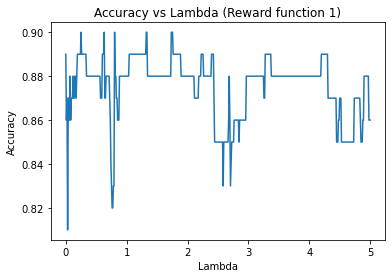

In [47]:
plt.plot(np.linspace(0,5,500),accuracy_arr)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda (Reward function 1)')
plt.show()

# Question 19

In [48]:
value_to_pick = np.linspace(0,5,500)

In [49]:
print ('Value of lambda for best accuracy ', value_to_pick[np.argmax(accuracy_arr)])
print ('Best value of accuracy ', best_score)

Value of lambda for best accuracy  0.250501002004008
Best value of accuracy  0.9


# Question 20

In [50]:
# print (np.amax(accuracy_arr))
print (np.argwhere(accuracy_arr == np.amax(accuracy_arr)))
best_rewards_2 = all_rewards[25]

[[ 25]
 [ 63]
 [ 80]
 [132]
 [133]
 [173]
 [174]
 [175]]


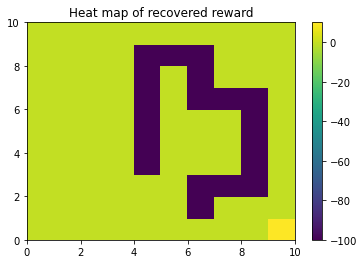

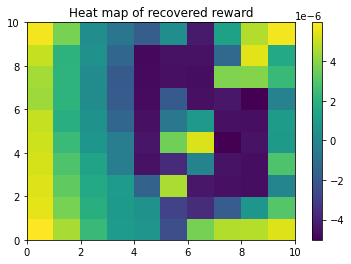

In [51]:

best_rewards_2 = best_rewards_2.reshape(10,10).T

plt.pcolor(np.flipud(reward2))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()

plt.pcolor(np.flipud(best_rewards_2))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()


# Question 21

In [52]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,1e-10,best_rewards_2,state_space,up,down,left,right,1)

In [53]:
checkpoints.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

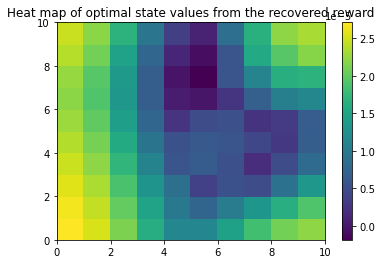

In [54]:

plt.pcolor(np.flipud(checkpoints[49]))
plt.colorbar()
plt.title('Heat map of optimal state values from the recovered reward')
plt.show()

# Question 22
(Theory)

# Question 23

In [55]:
optim_policy, directions, _= policy_iteration_checkpoints(gamma,eps,best_rewards_2,state_space,up,down,left,right,1)

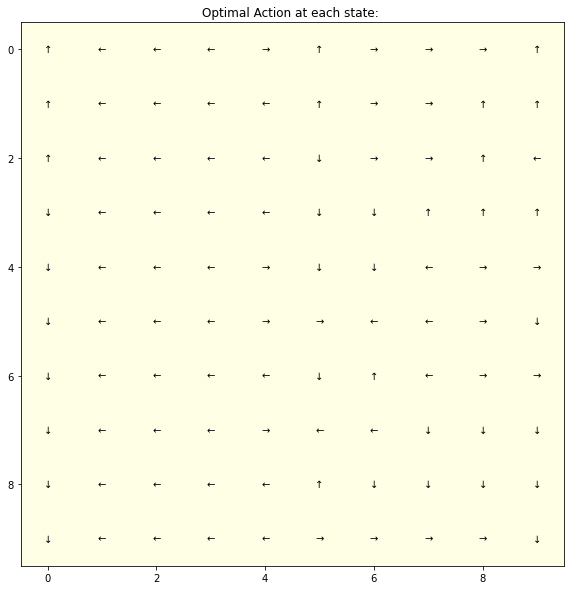

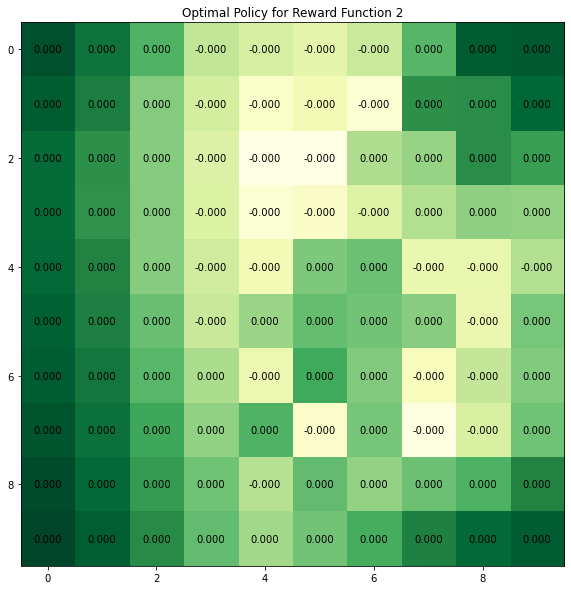

In [56]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 2")
plt.show()

# Question 24
(Theory question)

# Question 25

In [57]:
def adjusted_policy_iteration_checkpoints(gamma,eps,reward,state_space,trans_prob_up,trans_prob_down,trans_prob_left,trans_prob_right,freq=5):
  S = np.zeros(100)
  delta = np.inf
  epochs = 0
  reward = reward.T.reshape(-1)
  policy = np.zeros(100)
  directions = np.zeros(100)
  directions_1 = np.chararray(100,unicode=True)
  while(delta>eps):
    delta = 0
    s = np.copy(S)
    for i in range(0,100):
      up_calc = np.sum(trans_prob_up[i]*(reward+gamma*s))
      down_calc = np.sum(trans_prob_down[i]*(reward+gamma*s))
      left_calc = np.sum(trans_prob_left[i]*(reward+gamma*s))
      right_calc= np.sum(trans_prob_right[i]*(reward+gamma*s))
      S[i] = max(up_calc,down_calc,left_calc,right_calc)
      delta = max(delta,abs(s[i]-S[i]))
  for i in range(0,100):
      up_calc = np.sum(trans_prob_up[i]*(reward+gamma*s))
      down_calc = np.sum(trans_prob_down[i]*(reward+gamma*s))
      left_calc = np.sum(trans_prob_left[i]*(reward+gamma*s))
      right_calc= np.sum(trans_prob_right[i]*(reward+gamma*s))
      if(i!=99):
        if(i%10==0):
          up_calc = -np.inf
        if(i>89):
          right_calc = -np.inf
        if(i<10):
          left_calc = -np.inf
        if((i+1)%10==0):
          down_calc = -np.inf
      temp = max(up_calc,down_calc,left_calc,right_calc)
      policy[i] = temp
      directions[i] = np.argmax([up_calc,down_calc,left_calc,right_calc])
  for i in range(0,100):
    x = directions[i]
    if(x==0):
      directions_1[i] = '\u2191'
    elif(x==1):
      directions_1[i] = '\u2193'
    elif(x==2):
      directions_1[i] = '\u2190'
    else:
      directions_1[i] = '\u2192'
  return policy.reshape(10,10).T,directions_1.reshape(10,10).T,directions.reshape(10,10).T

### Question 25 for reward 1

In [58]:
optim_policy, directions, optim_policy_a = adjusted_policy_iteration_checkpoints(gamma,eps,reward1,state_space,up,down,left,right,1)

In [59]:
best_score, best_rewards, accuracy_arr, _ = iter_acc(grid_object, optim_policy_a)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5000e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.3542e+01 -2.1338e+04  2e+04  2e-02  8e+00  2e+00
 2: -2.7102e+02 -1.5766e+04  2e+04  1e-02  6e+00  4e+00
 3: -9.3875e+02 -1.4462e+04  2e+04  1e-02  5e+00  6e+00
 4: -3.0726e+03 -1.4267e+04  2e+04  1e-02  4e+00  1e+01
 5: -4.9597e+03 -1.2853e+04  2e+04  7e-03  3e+00  9e+00
 6: -6.8826e+03 -1.2390e+04  1e+04  5e-03  2e+00  1e+01
 7: -8.1585e+03 -1.0915e+04  8e+03  2e-03  1e+00  5e+00
 8: -8.0643e+03 -1.0861e+04  8e+03  3e-03  1e+00  6e+00
 9: -9.3262e+03 -1.0144e+04  2e+03  7e-04  3e-01  2e+00
10: -9.9515e+03 -1.0001e+04  1e+02  4e-05  2e-02  1e-01
11: -9.9995e+03 -1.0000e+04  1e+00  5e-07  2e-04  1e-03
12: -1.0000e+04 -1.0000e+04  1e-02  5e-09  2e-06  1e-05
13: -1.0000e+04 -1.0000e+04  1e-04  5e-11  2e-08  1e-07
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5100e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.4660e+01 -2.1455e+04 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5802e+04  3e+04  2e-02  9e+00  1e+00
 1: -4.2750e+01 -2.2273e+04  2e+04  2e-02  8e+00  2e+00
 2: -3.3408e+02 -1.6596e+04  2e+04  1e-02  6e+00  4e+00
 3: -1.1723e+03 -1.5619e+04  2e+04  1e-02  5e+00  7e+00
 4: -3.2041e+03 -1.5589e+04  2e+04  1e-02  4e+00  1e+01
 5: -5.1925e+03 -1.3873e+04  2e+04  8e-03  3e+00  9e+00
 6: -7.1109e+03 -1.3780e+04  2e+04  6e-03  2e+00  1e+01
 7: -9.4995e+03 -1.1046e+04  4e+03  1e-03  6e-01  3e+00
 8: -1.0350e+04 -1.2652e+04  2e+04  2e-03  8e-01  1e+01
 9: -1.1072e+04 -1.3209e+04  2e+04  2e-03  8e-01  1e+01
10: -1.7001e+04 -1.8955e+04  5e+04  2e-03  7e-01  3e+01
11: -4.8586e+04 -5.0056e+04  1e+05  1e-03  6e-01  8e+01
12: -7.0305e+05 -7.0336e+05  2e+06  1e-03  5e-01  1e+03
13: -6.8708e+07 -6.8594e+07  2e+08  1e-03  5e-01  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5902e+04  3e+04  2e-02  9e+00  1e+00
 1: -4.3943

 6: -8.7345e+03 -1.3272e+04  1e+04  4e-03  2e+00  6e+00
 7: -9.1383e+03 -1.3538e+04  1e+04  4e-03  2e+00  8e+00
 8: -1.1302e+04 -1.4174e+04  1e+04  2e-03  1e+00  9e+00
 9: -1.5814e+04 -1.9066e+04  3e+04  3e-03  1e+00  2e+01
10: -2.7484e+04 -3.0759e+04  7e+04  3e-03  1e+00  4e+01
11: -2.0841e+05 -2.1113e+05  5e+05  3e-03  1e+00  3e+02
12: -1.5485e+07 -1.5465e+07  3e+07  2e-03  1e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6804e+04  3e+04  2e-02  1e+01  1e+00
 1: -5.5108e+01 -2.3433e+04  3e+04  2e-02  8e+00  2e+00
 2: -4.1934e+02 -1.7692e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.5256e+03 -1.7111e+04  2e+04  1e-02  6e+00  8e+00
 4: -3.8770e+03 -1.7045e+04  2e+04  1e-02  5e+00  1e+01
 5: -6.8467e+03 -1.4446e+04  2e+04  6e-03  3e+00  9e+00
 6: -8.8075e+03 -1.3419e+04  1e+04  4e-03  2e+00  6e+00
 7: -9.0538e+03 -1.3780e+04  1e+04  4e-03  2e+00  9e+00
 8: -1.1297e+04 -1.4338e+04  1e+04  3e-03  1e+00  9e+00
 9: -1.58

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7806e+04  3e+04  2e-02  1e+01  1e+00
 1: -6.8416e+01 -2.4584e+04  3e+04  2e-02  9e+00  2e+00
 2: -5.0458e+02 -1.8929e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.8897e+03 -1.8585e+04  2e+04  1e-02  6e+00  9e+00
 4: -4.7361e+03 -1.8351e+04  3e+04  1e-02  5e+00  1e+01
 5: -9.6092e+03 -1.4384e+04  1e+04  4e-03  2e+00  8e+00
 6: -1.0603e+04 -1.7184e+04  3e+04  5e-03  2e+00  2e+01
 7: -1.5498e+04 -2.1661e+04  5e+04  5e-03  2e+00  2e+01
 8: -2.9210e+04 -3.5666e+04  1e+05  5e-03  2e+00  5e+01
 9: -1.9712e+05 -2.0220e+05  5e+05  4e-03  2e+00  3e+02
10: -1.2541e+07 -1.2528e+07  3e+07  4e-03  2e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7906e+04  3e+04  2e-02  1e+01  1e+00
 1: -6.9800e+01 -2.4699e+04  3e+04  2e-02  9e+00  2e+00
 2: -5.1308e+02 -1.9059e+04  2e+04  1e-02  6e+00  5e+00
 3: -1.9257e+03 -1.8730e+04  2e+04  1e-02  6e+00  9e+00
 4: -4.8219

 7: -2.0169e+04 -3.0722e+04  8e+04  8e-03  4e+00  4e+01
 8: -5.4306e+04 -6.2949e+04  2e+05  7e-03  3e+00  8e+01
 9: -5.0420e+05 -5.1040e+05  1e+06  5e-03  2e+00  7e+02
10: -4.5575e+07 -4.5523e+07  1e+08  5e-03  2e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.9008e+04  3e+04  2e-02  1e+01  1e+00
 1: -8.5659e+01 -2.5957e+04  3e+04  2e-02  9e+00  2e+00
 2: -6.1049e+02 -2.0485e+04  2e+04  2e-02  7e+00  5e+00
 3: -2.3573e+03 -2.0363e+04  3e+04  1e-02  6e+00  1e+01
 4: -5.8122e+03 -1.9819e+04  3e+04  1e-02  5e+00  1e+01
 5: -1.0249e+04 -1.6925e+04  2e+04  5e-03  2e+00  9e+00
 6: -1.3788e+04 -2.4841e+04  6e+04  9e-03  4e+00  3e+01
 7: -2.0575e+04 -3.1372e+04  9e+04  8e-03  4e+00  4e+01
 8: -5.5892e+04 -6.4735e+04  2e+05  7e-03  3e+00  9e+01
 9: -5.2888e+05 -5.3524e+05  1e+06  5e-03  2e+00  7e+02
10: -4.8129e+07 -4.8074e+07  1e+08  5e-03  2e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -7.1541e+02 -2.1915e+04  3e+04  2e-02  7e+00  6e+00
 3: -2.7048e+03 -2.2054e+04  3e+04  1e-02  6e+00  1e+01
 4: -6.6904e+03 -2.1079e+04  3e+04  1e-02  5e+00  1e+01
 5: -1.0952e+04 -1.9360e+04  2e+04  6e-03  3e+00  1e+01
 6: -1.6661e+04 -2.9825e+04  7e+04  1e-02  4e+00  3e+01
 7: -2.5626e+04 -3.8942e+04  1e+05  1e-02  4e+00  5e+01
 8: -7.7002e+04 -8.7945e+04  2e+05  8e-03  4e+00  1e+02
 9: -8.2859e+05 -8.3679e+05  2e+06  7e-03  3e+00  1e+03
10: -7.9021e+07 -7.8935e+07  2e+08  7e-03  3e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0210e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.0431e+02 -2.7322e+04  3e+04  2e-02  9e+00  2e+00
 2: -7.2533e+02 -2.2046e+04  3e+04  2e-02  7e+00  6e+00
 3: -2.7302e+03 -2.2208e+04  3e+04  1e-02  6e+00  1e+01
 4: -6.7669e+03 -2.1191e+04  3e+04  1e-02  5e+00  1e+01
 5: -1.1029e+04 -1.9584e+04  2e+04  6e-03  3e+00  1e+01
 6: -1.6959e+04 -3.0298e+04  7e+04  1e-02  4e+00  3e+01
 7: -2.61

10: -1.7517e+08 -1.7498e+08  4e+08  8e-03  3e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1313e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.2267e+02 -2.8568e+04  3e+04  2e-02  9e+00  2e+00
 2: -8.3878e+02 -2.3482e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.0179e+03 -2.3914e+04  3e+04  1e-02  6e+00  1e+01
 4: -7.6773e+03 -2.2433e+04  3e+04  1e-02  5e+00  1e+01
 5: -1.1981e+04 -2.2283e+04  3e+04  7e-03  3e+00  1e+01
 6: -2.1173e+04 -3.6054e+04  8e+04  1e-02  5e+00  3e+01
 7: -3.4108e+04 -4.9635e+04  1e+05  1e-02  5e+00  6e+01
 8: -1.2305e+05 -1.3600e+05  3e+05  9e-03  4e+00  2e+02
 9: -1.9964e+06 -2.0055e+06  5e+06  8e-03  4e+00  2e+03
10: -1.9839e+08 -1.9818e+08  4e+08  8e-03  4e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1413e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.2440e+02 -2.8681e+04  3e+04  2e-02  9e+00  2e+00
 2: -8.4950e+02 -2.3613e+0

 4: -8.6872e+03 -2.3721e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.3540e+04 -2.6424e+04  4e+04  9e-03  4e+00  2e+01
 6: -2.7865e+04 -4.3423e+04  9e+04  1e-02  5e+00  4e+01
 7: -5.1991e+04 -6.8758e+04  2e+05  1e-02  5e+00  9e+01
 8: -3.0080e+05 -3.1489e+05  8e+05  1e-02  4e+00  4e+02
 9: -9.1764e+06 -9.1791e+06  2e+07  9e-03  4e+00  1e+04
10: -9.1823e+08 -9.1721e+08  2e+09  9e-03  4e+00  1e+06
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.2515e+04  3e+04  2e-02  9e+00  1e+00
 1: -1.4410e+02 -2.9922e+04  3e+04  2e-02  9e+00  2e+00
 2: -9.7187e+02 -2.5056e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.3528e+03 -2.5787e+04  3e+04  2e-02  7e+00  1e+01
 4: -8.7823e+03 -2.3843e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.3741e+04 -2.6920e+04  4e+04  9e-03  4e+00  2e+01
 6: -2.8581e+04 -4.4174e+04  1e+05  1e-02  5e+00  4e+01
 7: -5.4660e+04 -7.1527e+04  2e+05  1e-02  5e+00  9e+01
 8: -3.4025e+05 -3.5438e+05  9e+05  1e-02  4e+00  4e+02
 9: -1.24

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.3717e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.6703e+02 -3.1271e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.1152e+03 -2.6639e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.7140e+03 -2.7676e+04  4e+04  2e-02  7e+00  1e+01
 4: -9.9399e+03 -2.5397e+04  3e+04  1e-02  4e+00  1e+01
 5: -1.9039e+04 -3.7029e+04  7e+04  1e-02  5e+00  3e+01
 6: -3.9075e+04 -5.6279e+04  1e+05  1e-02  5e+00  5e+01
 7: -1.3841e+05 -1.5718e+05  4e+05  1e-02  5e+00  2e+02
 8: -1.5267e+06 -1.5415e+06  4e+06  1e-02  5e+00  2e+03
 9: -1.4856e+08 -1.4841e+08  4e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.3818e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.6901e+02 -3.1383e+04  3e+04  2e-02  9e+00  2e+00
 2: -1.1276e+03 -2.6771e+04  3e+04  2e-02  7e+00  6e+00
 3: -3.7454e+03 -2.7834e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.0036e+04 -2.5536e+04  3e+04  1e-02  4e+00  1e+01
 5: -2.0033

 6: -3.9726e+04 -6.5483e+04  2e+05  2e-02  7e+00  8e+01
 7: -1.3388e+05 -1.5388e+05  4e+05  1e-02  5e+00  2e+02
 8: -1.7254e+06 -1.7418e+06  4e+06  1e-02  5e+00  2e+03
 9: -1.6855e+08 -1.6839e+08  4e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5020e+04  4e+04  2e-02  9e+00  1e+00
 1: -1.9360e+02 -3.2730e+04  4e+04  2e-02  8e+00  2e+00
 2: -1.2825e+03 -2.8366e+04  3e+04  2e-02  7e+00  7e+00
 3: -4.0912e+03 -3.0136e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.1438e+04 -2.6875e+04  3e+04  1e-02  4e+00  1e+01
 5: -2.2964e+04 -4.7914e+04  1e+05  2e-02  6e+00  4e+01
 6: -3.9986e+04 -6.6001e+04  2e+05  2e-02  7e+00  8e+01
 7: -1.3498e+05 -1.5516e+05  4e+05  1e-02  5e+00  2e+02
 8: -1.7162e+06 -1.7328e+06  4e+06  1e-02  5e+00  2e+03
 9: -1.6743e+08 -1.6727e+08  4e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5120e+0

 2: -1.4487e+03 -2.9974e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.4751e+03 -3.2506e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.2250e+04 -2.8717e+04  4e+04  1e-02  4e+00  1e+01
 5: -2.4864e+04 -5.2135e+04  1e+05  2e-02  7e+00  5e+01
 6: -4.4493e+04 -7.3263e+04  2e+05  2e-02  7e+00  9e+01
 7: -1.5550e+05 -1.7785e+05  4e+05  1e-02  5e+00  2e+02
 8: -1.8720e+06 -1.8906e+06  4e+06  1e-02  5e+00  2e+03
 9: -1.8169e+08 -1.8152e+08  4e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.6323e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.2202e+02 -3.4186e+04  4e+04  2e-02  8e+00  2e+00
 2: -1.4631e+03 -3.0108e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.5094e+03 -3.2704e+04  4e+04  2e-02  7e+00  1e+01
 4: -1.2298e+04 -2.8898e+04  4e+04  1e-02  4e+00  1e+01
 5: -2.5094e+04 -5.2558e+04  1e+05  2e-02  7e+00  5e+01
 6: -4.4929e+04 -7.3929e+04  2e+05  2e-02  7e+00  9e+01
 7: -1.5752e+05 -1.8005e+05  4e+05  1e-02  5e+00  2e+02
 8: -1.88

 9: -2.1356e+08 -2.1337e+08  5e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7525e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.4993e+02 -3.5528e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.6424e+03 -3.1731e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.9520e+03 -3.5094e+04  5e+04  2e-02  7e+00  1e+01
 4: -1.2963e+04 -3.1218e+04  4e+04  1e-02  4e+00  2e+01
 5: -2.8164e+04 -5.7935e+04  1e+05  2e-02  7e+00  5e+01
 6: -5.0747e+04 -8.2454e+04  2e+05  2e-02  7e+00  1e+02
 7: -1.8450e+05 -2.0923e+05  5e+05  1e-02  6e+00  2e+02
 8: -2.2352e+06 -2.2558e+06  5e+06  1e-02  5e+00  2e+03
 9: -2.1743e+08 -2.1723e+08  5e+08  1e-02  5e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7625e+04  4e+04  2e-02  8e+00  1e+00
 1: -2.5233e+02 -3.5640e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.6579e+03 -3.1867e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.9915e+03 -3.5295e+0

 6: -5.7778e+04 -9.2076e+04  2e+05  2e-02  7e+00  1e+02
 7: -2.1929e+05 -2.4619e+05  6e+05  2e-02  6e+00  3e+02
 8: -2.8710e+06 -2.8932e+06  7e+06  1e-02  5e+00  3e+03
 9: -2.8143e+08 -2.8117e+08  6e+08  1e-02  5e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.8828e+04  4e+04  2e-02  8e+00  1e+00
 1: -2.8205e+02 -3.6982e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.8508e+03 -3.3508e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.5013e+03 -3.7736e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.3908e+04 -3.4028e+04  4e+04  1e-02  4e+00  2e+01
 5: -3.2162e+04 -6.4341e+04  1e+05  2e-02  7e+00  5e+01
 6: -5.8428e+04 -9.2935e+04  2e+05  2e-02  7e+00  1e+02
 7: -2.2263e+05 -2.4971e+05  6e+05  2e-02  6e+00  3e+02
 8: -2.9503e+06 -2.9725e+06  7e+06  1e-02  5e+00  3e+03
 9: -2.8945e+08 -2.8919e+08  7e+08  1e-02  5e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.8928e+0

 3: -6.0833e+03 -4.0249e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.5014e+04 -3.6892e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.6550e+04 -7.0789e+04  2e+05  2e-02  7e+00  5e+01
 6: -6.7171e+04 -1.0409e+05  3e+05  2e-02  7e+00  1e+02
 7: -2.7095e+05 -3.0015e+05  7e+05  2e-02  6e+00  3e+02
 8: -4.3283e+06 -4.3514e+06  1e+07  2e-02  5e+00  4e+03
 9: -4.2890e+08 -4.2851e+08  1e+09  2e-02  5e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0130e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.1616e+02 -3.8436e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.0751e+03 -3.5305e+04  4e+04  2e-02  7e+00  8e+00
 3: -6.1354e+03 -4.0463e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.5117e+04 -3.7143e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.6950e+04 -7.1351e+04  2e+05  2e-02  7e+00  5e+01
 6: -6.7990e+04 -1.0510e+05  3e+05  2e-02  7e+00  1e+02
 7: -2.7584e+05 -3.0521e+05  7e+05  2e-02  6e+00  3e+02
 8: -4.4922e+06 -4.5153e+06  1e+07  2e-02  6e+00  4e+03
 9: -4.45

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1333e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.4947e+02 -3.9779e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.2968e+03 -3.6985e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.8095e+03 -4.3085e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.6569e+04 -4.0407e+04  5e+04  1e-02  5e+00  2e+01
 5: -4.2346e+04 -7.8546e+04  2e+05  2e-02  7e+00  6e+01
 6: -7.9580e+04 -1.1883e+05  3e+05  2e-02  7e+00  1e+02
 7: -3.5325e+05 -3.8456e+05  9e+05  2e-02  6e+00  4e+02
 8: -7.7916e+06 -7.8137e+06  2e+07  2e-02  6e+00  7e+03
 9: -7.7776e+08 -7.7705e+08  2e+09  2e-02  6e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1433e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.5233e+02 -3.9891e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.3160e+03 -3.7125e+04  4e+04  2e-02  7e+00  9e+00
 3: -6.8700e+03 -4.3309e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.6704e+04 -4.0693e+04  5e+04  1e-02  5e+00  2e+01
 5: -4.2838

 2: -2.5540e+03 -3.8828e+04  5e+04  2e-02  6e+00  9e+00
 3: -7.6547e+03 -4.6076e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.8548e+04 -4.4364e+04  6e+04  1e-02  5e+00  2e+01
 5: -4.9428e+04 -8.7233e+04  2e+05  2e-02  7e+00  6e+01
 6: -9.6599e+04 -1.3784e+05  4e+05  2e-02  7e+00  2e+02
 7: -5.0070e+05 -5.3380e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.7923e+07 -1.7938e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2735e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.9061e+02 -4.1348e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.5746e+03 -3.8971e+04  5e+04  2e-02  6e+00  9e+00
 3: -7.7253e+03 -4.6313e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.8721e+04 -4.4691e+04  6e+04  1e-02  5e+00  2e+01
 5: -5.0038e+04 -8.7950e+04  2e+05  2e-02  7e+00  6e+01
 6: -9.8185e+04 -1.3957e+05  4e+05  2e-02  7e+00  2e+02
 7: -5.1697e+05 -5.5019e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.9355e+07 -1.9369e+07  4e+07  2e-02  6e+00  2e+04
Certifica

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4038e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.3109e+02 -4.2806e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.8521e+03 -4.0844e+04  5e+04  2e-02  6e+00  9e+00
 3: -8.7271e+03 -4.9519e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.1416e+04 -4.9414e+04  7e+04  1e-02  5e+00  2e+01
 5: -5.9272e+04 -9.8286e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.2542e+05 -1.6835e+05  4e+05  2e-02  7e+00  2e+02
 7: -8.9312e+05 -9.2734e+05  2e+06  2e-02  6e+00  9e+02
 8: -6.0463e+07 -6.0442e+07  1e+08  2e-02  6e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4138e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.3429e+02 -4.2918e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.8742e+03 -4.0990e+04  5e+04  2e-02  6e+00  9e+00
 3: -8.8112e+03 -4.9776e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.1662e+04 -4.9819e+04  7e+04  1e-02  5e+00  2e+01
 5: -6.0098e+04 -9.9173e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.2821

 8: -1.5544e+08 -1.5533e+08  4e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5441e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.7720e+02 -4.4379e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.1734e+03 -4.2895e+04  5e+04  2e-02  6e+00  1e+01
 3: -1.0008e+04 -5.3257e+04  8e+04  2e-02  7e+00  2e+01
 4: -2.5162e+04 -5.5587e+04  8e+04  1e-02  5e+00  3e+01
 5: -7.1971e+04 -1.1180e+05  2e+05  2e-02  6e+00  8e+01
 6: -1.7456e+05 -2.1885e+05  6e+05  2e-02  7e+00  2e+02
 7: -1.7949e+06 -1.8307e+06  4e+06  2e-02  6e+00  2e+03
 8: -1.6468e+08 -1.6456e+08  4e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5541e+04  5e+04  2e-02  7e+00  1e+00
 1: -4.8060e+02 -4.4491e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.1973e+03 -4.3043e+04  5e+04  2e-02  6e+00  1e+01
 3: -1.0109e+04 -5.3538e+04  8e+04  2e-02  7e+00  2e+01
 4: -2.5472e+04 -5.6072e+0

 6: -2.5355e+05 -2.9908e+05  8e+05  2e-02  7e+00  3e+02
 7: -3.8634e+06 -3.9001e+06  9e+06  2e-02  6e+00  4e+03
 8: -3.8073e+08 -3.8042e+08  9e+08  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6844e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.2603e+02 -4.5954e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.5196e+03 -4.4983e+04  5e+04  2e-02  6e+00  1e+01
 3: -1.1340e+04 -5.7046e+04  8e+04  2e-02  7e+00  2e+01
 4: -2.9831e+04 -6.2700e+04  9e+04  2e-02  5e+00  3e+01
 5: -8.7420e+04 -1.2797e+05  3e+05  2e-02  6e+00  9e+01
 6: -2.6090e+05 -3.0654e+05  8e+05  2e-02  7e+00  3e+02
 7: -4.1238e+06 -4.1604e+06  1e+07  2e-02  6e+00  4e+03
 8: -4.0732e+08 -4.0698e+08  9e+08  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6944e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.2963e+02 -4.6067e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.5454e+03 -4.5134e+0

 4: -3.4860e+04 -6.9962e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.0403e+05 -1.4544e+05  3e+05  2e-02  6e+00  1e+02
 6: -3.9845e+05 -4.4554e+05  1e+06  2e-02  7e+00  4e+02
 7: -9.1168e+06 -9.1520e+06  2e+07  2e-02  6e+00  8e+03
 8: -9.0947e+08 -9.0868e+08  2e+09  2e-02  6e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8246e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.7767e+02 -4.7534e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.8926e+03 -4.7113e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.2606e+04 -6.0686e+04  9e+04  2e-02  7e+00  3e+01
 4: -3.5240e+04 -7.0510e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.0533e+05 -1.4682e+05  3e+05  2e-02  6e+00  1e+02
 6: -4.1101e+05 -4.5823e+05  1e+06  2e-02  7e+00  4e+02
 7: -9.3823e+06 -9.4175e+06  2e+07  2e-02  6e+00  9e+03
 8: -9.3613e+08 -9.3531e+08  2e+09  2e-02  6e+00  9e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8347e+0

 2: -4.2940e+03 -4.9286e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.3820e+04 -6.4180e+04  9e+04  2e-02  7e+00  3e+01
 4: -4.1410e+04 -7.9056e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.2676e+05 -1.6940e+05  3e+05  2e-02  6e+00  1e+02
 6: -6.3825e+05 -6.8663e+05  2e+06  2e-02  7e+00  6e+02
 7: -1.4454e+07 -1.4488e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9749e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.3623e+02 -4.9231e+04  5e+04  2e-02  7e+00  3e+00
 2: -4.3239e+03 -4.9443e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.3914e+04 -6.4438e+04  9e+04  2e-02  7e+00  3e+01
 4: -4.1919e+04 -7.9737e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.2859e+05 -1.7131e+05  3e+05  2e-02  6e+00  1e+02
 6: -6.5996e+05 -7.0839e+05  2e+06  2e-02  7e+00  6e+02
 7: -1.5090e+07 -1.5123e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9850e+0

 4: -5.0278e+04 -9.0529e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.6111e+05 -2.0500e+05  4e+05  2e-02  6e+00  1e+02
 6: -1.1272e+06 -1.1757e+06  3e+06  2e-02  6e+00  9e+02
 7: -5.5498e+07 -5.5503e+07  1e+08  2e-02  6e+00  4e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.1253e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.9826e+02 -5.0933e+04  6e+04  2e-02  6e+00  3e+00
 2: -4.7905e+03 -5.1828e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.5461e+04 -6.8479e+04  1e+05  2e-02  7e+00  3e+01
 4: -5.0976e+04 -9.1403e+04  1e+05  2e-02  5e+00  5e+01
 5: -1.6405e+05 -2.0804e+05  4e+05  2e-02  6e+00  1e+02
 6: -1.1827e+06 -1.2312e+06  3e+06  2e-02  6e+00  1e+03
 7: -6.0881e+07 -6.0883e+07  1e+08  2e-02  6e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.1353e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.0252e+02 -5.1047e+04  6e+04  2e-02  6e+00  3e+00
 2: -4.8230e+03 -5.1989e+0

 5: -2.1936e+05 -2.6584e+05  5e+05  2e-02  6e+00  2e+02
 6: -2.6359e+06 -2.6839e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.3282e+08 -2.3271e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2756e+04  6e+04  2e-02  6e+00  1e+00
 1: -7.6390e+02 -5.2641e+04  6e+04  2e-02  6e+00  3e+00
 2: -5.2953e+03 -5.4273e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.7294e+04 -7.2869e+04  1e+05  2e-02  7e+00  3e+01
 4: -6.3593e+04 -1.0670e+05  2e+05  2e-02  5e+00  6e+01
 5: -2.2492e+05 -2.7172e+05  5e+05  2e-02  6e+00  2e+02
 6: -2.7347e+06 -2.7825e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.4710e+08 -2.4698e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2856e+04  6e+04  2e-02  6e+00  1e+00
 1: -7.6841e+02 -5.2755e+04  6e+04  2e-02  6e+00  3e+00
 2: -5.3304e+03 -5.4438e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.7428e+04 -7.3176e+0

 7: -4.4881e+08 -4.4853e+08  1e+09  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.4259e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.3331e+02 -5.4356e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.8417e+03 -5.6818e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.9475e+04 -7.7676e+04  1e+05  2e-02  7e+00  3e+01
 4: -8.1877e+04 -1.2770e+05  2e+05  2e-02  5e+00  8e+01
 5: -2.8591e+05 -3.3833e+05  7e+05  2e-02  6e+00  3e+02
 6: -3.9516e+06 -4.0005e+06  8e+06  2e-02  6e+00  3e+03
 7: -3.8151e+08 -3.8128e+08  8e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.4359e+04  6e+04  2e-02  6e+00  1e+00
 1: -8.3807e+02 -5.4470e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.8797e+03 -5.6993e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.9634e+04 -7.8012e+04  1e+05  2e-02  7e+00  3e+01
 4: -8.3378e+04 -1.2938e+05  2e+05  2e-02  5e+00  8e+01
 5: -2.7471e+05 -3.2715e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5762e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.0663e+02 -5.6078e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.4330e+03 -5.9475e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.2064e+04 -8.2954e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0272e+05 -1.5221e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.3593e+05 -2.9435e+05  7e+05  2e-02  7e+00  3e+02
 6: -2.5879e+06 -2.6403e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.3711e+08 -2.3696e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5862e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.1166e+02 -5.6193e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.4741e+03 -5.9655e+04  7e+04  2e-02  6e+00  1e+01
 3: -2.2253e+04 -8.3324e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0306e+05 -1.5297e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.3615e+05 -2.9498e+05  7e+05  2e-02  7e+00  3e+02
 6: -2.5704e+06 -2.6230e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.3488

 3: -2.5141e+04 -8.8784e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0849e+05 -1.6399e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.4460e+05 -3.0891e+05  7e+05  3e-02  7e+00  3e+02
 6: -2.4795e+06 -2.5354e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.2083e+08 -2.2069e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7365e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.8934e+02 -5.7922e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.1164e+03 -6.2393e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.5366e+04 -8.9195e+04  1e+05  2e-02  7e+00  4e+01
 4: -1.0893e+05 -1.6481e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.4555e+05 -3.1022e+05  7e+05  3e-02  7e+00  3e+02
 6: -2.4818e+06 -2.5380e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.2082e+08 -2.2068e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7465e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.9467e+02 -5.8038e+0

 4: -1.1596e+05 -1.7666e+05  3e+05  2e-02  6e+00  1e+02
 5: -2.6329e+05 -3.3272e+05  8e+05  3e-02  7e+00  3e+02
 6: -2.6136e+06 -2.6728e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.3219e+08 -2.3205e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8868e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0713e+03 -5.9660e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.8109e+03 -6.5215e+04  8e+04  2e-02  6e+00  2e+01
 3: -2.9077e+04 -9.5723e+04  2e+05  3e-02  7e+00  4e+01
 4: -1.1652e+05 -1.7754e+05  4e+05  2e-02  6e+00  1e+02
 5: -2.6488e+05 -3.3462e+05  8e+05  3e-02  7e+00  3e+02
 6: -2.6301e+06 -2.6895e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.3382e+08 -2.3367e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8968e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0769e+03 -5.9777e+04  6e+04  2e-02  6e+00  4e+00
 2: -7.8591e+03 -6.5406e+0

 5: -2.9061e+05 -3.6434e+05  9e+05  3e-02  7e+00  4e+02
 6: -2.9452e+06 -3.0074e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6605e+08 -2.6588e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.0371e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1577e+03 -6.1407e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.5554e+03 -6.8121e+04  8e+04  2e-02  6e+00  2e+01
 3: -3.3018e+04 -1.0232e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.2580e+05 -1.9110e+05  4e+05  2e-02  6e+00  1e+02
 5: -2.9235e+05 -3.6631e+05  9e+05  3e-02  7e+00  4e+02
 6: -2.9684e+06 -3.0308e+06  7e+06  2e-02  6e+00  3e+03
 7: -2.6841e+08 -2.6824e+08  6e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.0471e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1636e+03 -6.1524e+04  7e+04  2e-02  6e+00  4e+00
 2: -8.6061e+03 -6.8317e+04  8e+04  2e-02  6e+00  2e+01
 3: -3.3211e+04 -1.0265e+0

 7: -3.0724e+08 -3.0704e+08  7e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1874e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2488e+03 -6.3163e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.3451e+03 -7.1108e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.6062e+04 -1.0743e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.3575e+05 -2.0446e+05  4e+05  2e-02  7e+00  1e+02
 5: -3.2097e+05 -3.9830e+05  1e+06  3e-02  7e+00  4e+02
 6: -3.3770e+06 -3.4423e+06  8e+06  2e-02  6e+00  3e+03
 7: -3.1040e+08 -3.1020e+08  7e+08  2e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1974e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2550e+03 -6.3281e+04  7e+04  2e-02  6e+00  4e+00
 2: -9.4001e+03 -7.1311e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.6276e+04 -1.0778e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.3644e+05 -2.0538e+05  4e+05  2e-02  7e+00  1e+02
 5: -3.2304e+05 -4.0059e+0

 1: -1.3447e+03 -6.4929e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0203e+04 -7.4200e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.9453e+04 -1.1285e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.4670e+05 -2.1864e+05  4e+05  3e-02  7e+00  1e+02
 5: -3.5529e+05 -4.3580e+05  1e+06  3e-02  7e+00  4e+02
 6: -3.9366e+06 -4.0047e+06  9e+06  3e-02  7e+00  3e+03
 7: -3.6851e+08 -3.6827e+08  8e+08  3e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.3477e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.3513e+03 -6.5047e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.0262e+04 -7.4410e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.9693e+04 -1.1323e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.4748e+05 -2.1962e+05  4e+05  3e-02  7e+00  1e+02
 5: -3.5785e+05 -4.3856e+05  1e+06  3e-02  7e+00  4e+02
 6: -3.9817e+06 -4.0501e+06  9e+06  3e-02  7e+00  4e+03
 7: -3.7321e+08 -3.7297e+08  9e+08  3e-02  7e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -1.1135e+04 -7.7408e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.3260e+04 -1.1867e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.5902e+05 -2.3392e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.9791e+05 -4.8133e+05  1e+06  3e-02  7e+00  5e+02
 6: -4.7541e+06 -4.8248e+06  1e+07  3e-02  7e+00  4e+03
 7: -4.5362e+08 -4.5331e+08  1e+09  3e-02  7e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4980e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.4526e+03 -6.6824e+04  7e+04  2e-02  6e+00  4e+00
 2: -1.1200e+04 -7.7627e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.3531e+04 -1.1908e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.5990e+05 -2.3498e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.0111e+05 -4.8471e+05  1e+06  3e-02  7e+00  5e+02
 6: -4.8213e+06 -4.8922e+06  1e+07  3e-02  7e+00  4e+03
 7: -4.6060e+08 -4.6028e+08  1e+09  3e-02  7e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.5080e+0

 4: -1.7298e+05 -2.5058e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.5165e+05 -5.3770e+05  1e+06  3e-02  7e+00  5e+02
 6: -6.0037e+06 -6.0766e+06  1e+07  3e-02  7e+00  5e+03
 7: -5.8300e+08 -5.8259e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6483e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5593e+03 -6.8613e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.2221e+04 -8.0972e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.7882e+04 -1.2542e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.7397e+05 -2.5175e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.5573e+05 -5.4194e+05  1e+06  3e-02  7e+00  5e+02
 6: -6.1096e+06 -6.1826e+06  1e+07  3e-02  7e+00  5e+03
 7: -5.9392e+08 -5.9351e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6583e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5666e+03 -6.8732e+04  7e+04  2e-02  6e+00  5e+00
 2: -1.2292e+04 -8.1200e+0

 6: -8.0611e+06 -8.1354e+06  2e+07  3e-02  7e+00  7e+03
 7: -7.9403e+08 -7.9346e+08  2e+09  3e-02  7e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7986e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6716e+03 -7.0413e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3335e+04 -8.4462e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.2870e+04 -1.3238e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.9008e+05 -2.7033e+05  5e+05  3e-02  7e+00  1e+02
 5: -5.2627e+05 -6.1483e+05  2e+06  3e-02  7e+00  5e+02
 6: -8.2443e+06 -8.3186e+06  2e+07  3e-02  7e+00  7e+03
 7: -8.1272e+08 -8.1214e+08  2e+09  3e-02  7e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8086e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6793e+03 -7.0533e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.3413e+04 -8.4700e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.3229e+04 -1.3287e+05  2e+05  3e-02  7e+00  6e+01
 4: -1.9124e+05 -2.7164e+0

 4: -2.0875e+05 -2.9123e+05  6e+05  3e-02  7e+00  1e+02
 5: -6.2026e+05 -7.1089e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.2244e+07 -1.2318e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9589e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7979e+03 -7.2347e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.4638e+04 -8.8362e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.9016e+04 -1.4077e+05  2e+05  3e-02  7e+00  6e+01
 4: -2.0970e+05 -2.9233e+05  6e+05  3e-02  7e+00  1e+02
 5: -6.2641e+05 -7.1719e+05  2e+06  3e-02  7e+00  6e+02
 6: -1.2563e+07 -1.2637e+07  3e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9689e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.8060e+03 -7.2468e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.4724e+04 -8.8612e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.9367e+04 -1.4140e+05  2e+05  3e-02  7e+00  6e+01
 4: -2.1064e+05 -2.9342e+0

 5: -7.1531e+05 -8.0877e+05  2e+06  3e-02  7e+00  7e+02
 6: -1.6017e+07 -1.6092e+07  4e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1293e+04  7e+04  2e-02  5e+00  1e+00
 1: -1.9397e+03 -7.4418e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.5906e+04 -9.2394e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.4514e+04 -1.5042e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.2547e+05 -3.1076e+05  6e+05  3e-02  7e+00  2e+02
 5: -7.2036e+05 -8.1399e+05  2e+06  3e-02  7e+00  7e+02
 6: -1.6137e+07 -1.6212e+07  4e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1393e+04  7e+04  2e-02  5e+00  1e+00
 1: -1.9483e+03 -7.4541e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.5973e+04 -9.2621e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.4817e+04 -1.5094e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.2639e+05 -3.1185e+05  6e+05  3e-02  7e+00  2e+02
 5: -7.2545e+05 -8.1925e+0

 6: -1.8207e+07 -1.8284e+07  4e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2996e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.0900e+03 -7.6508e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.7066e+04 -9.6302e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.9829e+04 -1.5948e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.4137e+05 -3.2952e+05  7e+05  3e-02  7e+00  2e+02
 5: -8.1108e+05 -9.0764e+05  2e+06  3e-02  7e+00  8e+02
 6: -1.8347e+07 -1.8424e+07  4e+07  3e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3096e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.0991e+03 -7.6632e+04  8e+04  2e-02  6e+00  5e+00
 2: -1.7136e+04 -9.6534e+04  1e+05  2e-02  6e+00  2e+01
 3: -7.0152e+04 -1.6002e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.4232e+05 -3.3065e+05  7e+05  3e-02  7e+00  2e+02
 5: -8.1672e+05 -9.1346e+05  2e+06  3e-02  7e+00  8e+02
 6: -1.8487e+07 -1.8565e+0

 5: -9.0600e+05 -1.0054e+06  2e+06  3e-02  7e+00  8e+02
 6: -2.0773e+07 -2.0852e+07  5e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4699e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.2491e+03 -7.8617e+04  9e+04  2e-02  5e+00  5e+00
 2: -1.8278e+04 -1.0028e+05  1e+05  2e-02  6e+00  2e+01
 3: -7.5447e+04 -1.6888e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.5773e+05 -3.4888e+05  7e+05  3e-02  7e+00  2e+02
 5: -9.1196e+05 -1.0115e+06  2e+06  3e-02  7e+00  8e+02
 6: -2.0926e+07 -2.1005e+07  5e+07  3e-02  7e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4800e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.2587e+03 -7.8742e+04  9e+04  2e-02  5e+00  5e+00
 2: -1.8351e+04 -1.0052e+05  1e+05  2e-02  6e+00  2e+01
 3: -7.5776e+04 -1.6945e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.5864e+05 -3.4998e+05  7e+05  3e-02  7e+00  2e+02
 5: -9.1797e+05 -1.0177e+0

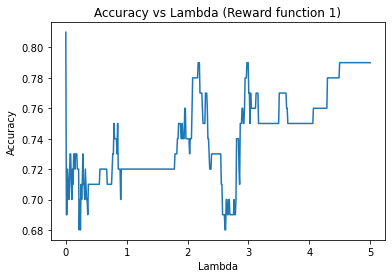

In [60]:
plt.plot(np.linspace(0,5,500),accuracy_arr)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda (Reward function 1)')
plt.show()

In [61]:
lambda_vals = np.linspace(0,5,500)
print ('Value of lambda for best accuracy ', lambda_vals[np.argmax(accuracy_arr)])
print ('Best value of accuracy ', best_score)

Value of lambda for best accuracy  0.0
Best value of accuracy  0.81


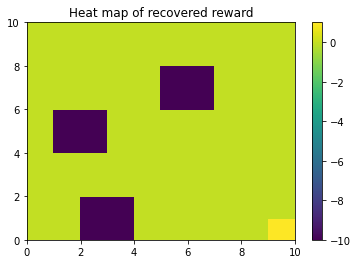

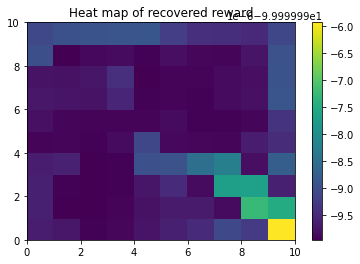

In [62]:
best_rewards_1 = best_rewards.reshape(10,10).T


plt.pcolor(np.flipud(reward1))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()

plt.pcolor(np.flipud(best_rewards_1))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()


In [63]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,eps,best_rewards_1,state_space,up,down,left,right,1)

In [64]:
checkpoints.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

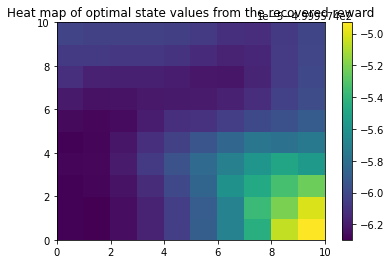

In [65]:
plt.pcolor(np.flipud(checkpoints[42]))
plt.colorbar()
plt.title('Heat map of optimal state values from the recovered reward')
plt.show()

In [66]:
optim_policy, directions, _= adjusted_policy_iteration_checkpoints(gamma,eps,best_rewards_1,state_space,up,down,left,right,1)

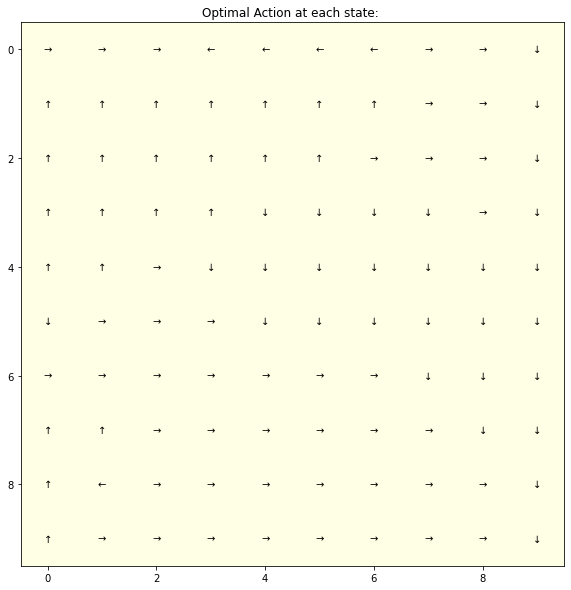

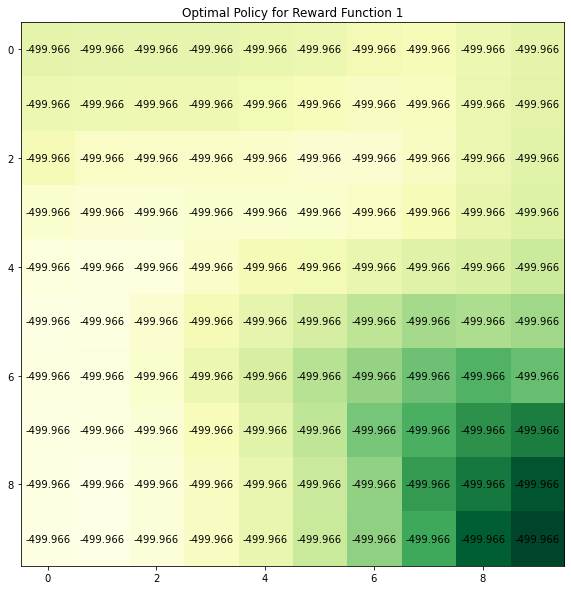

In [67]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 1")
plt.show()

### Question 25 for reward 2

In [68]:
optim_policy, directions, optim_policy_a = adjusted_policy_iteration_checkpoints(gamma,eps,reward2,state_space,up,down,left,right,1)

In [69]:
best_score, best_rewards, accuracy_arr, all_rewards_new = iter_acc(grid_object, optim_policy_a)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5000e+04  3e+04  2e-02  9e+00  1e+00
 1: -3.9757e+01 -2.1023e+04  2e+04  2e-02  8e+00  2e+00
 2: -2.7556e+02 -1.7946e+04  2e+04  2e-02  6e+00  4e+00
 3: -6.4735e+02 -1.8040e+04  2e+04  2e-02  6e+00  7e+00
 4: -2.5374e+03 -1.2756e+04  2e+04  9e-03  4e+00  1e+01
 5: -5.9089e+03 -1.2932e+04  2e+04  6e-03  3e+00  1e+01
 6: -7.3444e+03 -1.1363e+04  1e+04  4e-03  1e+00  7e+00
 7: -7.8704e+03 -1.0935e+04  9e+03  3e-03  1e+00  8e+00
 8: -9.3948e+03 -1.0044e+04  2e+03  6e-04  2e-01  2e+00
 9: -9.9627e+03 -9.9994e+03  1e+02  3e-05  1e-02  1e-01
10: -9.9996e+03 -1.0000e+04  1e+00  3e-07  1e-04  1e-03
11: -1.0000e+04 -1.0000e+04  1e-02  3e-09  1e-06  1e-05
12: -1.0000e+04 -1.0000e+04  1e-04  3e-11  1e-08  1e-07
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5100e+04  3e+04  2e-02  9e+00  1e+00
 1: -4.1110e+01 -2.1144e+04  2e+04  2e-02  8e+00  2e+00
 2: -2.8243e+02 -1.8070e+04 

 9: -1.0178e+04 -1.1569e+04  6e+03  1e-03  5e-01  4e+00
10: -1.2597e+04 -1.4664e+04  3e+04  2e-03  8e-01  2e+01
11: -1.5019e+04 -1.6748e+04  3e+04  2e-03  6e-01  2e+01
12: -3.7539e+04 -3.9047e+04  1e+05  1e-03  6e-01  7e+01
13: -3.2216e+05 -3.2279e+05  7e+05  1e-03  4e-01  6e+02
14: -2.8331e+07 -2.8281e+07  6e+07  1e-03  4e-01  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5902e+04  3e+04  2e-02  9e+00  1e+00
 1: -5.2328e+01 -2.2113e+04  2e+04  2e-02  8e+00  2e+00
 2: -3.3947e+02 -1.9058e+04  2e+04  2e-02  7e+00  5e+00
 3: -8.1661e+02 -1.9246e+04  3e+04  2e-02  7e+00  8e+00
 4: -3.1407e+03 -1.3292e+04  2e+04  9e-03  4e+00  1e+01
 5: -6.4068e+03 -1.4134e+04  2e+04  7e-03  3e+00  1e+01
 6: -9.1537e+03 -1.1335e+04  6e+03  2e-03  8e-01  4e+00
 7: -9.5509e+03 -1.1398e+04  6e+03  2e-03  7e-01  4e+00
 8: -9.6395e+03 -1.2053e+04  1e+04  2e-03  9e-01  9e+00
 9: -1.2987e+04 -1.4725e+04  2e+04  2e-03  6e-01  2e+01
10: -1.46

11: -5.8504e+07 -5.8405e+07  1e+08  2e-03  1e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6904e+04  3e+04  2e-02  1e+01  1e+00
 1: -6.7325e+01 -2.3311e+04  3e+04  2e-02  8e+00  2e+00
 2: -4.1599e+02 -2.0299e+04  2e+04  2e-02  7e+00  5e+00
 3: -1.0470e+03 -2.0620e+04  3e+04  2e-02  7e+00  9e+00
 4: -3.7144e+03 -1.4365e+04  2e+04  9e-03  4e+00  1e+01
 5: -6.9123e+03 -1.5285e+04  2e+04  7e-03  3e+00  1e+01
 6: -9.8401e+03 -1.3000e+04  9e+03  3e-03  1e+00  6e+00
 7: -1.0857e+04 -1.7137e+04  4e+04  5e-03  2e+00  2e+01
 8: -1.7253e+04 -2.2194e+04  6e+04  4e-03  2e+00  4e+01
 9: -4.9292e+04 -5.3128e+04  1e+05  3e-03  1e+00  9e+01
10: -6.8233e+05 -6.8421e+05  1e+06  3e-03  1e+00  1e+03
11: -6.6316e+07 -6.6204e+07  1e+08  3e-03  1e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7004e+04  3e+04  2e-02  1e+01  1e+00
 1: -6.8885e+01 -2.3430e+0

 7: -1.4178e+04 -2.2161e+04  6e+04  6e-03  3e+00  3e+01
 8: -2.3125e+04 -3.0671e+04  8e+04  6e-03  3e+00  5e+01
 9: -8.0152e+04 -8.6185e+04  2e+05  5e-03  2e+00  1e+02
10: -1.2844e+06 -1.2870e+06  3e+06  4e-03  2e+00  2e+03
11: -1.2751e+08 -1.2730e+08  3e+08  4e-03  2e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8006e+04  3e+04  2e-02  1e+01  1e+00
 1: -8.5085e+01 -2.4616e+04  3e+04  2e-02  9e+00  2e+00
 2: -5.0688e+02 -2.1672e+04  3e+04  2e-02  7e+00  5e+00
 3: -1.3762e+03 -2.2192e+04  3e+04  2e-02  7e+00  1e+01
 4: -4.4623e+03 -1.5585e+04  2e+04  9e-03  4e+00  1e+01
 5: -7.6895e+03 -1.6465e+04  2e+04  7e-03  3e+00  1e+01
 6: -1.0258e+04 -1.5476e+04  2e+04  4e-03  2e+00  9e+00
 7: -1.4560e+04 -2.2669e+04  6e+04  6e-03  3e+00  3e+01
 8: -2.3777e+04 -3.1539e+04  9e+04  6e-03  3e+00  5e+01
 9: -8.4341e+04 -9.0576e+04  2e+05  5e-03  2e+00  2e+02
10: -1.4476e+06 -1.4500e+06  3e+06  4e-03  2e+00  2e+03
11: -1.43

 3: -1.7846e+03 -2.3712e+04  3e+04  2e-02  7e+00  1e+01
 4: -5.3435e+03 -1.6679e+04  2e+04  9e-03  4e+00  1e+01
 5: -8.3246e+03 -1.7422e+04  2e+04  7e-03  3e+00  1e+01
 6: -1.1344e+04 -1.8169e+04  2e+04  5e-03  2e+00  1e+01
 7: -1.9260e+04 -2.8228e+04  7e+04  7e-03  3e+00  3e+01
 8: -3.3757e+04 -4.3180e+04  1e+05  7e-03  3e+00  7e+01
 9: -1.7787e+05 -1.8573e+05  5e+05  6e-03  3e+00  3e+02
10: -9.4077e+06 -9.4007e+06  2e+07  6e-03  2e+00  1e+04
11: -9.4118e+08 -9.3978e+08  2e+09  6e-03  2e+00  1e+06
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.9108e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.0418e+02 -2.5910e+04  3e+04  2e-02  9e+00  2e+00
 2: -6.0482e+02 -2.3052e+04  3e+04  2e-02  8e+00  5e+00
 3: -1.8336e+03 -2.3871e+04  3e+04  2e-02  7e+00  1e+01
 4: -5.4472e+03 -1.6785e+04  2e+04  9e-03  4e+00  1e+01
 5: -8.4024e+03 -1.7519e+04  2e+04  7e-03  3e+00  1e+01
 6: -1.1541e+04 -1.8536e+04  2e+04  5e-03  2e+00  1e+01
 7: -1.99

 9: -1.7144e+06 -1.7220e+06  4e+06  7e-03  3e+00  2e+03
10: -1.7035e+08 -1.7012e+08  4e+08  7e-03  3e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0210e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.2464e+02 -2.7194e+04  3e+04  2e-02  9e+00  2e+00
 2: -7.0986e+02 -2.4440e+04  3e+04  2e-02  8e+00  6e+00
 3: -2.4876e+03 -2.5718e+04  4e+04  2e-02  7e+00  1e+01
 4: -6.8302e+03 -1.7894e+04  2e+04  8e-03  4e+00  1e+01
 5: -9.2174e+03 -1.8648e+04  2e+04  7e-03  3e+00  1e+01
 6: -1.6209e+04 -2.6055e+04  5e+04  7e-03  3e+00  3e+01
 7: -3.3121e+04 -4.2925e+04  9e+04  7e-03  3e+00  4e+01
 8: -1.0289e+05 -1.1358e+05  3e+05  8e-03  3e+00  2e+02
 9: -2.6847e+06 -2.6913e+06  7e+06  8e-03  3e+00  4e+03
10: -2.6802e+08 -2.6767e+08  7e+08  8e-03  3e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0311e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.2657e+02 -2.7310e+0

 6: -2.3175e+04 -3.5754e+04  8e+04  9e-03  4e+00  4e+01
 7: -4.2092e+04 -5.6316e+04  1e+05  1e-02  4e+00  8e+01
 8: -2.2788e+05 -2.3998e+05  6e+05  9e-03  4e+00  3e+02
 9: -1.1561e+07 -1.1557e+07  3e+07  8e-03  3e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1413e+04  3e+04  2e-02  1e+01  1e+00
 1: -1.4853e+02 -2.8586e+04  3e+04  2e-02  9e+00  2e+00
 2: -8.3264e+02 -2.5965e+04  3e+04  2e-02  8e+00  6e+00
 3: -2.8926e+03 -2.7538e+04  4e+04  2e-02  8e+00  1e+01
 4: -7.8546e+03 -1.9256e+04  2e+04  8e-03  3e+00  1e+01
 5: -1.0227e+04 -2.1216e+04  3e+04  8e-03  3e+00  2e+01
 6: -2.3631e+04 -3.6305e+04  8e+04  9e-03  4e+00  4e+01
 7: -4.3263e+04 -5.7642e+04  1e+05  1e-02  4e+00  8e+01
 8: -2.4150e+05 -2.5373e+05  6e+05  9e-03  4e+00  3e+02
 9: -1.3081e+07 -1.3075e+07  3e+07  8e-03  3e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1513e+0

 3: -3.3171e+03 -2.9383e+04  4e+04  2e-02  8e+00  1e+01
 4: -8.9577e+03 -2.0736e+04  3e+04  8e-03  3e+00  1e+01
 5: -1.3749e+04 -2.8531e+04  5e+04  1e-02  4e+00  3e+01
 6: -3.1689e+04 -4.5754e+04  1e+05  1e-02  4e+00  4e+01
 7: -8.0281e+04 -9.7398e+04  3e+05  1e-02  5e+00  1e+02
 8: -9.2537e+05 -9.3888e+05  2e+06  1e-02  4e+00  1e+03
 9: -8.9288e+07 -8.9183e+07  2e+08  1e-02  4e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.2715e+04  3e+04  2e-02  9e+00  1e+00
 1: -1.7630e+02 -3.0087e+04  3e+04  2e-02  9e+00  3e+00
 2: -9.7544e+02 -2.7631e+04  3e+04  2e-02  8e+00  6e+00
 3: -3.3533e+03 -2.9538e+04  4e+04  2e-02  8e+00  1e+01
 4: -9.0533e+03 -2.0866e+04  3e+04  8e-03  3e+00  1e+01
 5: -1.4642e+04 -3.0373e+04  6e+04  1e-02  5e+00  3e+01
 6: -3.1519e+04 -4.6514e+04  1e+05  1e-02  4e+00  5e+01
 7: -8.9077e+04 -1.0736e+05  3e+05  1e-02  5e+00  2e+02
 8: -1.0539e+06 -1.0677e+06  3e+06  1e-02  4e+00  2e+03
 9: -1.02

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.3918e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.0373e+02 -3.1466e+04  3e+04  2e-02  8e+00  3e+00
 2: -1.1164e+03 -2.9181e+04  3e+04  2e-02  8e+00  7e+00
 3: -3.7975e+03 -3.1412e+04  4e+04  2e-02  7e+00  2e+01
 4: -9.9590e+03 -2.2918e+04  3e+04  9e-03  4e+00  1e+01
 5: -1.9210e+04 -4.1199e+04  1e+05  1e-02  6e+00  4e+01
 6: -4.2972e+04 -6.7543e+04  2e+05  2e-02  7e+00  1e+02
 7: -1.4904e+05 -1.6731e+05  4e+05  1e-02  5e+00  2e+02
 8: -3.9039e+06 -3.9142e+06  9e+06  1e-02  4e+00  5e+03
 9: -3.9054e+08 -3.9002e+08  9e+08  1e-02  4e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.4018e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.0609e+02 -3.1581e+04  3e+04  2e-02  8e+00  3e+00
 2: -1.1286e+03 -2.9311e+04  3e+04  2e-02  8e+00  7e+00
 3: -3.8353e+03 -3.1570e+04  4e+04  2e-02  7e+00  2e+01
 4: -1.0030e+04 -2.3123e+04  3e+04  9e-03  4e+00  1e+01
 5: -1.9445

 5: -2.2246e+04 -4.7057e+04  1e+05  2e-02  6e+00  5e+01
 6: -4.8210e+04 -7.5958e+04  2e+05  2e-02  7e+00  1e+02
 7: -1.7246e+05 -1.9310e+05  5e+05  1e-02  5e+00  3e+02
 8: -5.0400e+06 -5.0511e+06  1e+07  1e-02  5e+00  7e+03
 9: -5.0449e+08 -5.0383e+08  1e+09  1e-02  5e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5220e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.3542e+02 -3.2955e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.2793e+03 -3.0875e+04  4e+04  2e-02  8e+00  7e+00
 3: -4.2990e+03 -3.3475e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.0935e+04 -2.5665e+04  3e+04  9e-03  4e+00  1e+01
 5: -2.2518e+04 -4.7557e+04  1e+05  2e-02  6e+00  5e+01
 6: -4.8728e+04 -7.6737e+04  2e+05  2e-02  7e+00  1e+02
 7: -1.7489e+05 -1.9573e+05  5e+05  1e-02  5e+00  3e+02
 8: -5.1697e+06 -5.1808e+06  1e+07  1e-02  5e+00  7e+03
 9: -5.1749e+08 -5.1682e+08  1e+09  1e-02  5e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -1.4393e+03 -3.2453e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.7815e+03 -3.5411e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.1897e+04 -2.8308e+04  4e+04  1e-02  4e+00  2e+01
 5: -2.5549e+04 -5.3514e+04  1e+05  2e-02  7e+00  5e+01
 6: -5.4728e+04 -8.5974e+04  3e+05  2e-02  7e+00  1e+02
 7: -2.0187e+05 -2.2501e+05  6e+05  1e-02  6e+00  3e+02
 8: -6.6343e+06 -6.6460e+06  2e+07  1e-02  5e+00  9e+03
 9: -6.6427e+08 -6.6342e+08  2e+09  1e-02  5e+00  9e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.6523e+04  4e+04  2e-02  9e+00  1e+00
 1: -2.6923e+02 -3.4441e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.4530e+03 -3.2585e+04  4e+04  2e-02  7e+00  7e+00
 3: -4.8225e+03 -3.5574e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.1979e+04 -2.8533e+04  4e+04  1e-02  4e+00  2e+01
 5: -2.5808e+04 -5.4020e+04  1e+05  2e-02  7e+00  5e+01
 6: -5.5242e+04 -8.6758e+04  3e+05  2e-02  8e+00  1e+02
 7: -2.0418e+05 -2.2751e+05  6e+05  1e-02  6e+00  3e+02
 8: -6.76

 9: -8.6676e+08 -8.6567e+08  2e+09  1e-02  5e+00  1e+06
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7725e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.0236e+02 -3.5810e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.6231e+03 -3.4179e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.3270e+03 -3.7547e+04  5e+04  2e-02  7e+00  2e+01
 4: -1.2905e+04 -3.1419e+04  4e+04  1e-02  4e+00  2e+01
 5: -2.9669e+04 -6.0773e+04  1e+05  2e-02  7e+00  5e+01
 6: -6.2471e+04 -9.7119e+04  3e+05  2e-02  8e+00  1e+02
 7: -2.3905e+05 -2.6464e+05  7e+05  2e-02  6e+00  4e+02
 8: -8.8469e+06 -8.8585e+06  2e+07  1e-02  5e+00  1e+04
 9: -8.8587e+08 -8.8475e+08  2e+09  1e-02  5e+00  1e+06
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.7826e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.0521e+02 -3.5924e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.6377e+03 -3.4312e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.3701e+03 -3.7713e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9028e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.4040e+02 -3.7293e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.8182e+03 -3.5922e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.8994e+03 -3.9728e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.4076e+04 -3.4598e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.4545e+04 -6.8413e+04  2e+05  2e-02  7e+00  6e+01
 6: -7.1849e+04 -1.0962e+05  3e+05  2e-02  8e+00  2e+02
 7: -2.9091e+05 -3.1885e+05  8e+05  2e-02  6e+00  4e+02
 8: -1.1835e+07 -1.1846e+07  3e+07  1e-02  5e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.9128e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.4342e+02 -3.7407e+04  4e+04  2e-02  8e+00  3e+00
 2: -1.8337e+03 -3.6057e+04  4e+04  2e-02  7e+00  8e+00
 3: -5.9446e+03 -3.9898e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.4176e+04 -3.4844e+04  5e+04  1e-02  4e+00  2e+01
 5: -3.4947e+04 -6.9013e+04  2e+05  2e-02  7e+00  6e+01
 6: -7.2637

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0431e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.8394e+02 -3.8889e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.0413e+03 -3.7820e+04  5e+04  2e-02  7e+00  8e+00
 3: -6.5498e+03 -4.2134e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.5605e+04 -3.8111e+04  5e+04  1e-02  4e+00  2e+01
 5: -4.0585e+04 -7.7052e+04  2e+05  2e-02  7e+00  6e+01
 6: -8.3967e+04 -1.2475e+05  4e+05  2e-02  8e+00  2e+02
 7: -3.6940e+05 -3.9973e+05  1e+06  2e-02  6e+00  5e+02
 8: -1.6827e+07 -1.6835e+07  4e+07  2e-02  6e+00  2e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0531e+04  4e+04  2e-02  8e+00  1e+00
 1: -3.8715e+02 -3.9003e+04  4e+04  2e-02  8e+00  3e+00
 2: -2.0577e+03 -3.7956e+04  5e+04  2e-02  7e+00  8e+00
 3: -6.5978e+03 -4.2309e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.5725e+04 -3.8369e+04  5e+04  1e-02  4e+00  2e+01
 5: -4.1055e+04 -7.7693e+04  2e+05  2e-02  7e+00  6e+01
 6: -8.4934

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1834e+04  4e+04  2e-02  8e+00  1e+00
 1: -4.3023e+02 -4.0485e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.2781e+03 -3.9740e+04  5e+04  2e-02  7e+00  9e+00
 3: -7.2407e+03 -4.4606e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.7389e+04 -4.1830e+04  6e+04  1e-02  5e+00  2e+01
 5: -4.7726e+04 -8.6444e+04  2e+05  2e-02  7e+00  7e+01
 6: -9.9090e+04 -1.4252e+05  4e+05  2e-02  8e+00  2e+02
 7: -4.8803e+05 -5.2056e+05  1e+06  2e-02  6e+00  7e+02
 8: -2.5750e+07 -2.5750e+07  6e+07  2e-02  6e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1934e+04  4e+04  2e-02  8e+00  1e+00
 1: -4.3364e+02 -4.0599e+04  4e+04  2e-02  7e+00  3e+00
 2: -2.2955e+03 -3.9878e+04  5e+04  2e-02  7e+00  9e+00
 3: -7.2917e+03 -4.4786e+04  6e+04  2e-02  7e+00  2e+01
 4: -1.7522e+04 -4.2107e+04  6e+04  1e-02  5e+00  2e+01
 5: -4.8286e+04 -8.7154e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.0031

 8: -4.0999e+07 -4.0985e+07  1e+08  2e-02  6e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3236e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.7936e+02 -4.2083e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.5290e+03 -4.1683e+04  5e+04  2e-02  7e+00  9e+00
 3: -7.9776e+03 -4.7153e+04  7e+04  2e-02  7e+00  2e+01
 4: -1.9406e+04 -4.5838e+04  6e+04  1e-02  5e+00  2e+01
 5: -5.6186e+04 -9.6848e+04  2e+05  2e-02  7e+00  7e+01
 6: -1.1844e+05 -1.6421e+05  5e+05  2e-02  8e+00  2e+02
 7: -6.7853e+05 -7.1302e+05  2e+06  2e-02  6e+00  9e+02
 8: -4.2691e+07 -4.2675e+07  1e+08  2e-02  6e+00  5e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3337e+04  5e+04  2e-02  8e+00  1e+00
 1: -4.8298e+02 -4.2197e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.5475e+03 -4.1822e+04  5e+04  2e-02  7e+00  9e+00
 3: -8.0321e+03 -4.7338e+04  7e+04  2e-02  7e+00  2e+01
 4: -1.9614e+04 -4.6170e+0

 6: -1.4848e+05 -1.9573e+05  6e+05  2e-02  8e+00  3e+02
 7: -1.0993e+06 -1.1350e+06  3e+06  2e-02  6e+00  1e+03
 8: -8.7252e+07 -8.7186e+07  2e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4639e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.3143e+02 -4.3683e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.7945e+03 -4.3649e+04  5e+04  2e-02  7e+00  9e+00
 3: -8.7666e+03 -4.9782e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.2519e+04 -5.0838e+04  7e+04  1e-02  5e+00  3e+01
 5: -6.7711e+04 -1.0954e+05  2e+05  2e-02  7e+00  8e+01
 6: -1.5131e+05 -1.9867e+05  6e+05  2e-02  8e+00  3e+02
 7: -1.1468e+06 -1.1826e+06  3e+06  2e-02  6e+00  1e+03
 8: -9.2498e+07 -9.2425e+07  2e+08  2e-02  6e+00  1e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4739e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.3527e+02 -4.3797e+04  5e+04  2e-02  7e+00  3e+00
 2: -2.8140e+03 -4.3791e+0

 3: -9.5514e+03 -5.2305e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.5850e+04 -5.6136e+04  8e+04  1e-02  5e+00  3e+01
 5: -8.0784e+04 -1.2340e+05  3e+05  2e-02  7e+00  9e+01
 6: -2.0036e+05 -2.4917e+05  7e+05  2e-02  8e+00  3e+02
 7: -2.2251e+06 -2.2615e+06  5e+06  2e-02  6e+00  3e+03
 8: -2.1209e+08 -2.1188e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6042e+04  5e+04  2e-02  7e+00  1e+00
 1: -5.8655e+02 -4.5286e+04  5e+04  2e-02  7e+00  3e+00
 2: -3.0749e+03 -4.5640e+04  5e+04  2e-02  7e+00  1e+01
 3: -9.6140e+03 -5.2503e+04  7e+04  2e-02  7e+00  2e+01
 4: -2.6134e+04 -5.6574e+04  8e+04  1e-02  5e+00  3e+01
 5: -8.1904e+04 -1.2457e+05  3e+05  2e-02  7e+00  9e+01
 6: -2.0544e+05 -2.5437e+05  7e+05  2e-02  8e+00  3e+02
 7: -2.3663e+06 -2.4026e+06  6e+06  2e-02  6e+00  3e+03
 8: -2.2741e+08 -2.2718e+08  5e+08  2e-02  6e+00  3e+05
Certificate of dual infeasibility found.
     pcost       dcost  

 2: -3.3489e+03 -4.7512e+04  6e+04  2e-02  7e+00  1e+01
 3: -1.0459e+04 -5.5120e+04  8e+04  2e-02  7e+00  2e+01
 4: -3.0267e+04 -6.2735e+04  9e+04  2e-02  5e+00  3e+01
 5: -9.8254e+04 -1.4139e+05  3e+05  2e-02  6e+00  1e+02
 6: -2.8893e+05 -3.3913e+05  9e+05  2e-02  8e+00  4e+02
 7: -5.4922e+06 -5.5278e+06  1e+07  2e-02  6e+00  6e+03
 8: -5.4846e+08 -5.4787e+08  1e+09  2e-02  6e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7445e+04  5e+04  2e-02  7e+00  1e+00
 1: -6.4481e+02 -4.6893e+04  5e+04  2e-02  7e+00  4e+00
 2: -3.3705e+03 -4.7656e+04  6e+04  2e-02  7e+00  1e+01
 3: -1.0527e+04 -5.5325e+04  8e+04  2e-02  7e+00  2e+01
 4: -3.0622e+04 -6.3249e+04  9e+04  2e-02  5e+00  3e+01
 5: -9.9663e+04 -1.4283e+05  3e+05  2e-02  6e+00  1e+02
 6: -2.9566e+05 -3.4589e+05  1e+06  2e-02  7e+00  4e+02
 7: -5.8050e+06 -5.8406e+06  1e+07  2e-02  6e+00  7e+03
 8: -5.7992e+08 -5.7930e+08  1e+09  2e-02  6e+00  7e+05
Certifica

 2: -3.6591e+03 -4.9549e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.1439e+04 -5.8049e+04  8e+04  2e-02  7e+00  2e+01
 4: -3.5834e+04 -7.0562e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.2041e+05 -1.6384e+05  3e+05  2e-02  6e+00  1e+02
 6: -4.1249e+05 -4.6300e+05  1e+06  2e-02  7e+00  5e+02
 7: -1.2241e+07 -1.2274e+07  3e+07  2e-02  6e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8848e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.0578e+02 -4.8504e+04  5e+04  2e-02  7e+00  4e+00
 2: -3.6819e+03 -4.9696e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.1512e+04 -5.8263e+04  8e+04  2e-02  7e+00  2e+01
 4: -3.6286e+04 -7.1178e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.2221e+05 -1.6566e+05  3e+05  2e-02  6e+00  1e+02
 6: -4.2440e+05 -4.7493e+05  1e+06  2e-02  7e+00  6e+02
 7: -1.3013e+07 -1.3045e+07  3e+07  2e-02  7e+00  1e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8948e+0

 3: -1.2578e+04 -6.1325e+04  9e+04  2e-02  7e+00  2e+01
 4: -4.3564e+04 -8.0812e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.5159e+05 -1.9530e+05  4e+05  2e-02  6e+00  1e+02
 6: -6.4203e+05 -6.9240e+05  2e+06  2e-02  7e+00  7e+02
 7: -2.7339e+07 -2.7361e+07  7e+07  2e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0351e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.7464e+02 -5.0236e+04  5e+04  2e-02  7e+00  4e+00
 2: -4.0334e+03 -5.1910e+04  6e+04  2e-02  6e+00  1e+01
 3: -1.2658e+04 -6.1549e+04  9e+04  2e-02  7e+00  2e+01
 4: -4.4162e+04 -8.1582e+04  1e+05  2e-02  5e+00  4e+01
 5: -1.5404e+05 -1.9777e+05  4e+05  2e-02  6e+00  1e+02
 6: -6.6279e+05 -7.1312e+05  2e+06  2e-02  7e+00  7e+02
 7: -2.8928e+07 -2.8949e+07  7e+07  2e-02  7e+00  3e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0451e+04  5e+04  2e-02  7e+00  1e+00
 1: -7.7937e+02 -5.0351e+0

 4: -5.3915e+04 -9.3806e+04  2e+05  2e-02  5e+00  5e+01
 5: -1.9585e+05 -2.4003e+05  5e+05  2e-02  6e+00  2e+02
 6: -1.0918e+06 -1.1415e+06  3e+06  2e-02  6e+00  1e+03
 7: -6.7529e+07 -6.7521e+07  2e+08  2e-02  6e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.1854e+04  5e+04  2e-02  7e+00  1e+00
 1: -8.4758e+02 -5.1973e+04  6e+04  2e-02  6e+00  4e+00
 2: -4.4039e+03 -5.4156e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.3905e+04 -6.4991e+04  9e+04  2e-02  6e+00  3e+01
 4: -5.4727e+04 -9.4798e+04  2e+05  2e-02  5e+00  5e+01
 5: -1.9955e+05 -2.4377e+05  5e+05  2e-02  6e+00  2e+02
 6: -1.1249e+06 -1.1745e+06  3e+06  2e-02  6e+00  1e+03
 7: -7.0906e+07 -7.0895e+07  2e+08  2e-02  6e+00  6e+04
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.1954e+04  5e+04  2e-02  7e+00  1e+00
 1: -8.5259e+02 -5.2089e+04  6e+04  2e-02  6e+00  4e+00
 2: -4.4292e+03 -5.4307e+0

 6: -2.5521e+06 -2.6011e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.2261e+08 -2.2250e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3357e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.2483e+02 -5.3717e+04  6e+04  2e-02  6e+00  4e+00
 2: -4.7938e+03 -5.6436e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.5265e+04 -6.8604e+04  1e+05  2e-02  6e+00  3e+01
 4: -6.9458e+04 -1.1235e+05  2e+05  2e-02  5e+00  6e+01
 5: -2.7823e+05 -3.2354e+05  6e+05  2e-02  5e+00  2e+02
 6: -2.8051e+06 -2.8542e+06  6e+06  2e-02  6e+00  2e+03
 7: -2.5007e+08 -2.4994e+08  5e+08  2e-02  6e+00  2e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3457e+04  6e+04  2e-02  6e+00  1e+00
 1: -9.3014e+02 -5.3834e+04  6e+04  2e-02  6e+00  4e+00
 2: -4.8205e+03 -5.6589e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.5360e+04 -6.8851e+04  1e+05  2e-02  6e+00  3e+01
 4: -7.0645e+04 -1.1374e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.4860e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0066e+03 -5.5469e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.2036e+03 -5.8749e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.6749e+04 -7.2406e+04  1e+05  2e-02  6e+00  3e+01
 4: -9.0938e+04 -1.3689e+05  2e+05  2e-02  5e+00  8e+01
 5: -3.4015e+05 -3.8948e+05  8e+05  2e-02  6e+00  3e+02
 6: -6.1992e+06 -6.2479e+06  1e+07  2e-02  6e+00  4e+03
 7: -6.1119e+08 -6.1082e+08  1e+09  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.4960e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0122e+03 -5.5586e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.2316e+03 -5.8904e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.6853e+04 -7.2666e+04  1e+05  2e-02  6e+00  3e+01
 4: -9.2705e+04 -1.3888e+05  2e+05  2e-02  5e+00  8e+01
 5: -3.4414e+05 -3.9384e+05  8e+05  2e-02  6e+00  3e+02
 6: -6.3166e+06 -6.3653e+06  1e+07  2e-02  6e+00  5e+03
 7: -6.2318

 2: -5.6338e+03 -6.1096e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.8373e+04 -7.6416e+04  1e+05  2e-02  6e+00  3e+01
 4: -1.2368e+05 -1.7300e+05  3e+05  2e-02  5e+00  1e+02
 5: -3.6083e+05 -4.1985e+05  1e+06  2e-02  7e+00  4e+02
 6: -6.2788e+06 -6.3297e+06  1e+07  2e-02  6e+00  6e+03
 7: -6.2287e+08 -6.2235e+08  1e+09  2e-02  6e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6463e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.0991e+03 -5.7346e+04  6e+04  2e-02  6e+00  4e+00
 2: -5.6632e+03 -6.1254e+04  7e+04  2e-02  6e+00  1e+01
 3: -1.8486e+04 -7.6691e+04  1e+05  2e-02  6e+00  3e+01
 4: -1.2645e+05 -1.7600e+05  3e+05  2e-02  5e+00  1e+02
 5: -3.3181e+05 -3.9182e+05  9e+05  2e-02  7e+00  4e+02
 6: -5.8059e+06 -5.8572e+06  1e+07  2e-02  6e+00  6e+03
 7: -5.7648e+08 -5.7596e+08  1e+09  2e-02  6e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6563e+0

 4: -1.3074e+05 -1.8601e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.2445e+05 -3.9102e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.5969e+06 -4.6528e+06  1e+07  2e-02  6e+00  5e+03
 7: -4.4992e+08 -4.4951e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7966e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1911e+03 -5.9116e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.1156e+03 -6.3638e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.0275e+04 -8.0949e+04  1e+05  2e-02  6e+00  3e+01
 4: -1.3104e+05 -1.8669e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.2493e+05 -3.9190e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.5612e+06 -4.6173e+06  1e+07  2e-02  6e+00  5e+03
 7: -4.4591e+08 -4.4551e+08  1e+09  2e-02  6e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8066e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.1974e+03 -5.9235e+04  6e+04  2e-02  6e+00  4e+00
 2: -6.1465e+03 -6.3798e+0

 5: -3.2303e+05 -3.9455e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.1557e+06 -4.2150e+06  1e+07  2e-02  6e+00  4e+03
 7: -4.0119e+08 -4.0084e+08  9e+08  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9469e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2885e+03 -6.0897e+04  7e+04  2e-02  6e+00  5e+00
 2: -6.5894e+03 -6.6057e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.2237e+04 -8.5464e+04  1e+05  2e-02  6e+00  3e+01
 4: -1.3623e+05 -1.9707e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.2307e+05 -3.9489e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.1407e+06 -4.2001e+06  1e+07  2e-02  6e+00  4e+03
 7: -3.9950e+08 -3.9915e+08  9e+08  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9569e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.2952e+03 -6.1016e+04  7e+04  2e-02  6e+00  5e+00
 2: -6.6217e+03 -6.6220e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.2375e+04 -8.5774e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.0972e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.3916e+03 -6.2688e+04  7e+04  2e-02  6e+00  5e+00
 2: -7.0849e+03 -6.8511e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.4394e+04 -9.0266e+04  1e+05  2e-02  6e+00  4e+01
 4: -1.4267e+05 -2.0793e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.2896e+05 -4.0498e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.0952e+06 -4.1574e+06  1e+07  2e-02  6e+00  4e+03
 7: -3.9343e+08 -3.9310e+08  9e+08  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1072e+04  6e+04  2e-02  6e+00  1e+00
 1: -1.3987e+03 -6.2808e+04  7e+04  2e-02  6e+00  5e+00
 2: -7.1187e+03 -6.8676e+04  8e+04  2e-02  6e+00  1e+01
 3: -2.4545e+04 -9.0597e+04  1e+05  2e-02  6e+00  4e+01
 4: -1.4314e+05 -2.0868e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.2965e+05 -4.0593e+05  1e+06  3e-02  7e+00  4e+02
 6: -4.1020e+06 -4.1644e+06  1e+07  2e-02  6e+00  4e+03
 7: -3.9411

 2: -7.6026e+03 -7.1001e+04  9e+04  2e-02  6e+00  1e+01
 3: -2.6770e+04 -9.5390e+04  1e+05  2e-02  6e+00  4e+01
 4: -1.5027e+05 -2.1936e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.4233e+05 -4.2212e+05  1e+06  3e-02  8e+00  5e+02
 6: -4.3007e+06 -4.3653e+06  1e+07  2e-02  6e+00  4e+03
 7: -4.1491e+08 -4.1456e+08  1e+09  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2575e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.5082e+03 -6.4612e+04  7e+04  2e-02  6e+00  5e+00
 2: -7.6380e+03 -7.1168e+04  9e+04  2e-02  6e+00  1e+01
 3: -2.6937e+04 -9.5744e+04  1e+05  2e-02  6e+00  4e+01
 4: -1.5081e+05 -2.2014e+05  4e+05  2e-02  6e+00  1e+02
 5: -3.4343e+05 -4.2346e+05  1e+06  3e-02  8e+00  5e+02
 6: -4.3213e+06 -4.3861e+06  1e+07  2e-02  6e+00  5e+03
 7: -4.1711e+08 -4.1676e+08  1e+09  2e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2675e+0

 3: -2.9400e+04 -1.0089e+05  2e+05  2e-02  6e+00  4e+01
 4: -1.5892e+05 -2.3138e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.6124e+05 -4.4446e+05  1e+06  3e-02  8e+00  5e+02
 6: -4.6062e+06 -4.6733e+06  1e+07  3e-02  6e+00  5e+03
 7: -4.4619e+08 -4.4581e+08  1e+09  3e-02  6e+00  4e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4078e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6231e+03 -6.6428e+04  7e+04  2e-02  6e+00  5e+00
 2: -8.1800e+03 -7.3695e+04  9e+04  2e-02  6e+00  1e+01
 3: -2.9586e+04 -1.0127e+05  2e+05  3e-02  6e+00  4e+01
 4: -1.5953e+05 -2.3221e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.6270e+05 -4.4613e+05  1e+06  3e-02  8e+00  5e+02
 6: -4.6299e+06 -4.6972e+06  1e+07  3e-02  6e+00  5e+03
 7: -4.4860e+08 -4.4822e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4178e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.6309e+03 -6.6549e+0

 4: -1.6864e+05 -2.4407e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.8549e+05 -4.7181e+05  1e+06  3e-02  8e+00  5e+02
 6: -5.0493e+06 -5.1189e+06  1e+07  3e-02  7e+00  5e+03
 7: -4.9153e+08 -4.9112e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.5581e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7429e+03 -6.8255e+04  7e+04  2e-02  6e+00  5e+00
 2: -8.7453e+03 -7.6255e+04  9e+04  2e-02  6e+00  2e+01
 3: -3.2530e+04 -1.0723e+05  2e+05  3e-02  6e+00  4e+01
 4: -1.6933e+05 -2.4495e+05  5e+05  3e-02  7e+00  1e+02
 5: -3.8729e+05 -4.7381e+05  1e+06  3e-02  8e+00  5e+02
 6: -5.0857e+06 -5.1555e+06  1e+07  3e-02  7e+00  5e+03
 7: -4.9523e+08 -4.9481e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.5681e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.7511e+03 -6.8377e+04  7e+04  2e-02  6e+00  5e+00
 2: -8.7838e+03 -7.6427e+0

 5: -4.0916e+05 -4.9804e+05  1e+06  3e-02  8e+00  5e+02
 6: -5.4955e+06 -5.5677e+06  1e+07  3e-02  7e+00  6e+03
 7: -5.3648e+08 -5.3603e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7084e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.8690e+03 -7.0095e+04  8e+04  2e-02  6e+00  5e+00
 2: -9.3343e+03 -7.8852e+04  1e+05  2e-02  6e+00  2e+01
 3: -3.5813e+04 -1.1368e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.8018e+05 -2.5843e+05  5e+05  3e-02  7e+00  1e+02
 5: -4.1055e+05 -4.9958e+05  1e+06  3e-02  8e+00  5e+02
 6: -5.5196e+06 -5.5920e+06  1e+07  3e-02  7e+00  6e+03
 7: -5.3889e+08 -5.3844e+08  1e+09  3e-02  7e+00  5e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7184e+04  7e+04  2e-02  6e+00  1e+00
 1: -1.8777e+03 -7.0218e+04  8e+04  2e-02  6e+00  5e+00
 2: -9.3744e+03 -7.9027e+04  1e+05  2e-02  6e+00  2e+01
 3: -3.6045e+04 -1.1413e+0

Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8587e+04  7e+04  2e-02  6e+00  1e+00
 1: -2.0017e+03 -7.1950e+04  8e+04  2e-02  6e+00  5e+00
 2: -9.9474e+03 -8.1485e+04  1e+05  2e-02  6e+00  2e+01
 3: -3.9490e+04 -1.2071e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.9208e+05 -2.7273e+05  6e+05  3e-02  7e+00  1e+02
 5: -4.3308e+05 -5.2422e+05  1e+06  3e-02  7e+00  5e+02
 6: -5.9450e+06 -6.0201e+06  1e+07  3e-02  7e+00  6e+03
 7: -5.8157e+08 -5.8110e+08  1e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8687e+04  7e+04  2e-02  6e+00  1e+00
 1: -2.0108e+03 -7.2074e+04  8e+04  2e-02  6e+00  5e+00
 2: -9.9892e+03 -8.1662e+04  1e+05  2e-02  6e+00  2e+01
 3: -3.9751e+04 -1.2120e+05  2e+05  3e-02  7e+00  5e+01
 4: -1.9291e+05 -2.7372e+05  6e+05  3e-02  7e+00  1e+02
 5: -4.3469e+05 -5.2596e+05  1e+06  3e-02  7e+00  5e+02
 6: -5.9776e+06 -6.0528e+0

 2: -1.0585e+04 -8.4154e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.3632e+04 -1.2840e+05  2e+05  3e-02  7e+00  5e+01
 4: -2.0496e+05 -2.8790e+05  6e+05  3e-02  7e+00  2e+02
 5: -4.5859e+05 -5.5171e+05  1e+06  3e-02  7e+00  6e+02
 6: -6.4846e+06 -6.5622e+06  2e+07  3e-02  7e+00  6e+03
 7: -6.3606e+08 -6.3554e+08  1e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0190e+04  7e+04  2e-02  6e+00  1e+00
 1: -2.1510e+03 -7.3944e+04  8e+04  2e-02  6e+00  6e+00
 2: -1.0629e+04 -8.4334e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.3926e+04 -1.2894e+05  2e+05  3e-02  7e+00  5e+01
 4: -2.0585e+05 -2.8894e+05  6e+05  3e-02  7e+00  2e+02
 5: -4.6039e+05 -5.5364e+05  1e+06  3e-02  7e+00  6e+02
 6: -6.5243e+06 -6.6020e+06  2e+07  3e-02  7e+00  6e+03
 7: -6.4007e+08 -6.3955e+08  1e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0291e+0

 3: -4.8327e+04 -1.3688e+05  2e+05  3e-02  7e+00  6e+01
 4: -2.1878e+05 -3.0399e+05  6e+05  3e-02  6e+00  2e+02
 5: -4.8698e+05 -5.8208e+05  1e+06  3e-02  7e+00  6e+02
 6: -7.1374e+06 -7.2173e+06  2e+07  3e-02  7e+00  7e+03
 7: -7.0212e+08 -7.0156e+08  2e+09  3e-02  7e+00  6e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1693e+04  7e+04  2e-02  5e+00  1e+00
 1: -2.2984e+03 -7.5831e+04  8e+04  2e-02  6e+00  6e+00
 2: -1.1293e+04 -8.7042e+04  1e+05  2e-02  6e+00  2e+01
 3: -4.8662e+04 -1.3747e+05  2e+05  3e-02  7e+00  6e+01
 4: -2.1974e+05 -3.0510e+05  6e+05  3e-02  6e+00  2e+02
 5: -4.8899e+05 -5.8422e+05  1e+06  3e-02  7e+00  6e+02
 6: -7.1854e+06 -7.2654e+06  2e+07  3e-02  7e+00  7e+03
 7: -7.0698e+08 -7.0642e+08  2e+09  3e-02  7e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1794e+04  7e+04  2e-02  5e+00  1e+00
 1: -2.3085e+03 -7.5957e+0

 4: -2.3360e+05 -3.2112e+05  6e+05  3e-02  6e+00  2e+02
 5: -5.1848e+05 -6.1558e+05  1e+06  3e-02  7e+00  6e+02
 6: -7.9178e+06 -7.9998e+06  2e+07  3e-02  7e+00  7e+03
 7: -7.8116e+08 -7.8054e+08  2e+09  3e-02  7e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3196e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.4535e+03 -7.7734e+04  9e+04  2e-02  6e+00  6e+00
 2: -1.1983e+04 -8.9786e+04  1e+05  2e-02  6e+00  2e+01
 3: -5.4073e+04 -1.4697e+05  2e+05  3e-02  7e+00  6e+01
 4: -2.3462e+05 -3.2230e+05  6e+05  3e-02  6e+00  2e+02
 5: -5.2069e+05 -6.1793e+05  1e+06  3e-02  7e+00  6e+02
 6: -7.9745e+06 -8.0567e+06  2e+07  3e-02  7e+00  7e+03
 7: -7.8690e+08 -7.8628e+08  2e+09  3e-02  7e+00  7e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3297e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.4641e+03 -7.7862e+04  9e+04  2e-02  6e+00  6e+00
 2: -1.2030e+04 -8.9971e+0

 6: -8.8230e+06 -8.9072e+06  2e+07  3e-02  7e+00  8e+03
 7: -8.7278e+08 -8.7209e+08  2e+09  3e-02  7e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4699e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.6168e+03 -7.9655e+04  9e+04  2e-02  6e+00  6e+00
 2: -1.2699e+04 -9.2568e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.0310e+04 -1.5764e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.5044e+05 -3.4062e+05  7e+05  3e-02  6e+00  2e+02
 5: -5.5540e+05 -6.5481e+05  2e+06  3e-02  7e+00  6e+02
 6: -8.8878e+06 -8.9722e+06  2e+07  3e-02  7e+00  8e+03
 7: -8.7933e+08 -8.7864e+08  2e+09  3e-02  7e+00  8e+05
Certificate of dual infeasibility found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4800e+04  8e+04  2e-02  5e+00  1e+00
 1: -2.6279e+03 -7.9784e+04  9e+04  2e-02  6e+00  6e+00
 2: -1.2748e+04 -9.2754e+04  1e+05  2e-02  6e+00  2e+01
 3: -6.0760e+04 -1.5840e+05  3e+05  3e-02  7e+00  7e+01
 4: -2.5153e+05 -3.4189e+0

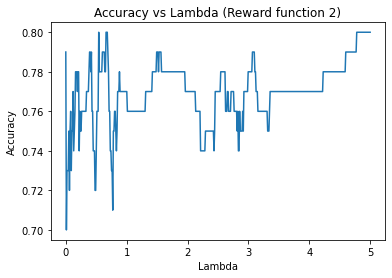

In [70]:
plt.plot(np.linspace(0,5,500),accuracy_arr)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda (Reward function 2)')
plt.show()

In [71]:
value_to_pick = np.linspace(0,5,500)

In [72]:
print ('Value of lambda for best accuracy ', value_to_pick[np.argmax(accuracy_arr)])
print ('Best value of accuracy ', best_score)

Value of lambda for best accuracy  0.5410821643286573
Best value of accuracy  0.8


In [73]:
# print (np.amax(accuracy_arr))
print (np.argwhere(accuracy_arr == np.amax(accuracy_arr)))
best_rewards_2 = all_rewards_new[64]

[[ 54]
 [ 66]
 [ 67]
 [ 68]
 [477]
 [478]
 [479]
 [480]
 [481]
 [482]
 [483]
 [484]
 [485]
 [486]
 [487]
 [488]
 [489]
 [490]
 [491]
 [492]
 [493]
 [494]
 [495]
 [496]
 [497]
 [498]
 [499]]


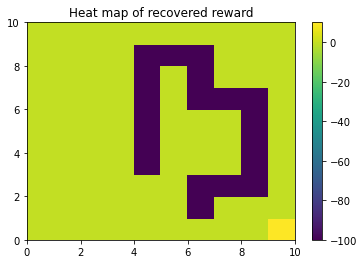

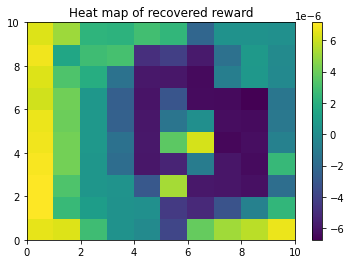

In [74]:

best_rewards_2 = best_rewards_2.reshape(10,10).T

plt.pcolor(np.flipud(reward2))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()

plt.pcolor(np.flipud(best_rewards_2))
plt.colorbar()
plt.title('Heat map of recovered reward')
plt.show()


In [75]:
n_iter,checkpoints = value_iteration_checkpoints(gamma,1e-10,best_rewards_2,state_space,up,down,left,right,1)

In [76]:
checkpoints.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

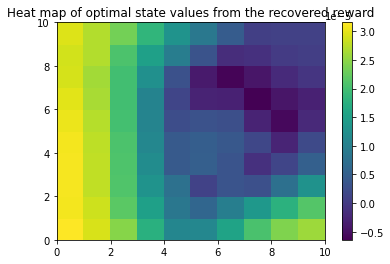

In [77]:

plt.pcolor(np.flipud(checkpoints[50]))
plt.colorbar()
plt.title('Heat map of optimal state values from the recovered reward')
plt.show()

In [78]:
optim_policy, directions, _= adjusted_policy_iteration_checkpoints(gamma,eps,best_rewards_2,state_space,up,down,left,right,1)

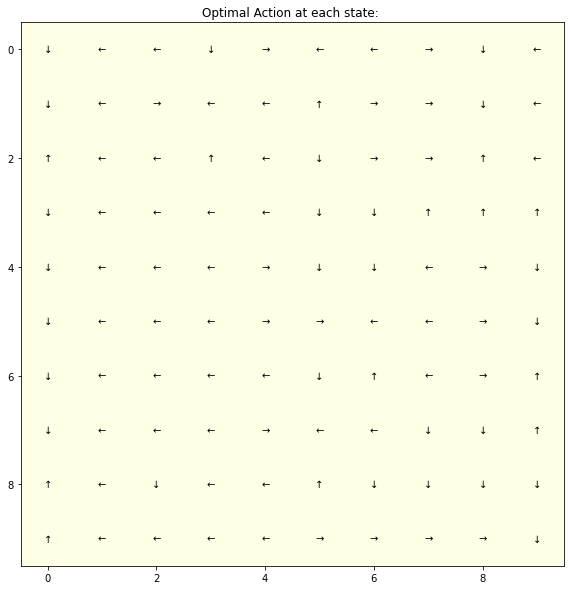

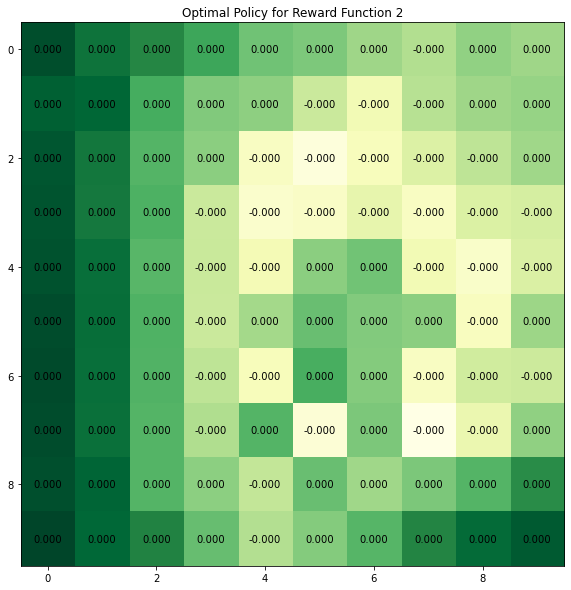

In [79]:
values = np.zeros((10,10))
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(values,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    axs.text(j,k,directions[k,j],va='center',ha='center')
    plt.title("Optimal Action at each state: ")
plt.show()

value_function = optim_policy
fig,axs = plt.subplots(figsize=(10,10))
plt.imshow(value_function,cmap='YlGn')
for j in range(0,10):
  for k in range(0,10):
    string = '{:.3f}'.format(value_function[k,j])
    axs.text(j,k,str(string),va='center',ha='center')
    plt.title("Optimal Policy for Reward Function 2")
plt.show()